In [1]:
import json

with open('experiment_results.json') as file:
  experimentResults = json.load(file)

In [2]:
with open('baseline.json') as file:
  baseline = json.load(file)

In [17]:
with open('mcp-erx.json') as file:
  mcperx = json.load(file)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


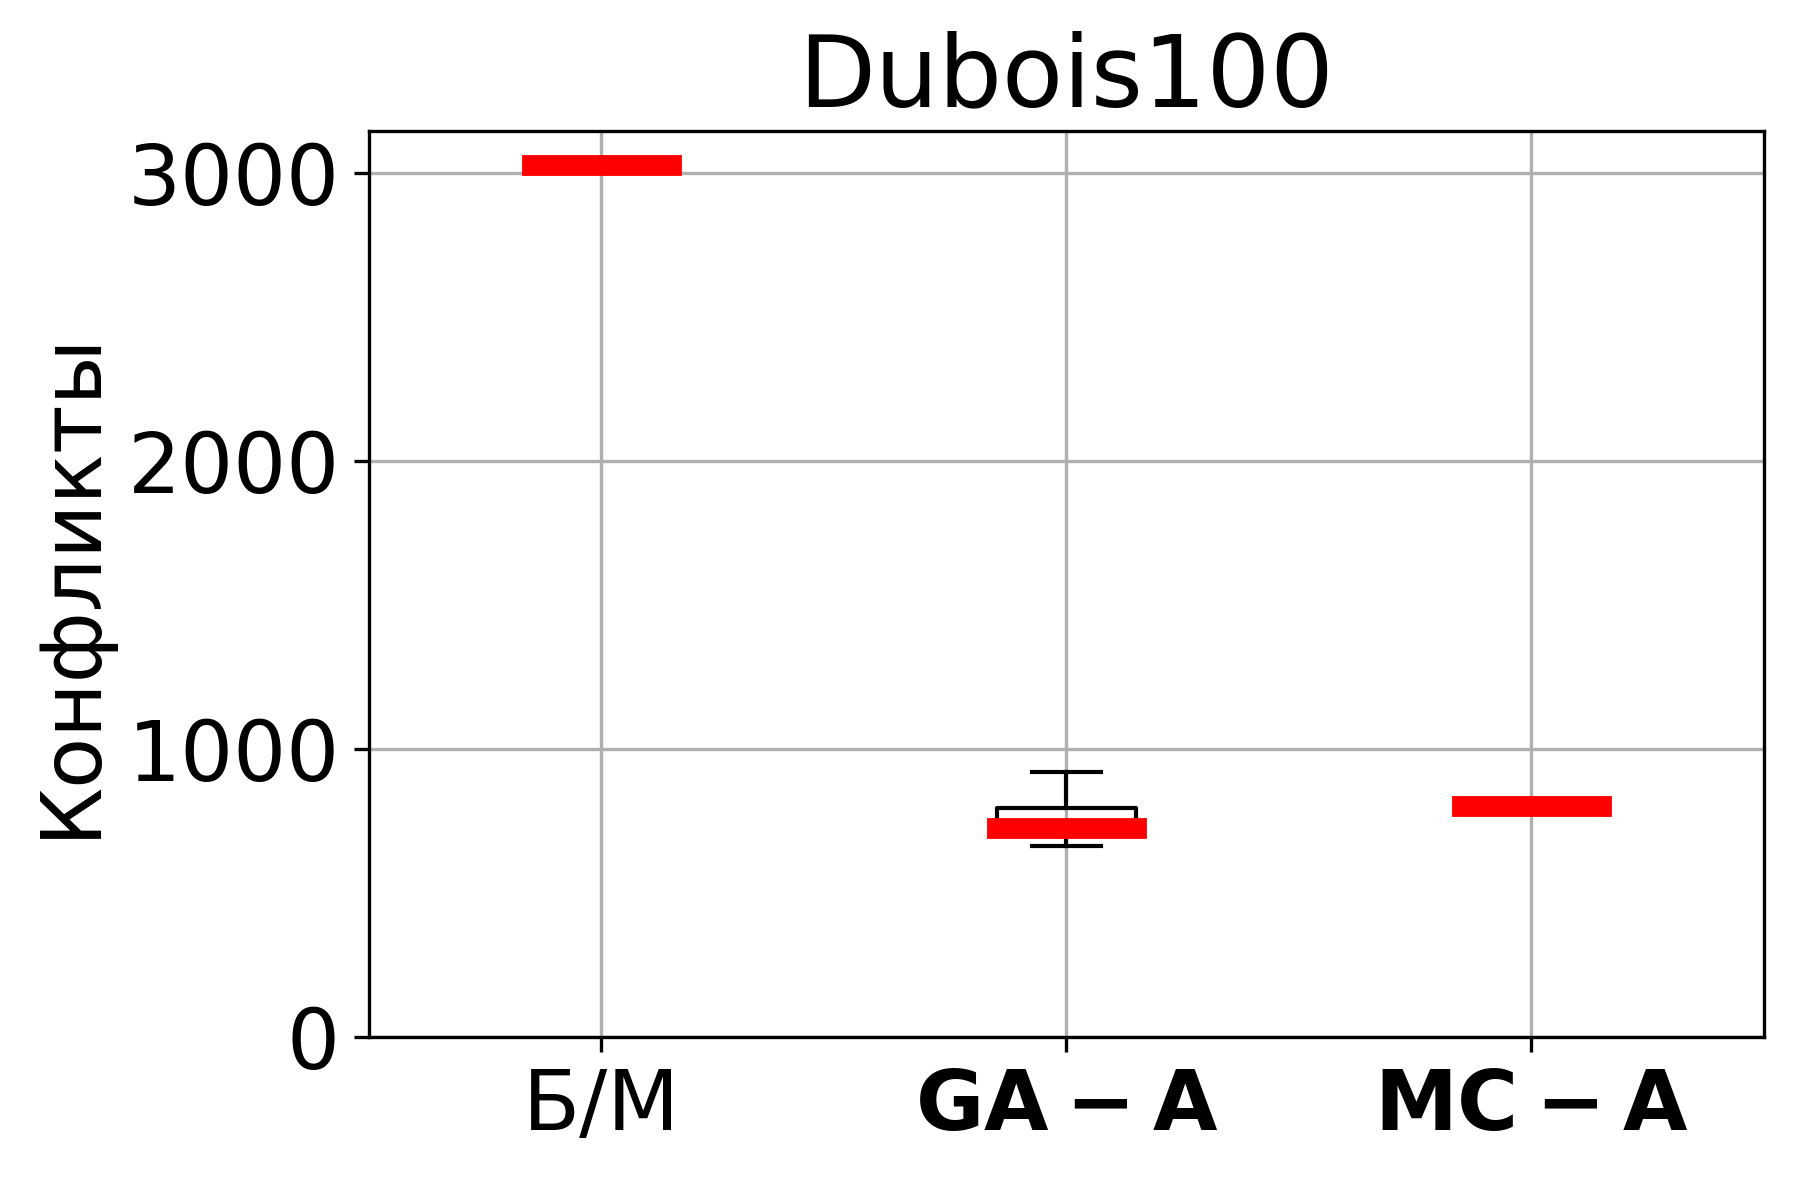

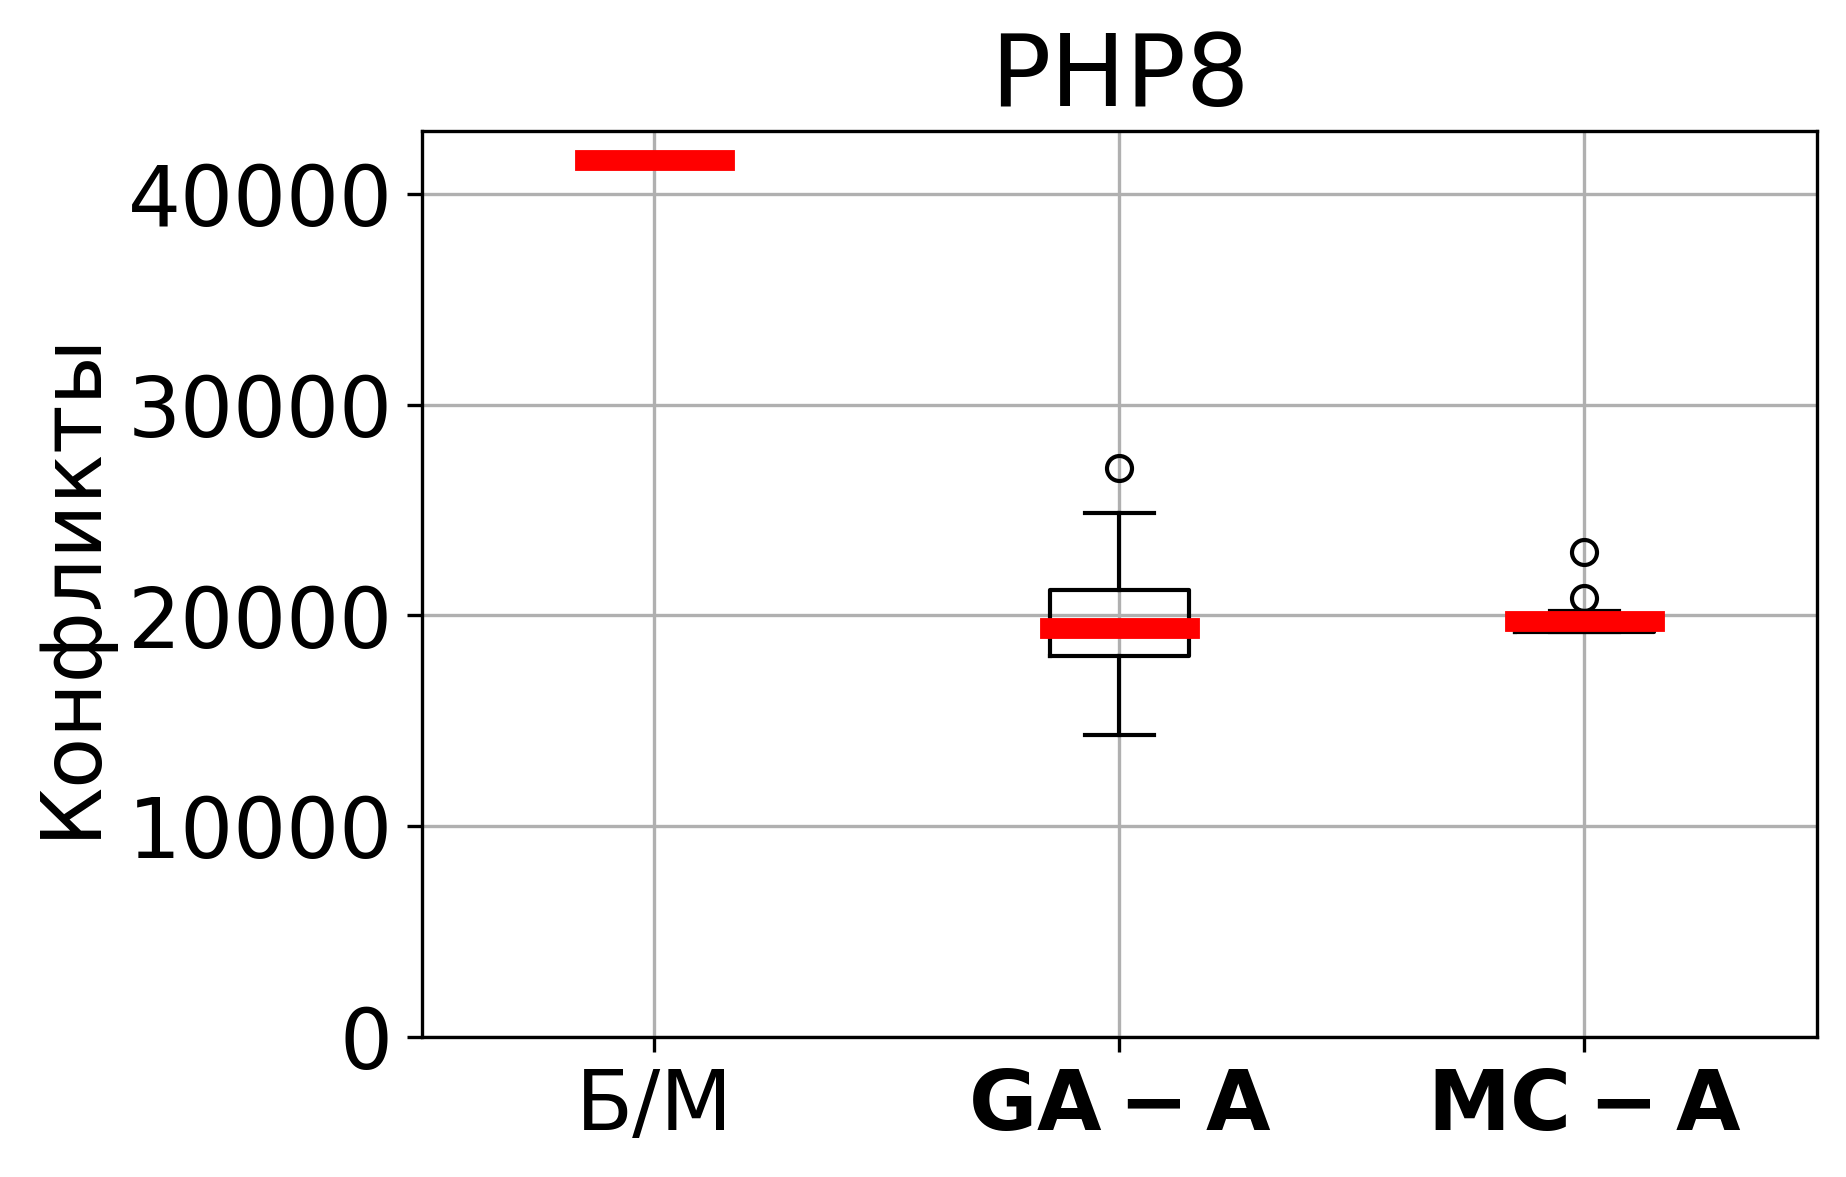

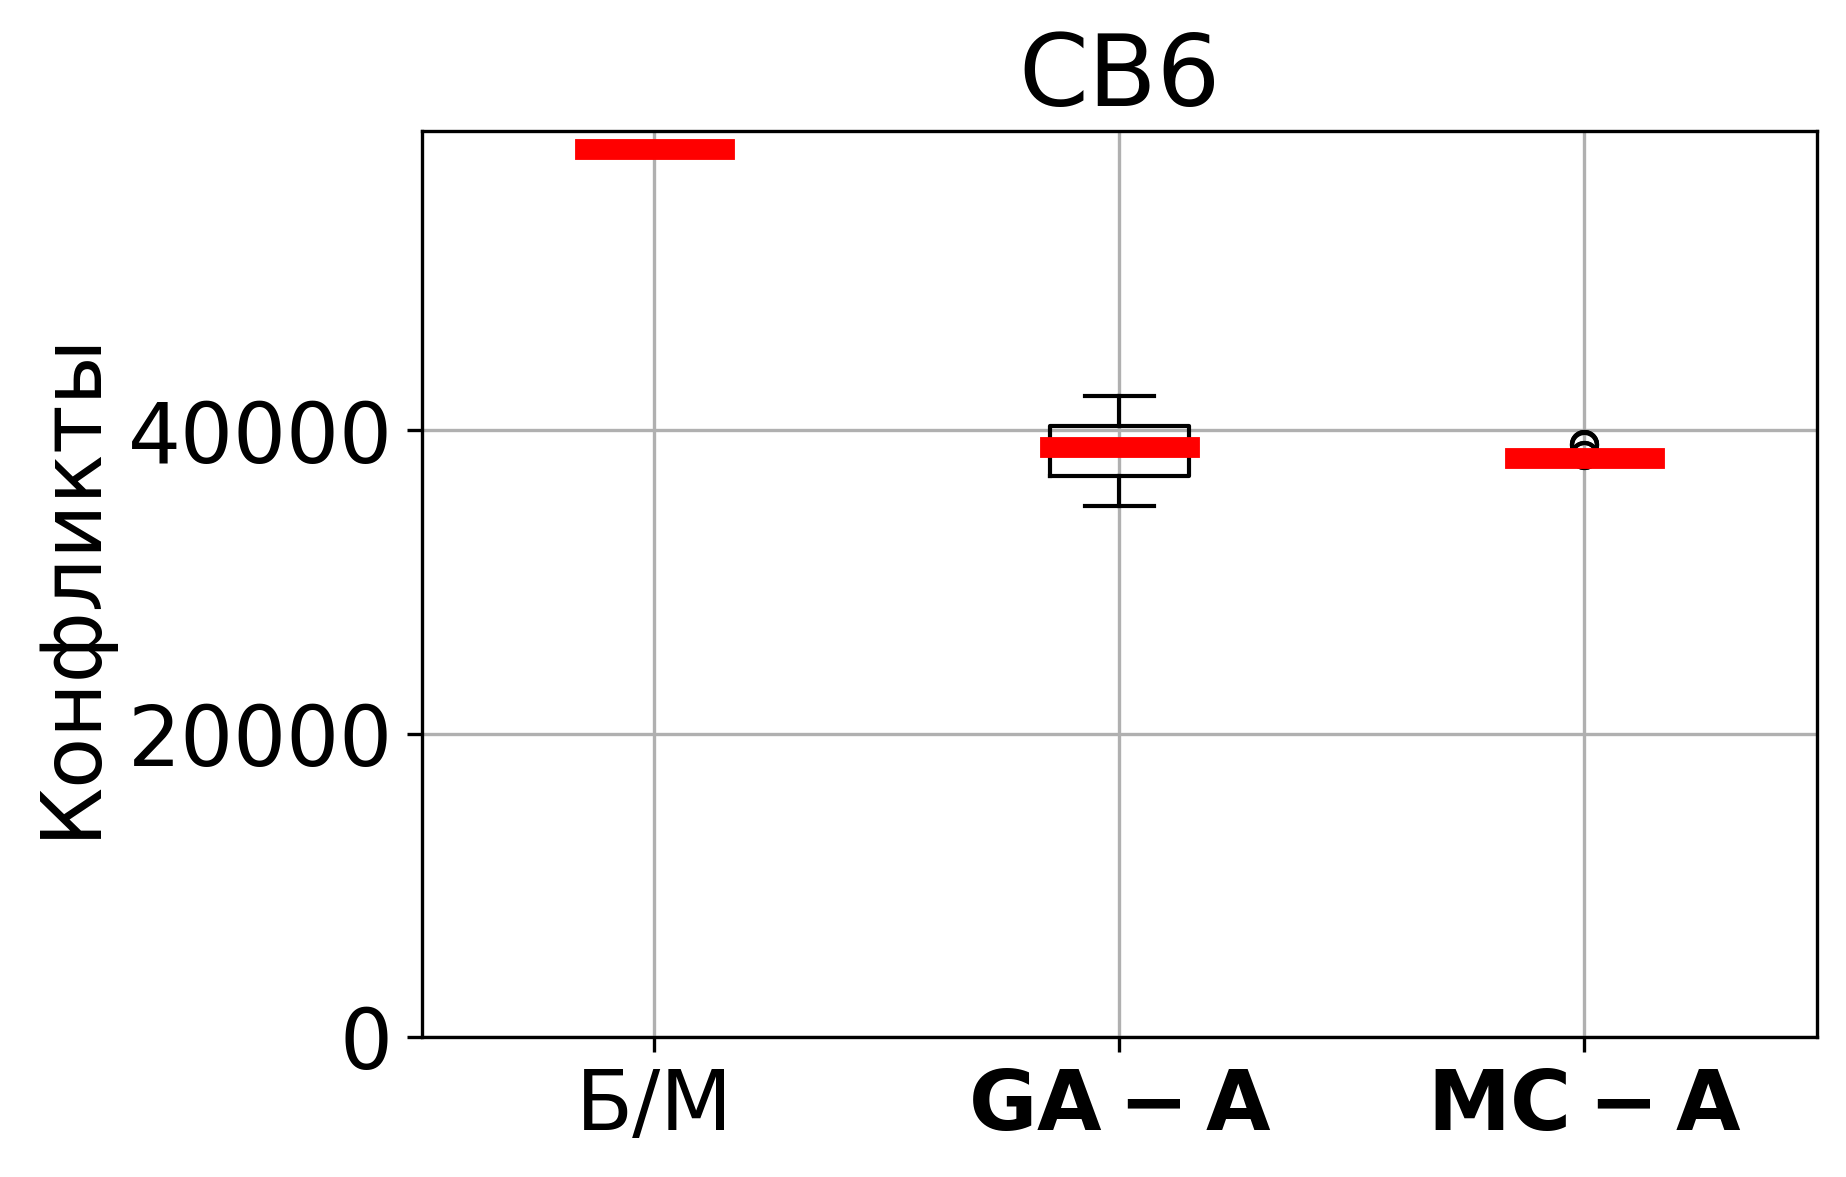

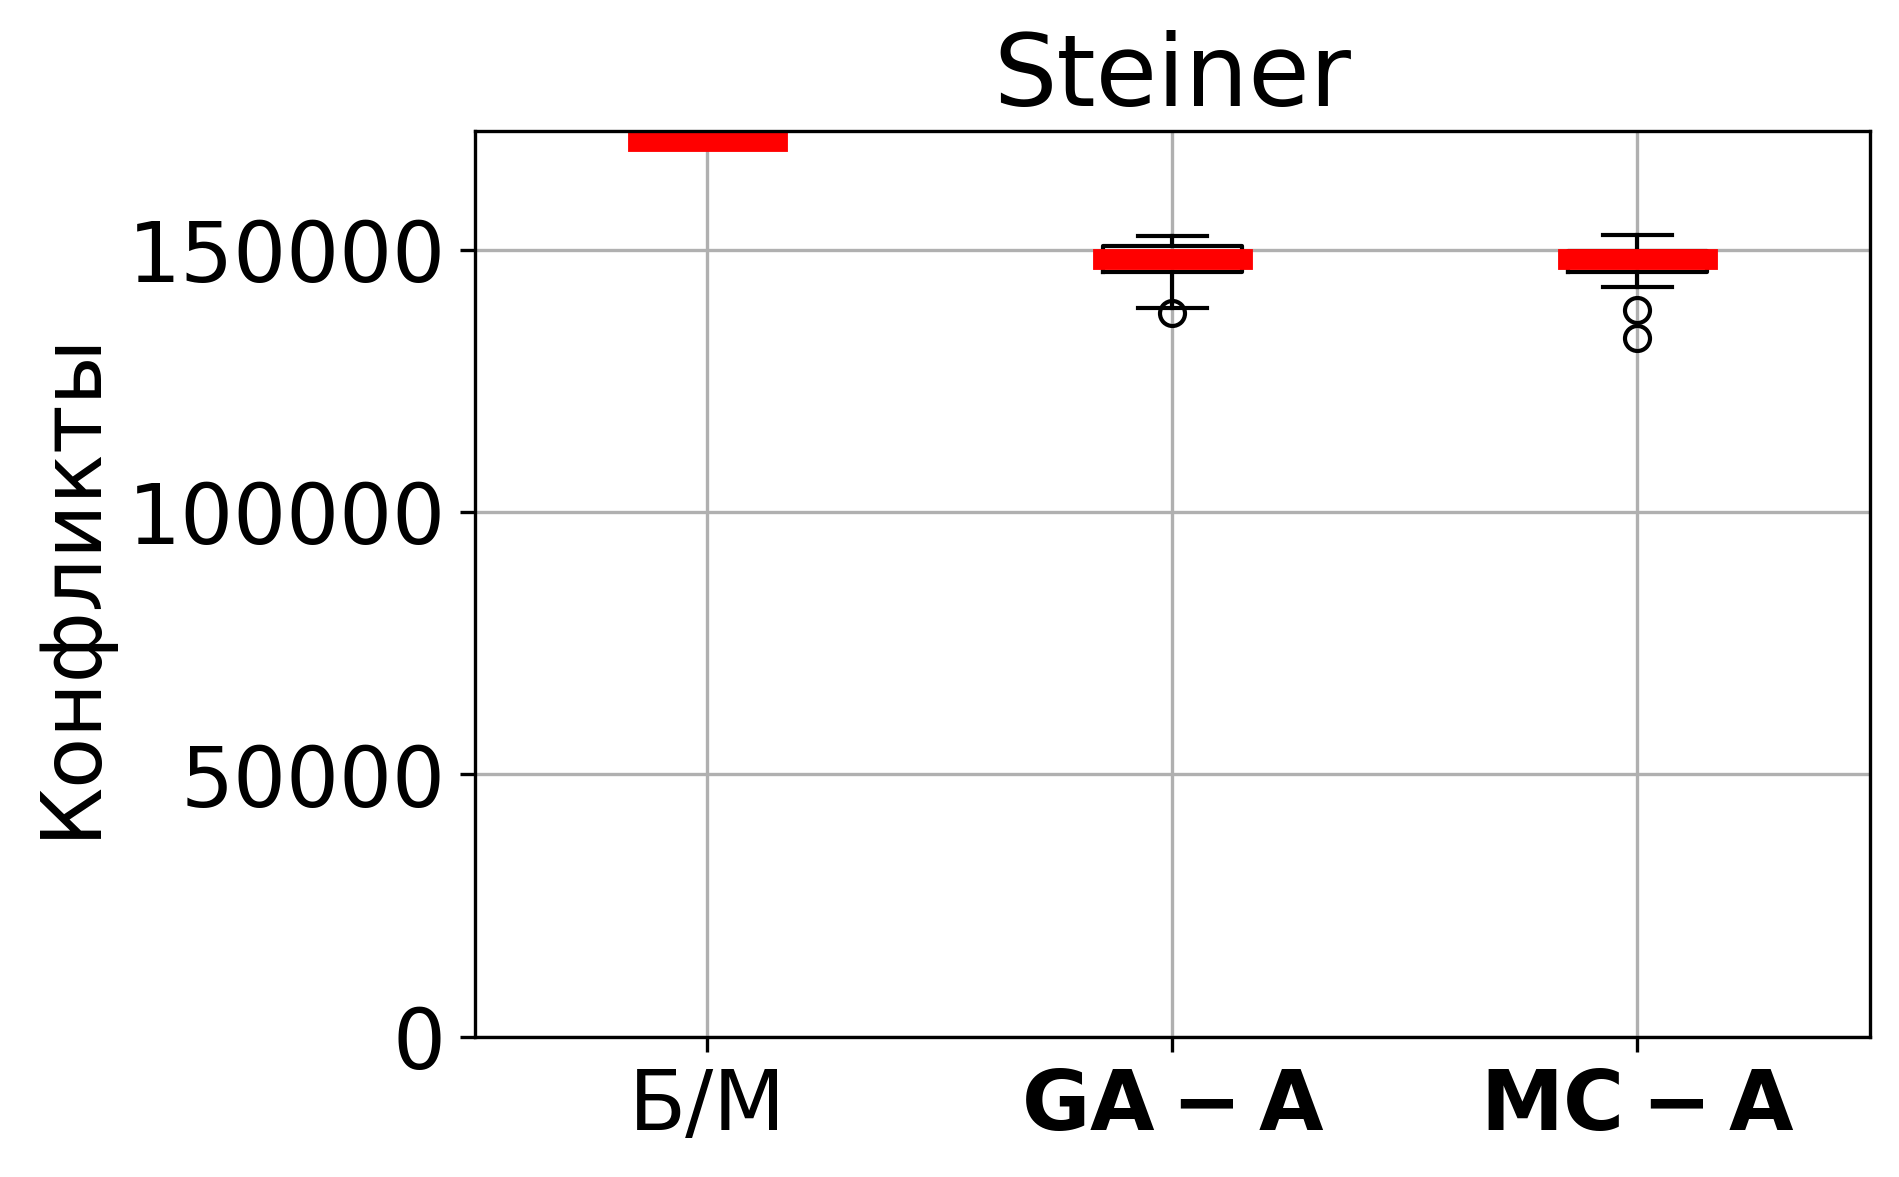

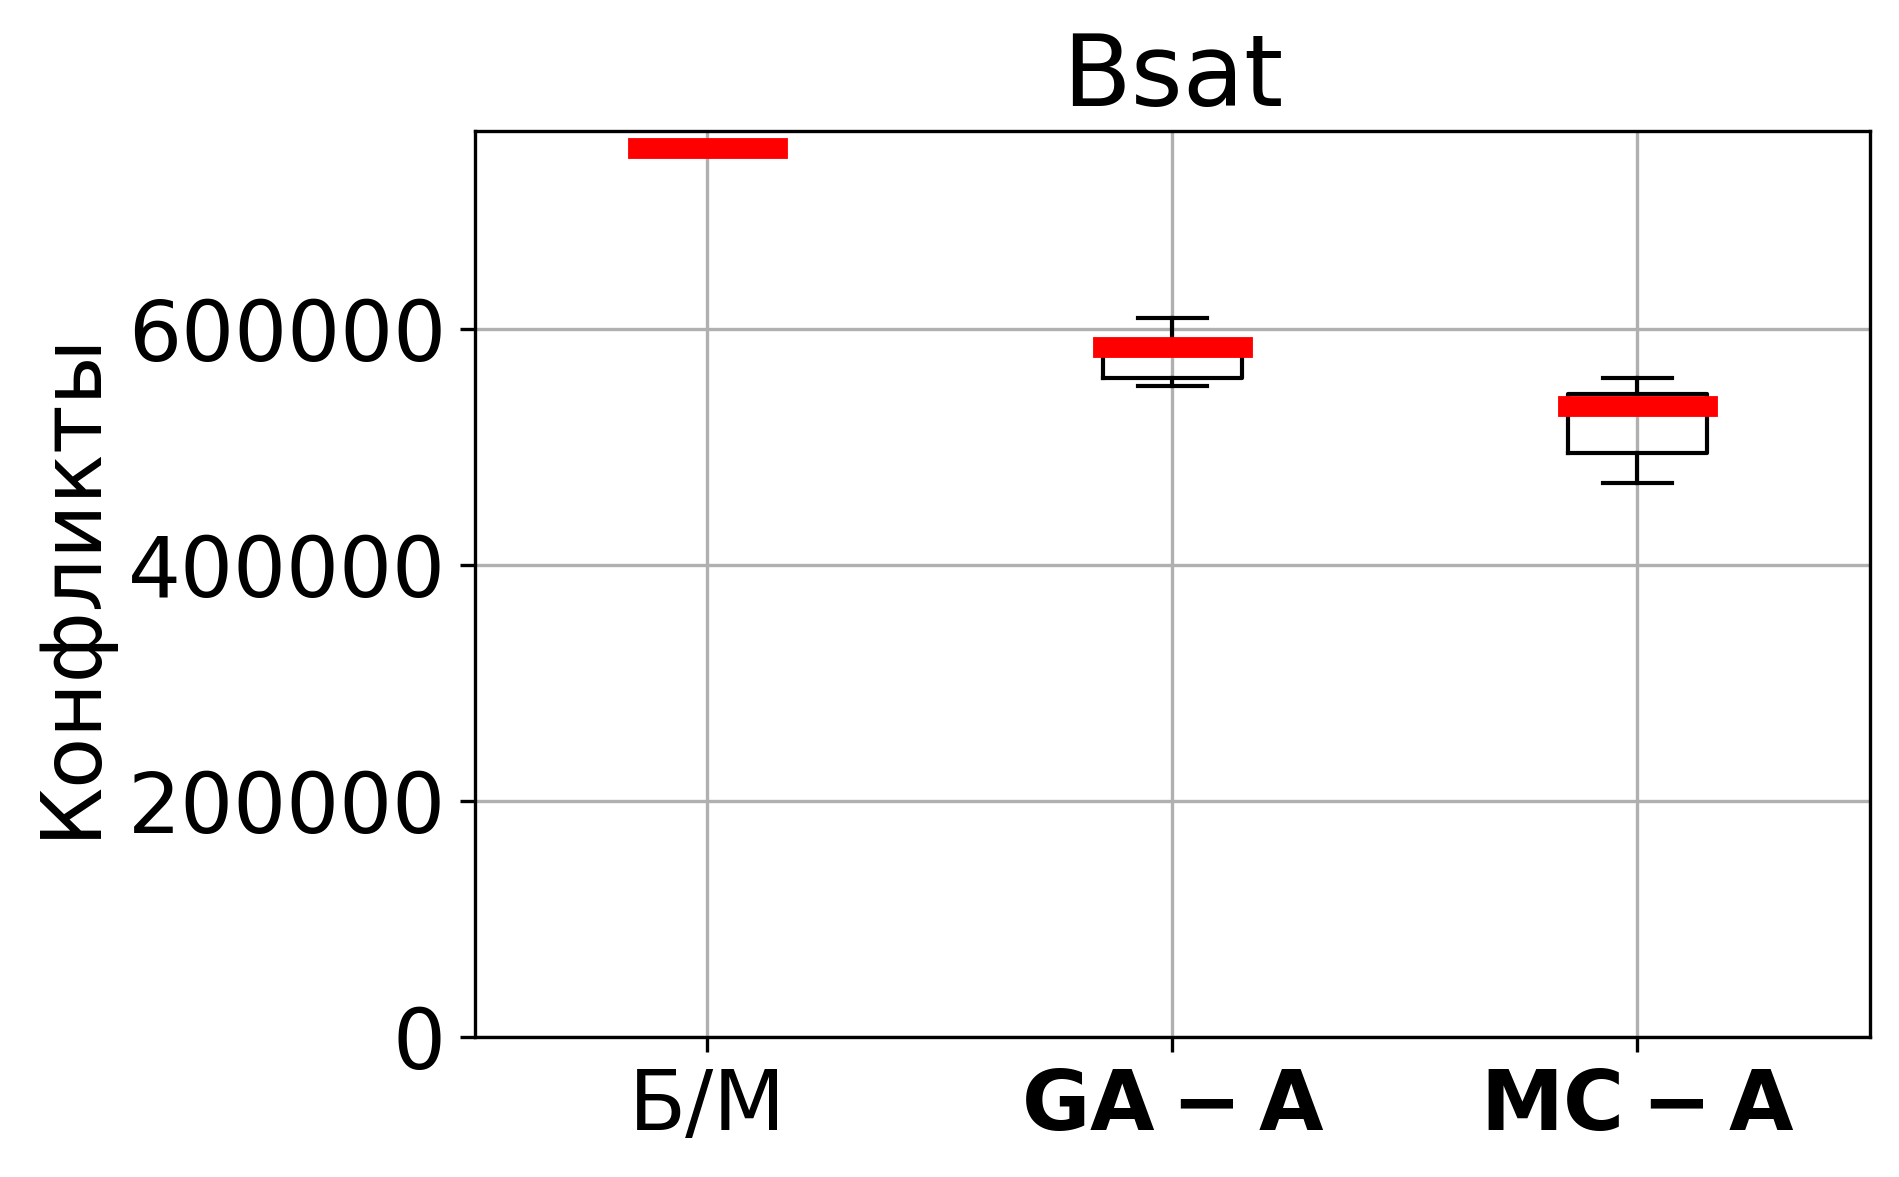

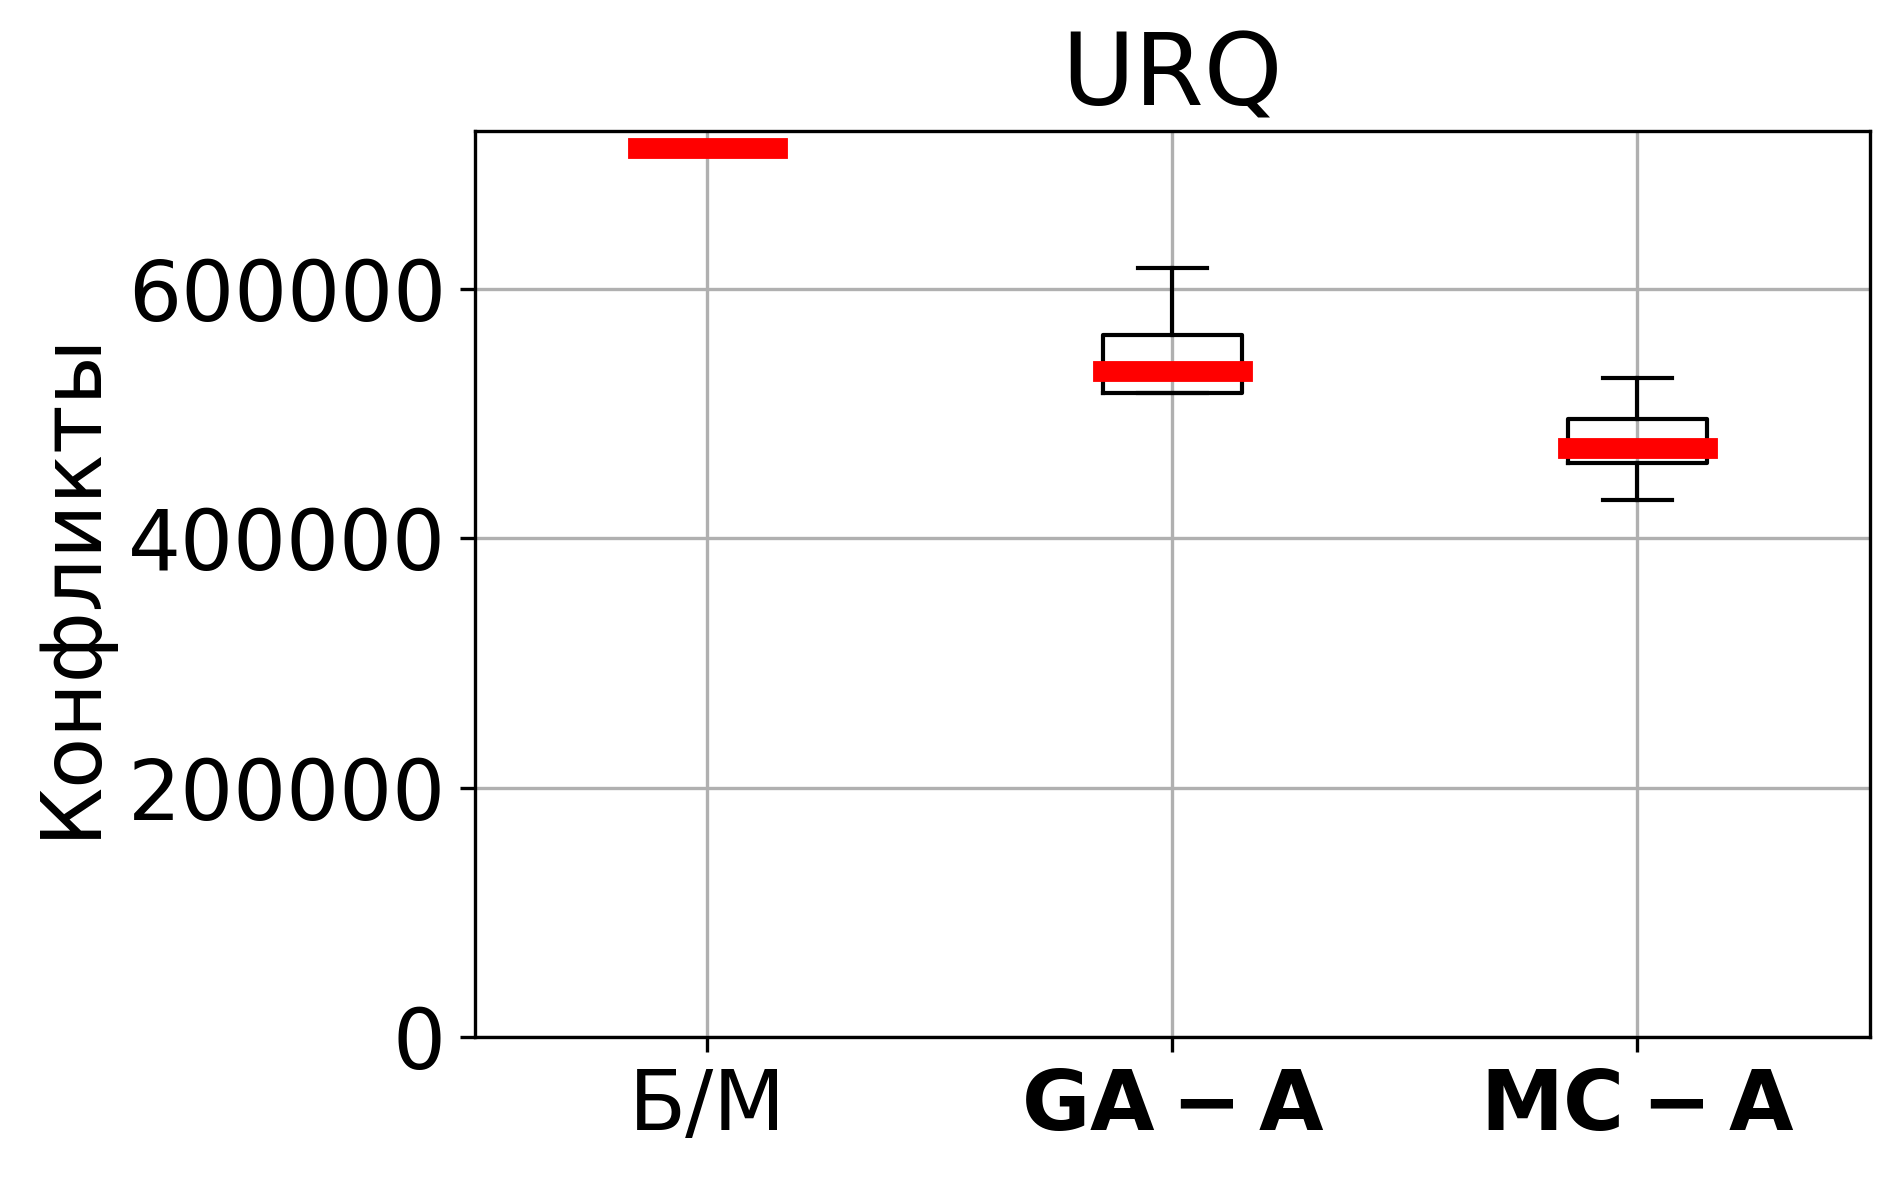

In [5]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  for experiment in filter(lambda x: benchmark in x['name'], baseline):
    data.append(experiment['json_agg'])
    names.append('Б/М')
  if benchmark == 'CB6':
    data.append([58581])
    names.append('Б/М')
  if benchmark == 'URQ':
    data.append([712708])
    names.append('Б/М')
  for experiment in filter(lambda x: benchmark in x['name'] and '-A' in x['name'], experimentResults):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1]
    names.append(r'$\mathbf{' + optimizer + '}$')

  plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.xticks([i for i in range(1, len(names) + 1)], names, rotation=0)
  plt.ylabel('Конфликты')
  plt.grid()
  plt.title(benchmark)
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()

In [6]:
for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  ga = []
  mc = []
  for experiment in filter(lambda x: benchmark in x['name'] and '-A' in x['name'], experimentResults):
    if 'GA-A' in experiment['name']:
      ga = experiment['json_agg']
    elif 'MC-A' in experiment['name']:
      mc = experiment['json_agg']
  print(benchmark)
  print(len(ga), len(mc))
  print(stats.mannwhitneyu(ga, mc))
  print()

Dubois100
24 24
MannwhitneyuResult(statistic=120.0, pvalue=0.00011123573056266311)

PHP8
24 24
MannwhitneyuResult(statistic=265.0, pvalue=0.3197864131759883)

CB6
24 24
MannwhitneyuResult(statistic=251.0, pvalue=0.22286490553896193)

Steiner
24 24
MannwhitneyuResult(statistic=264.0, pvalue=0.3139889312344954)

Bsat
24 24
MannwhitneyuResult(statistic=8.0, pvalue=3.943118004117856e-09)

URQ
24 24
MannwhitneyuResult(statistic=9.0, pvalue=4.09078469473895e-09)



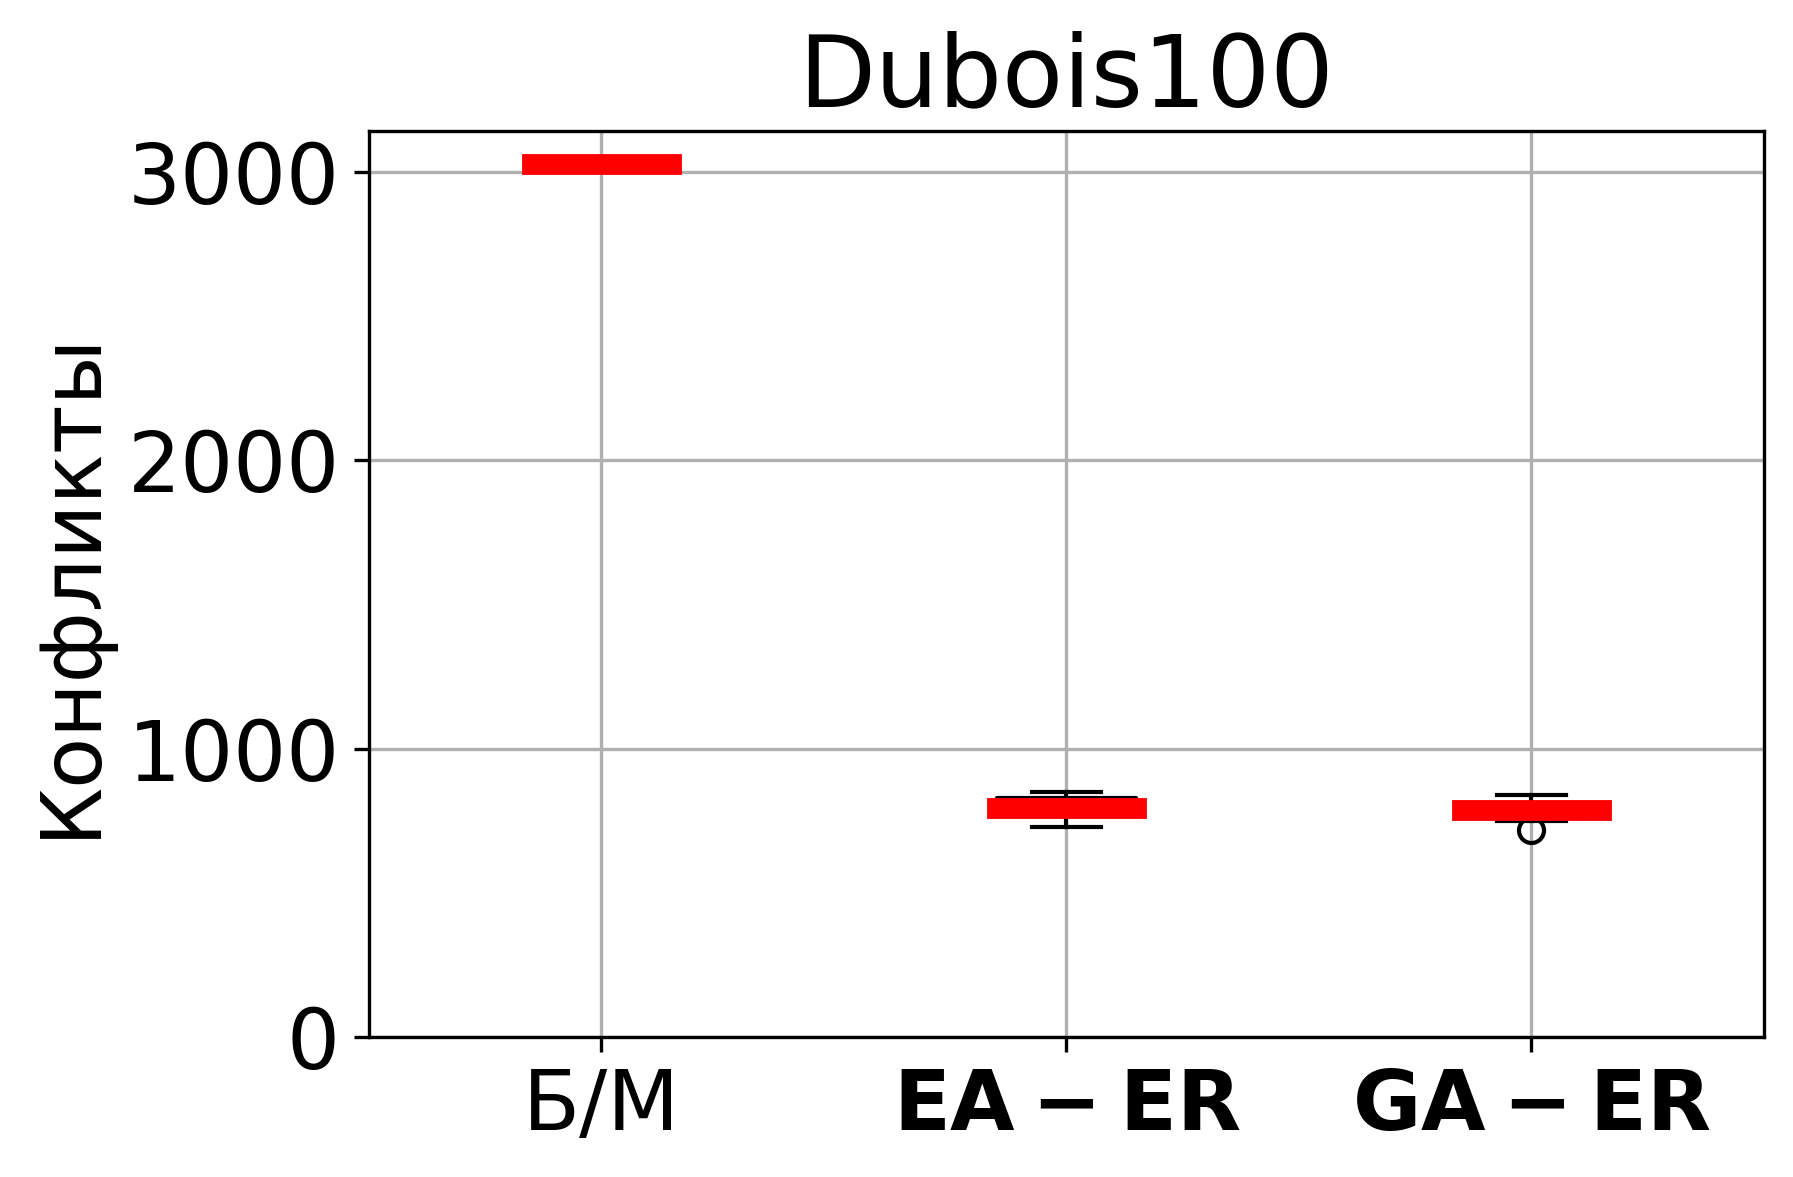

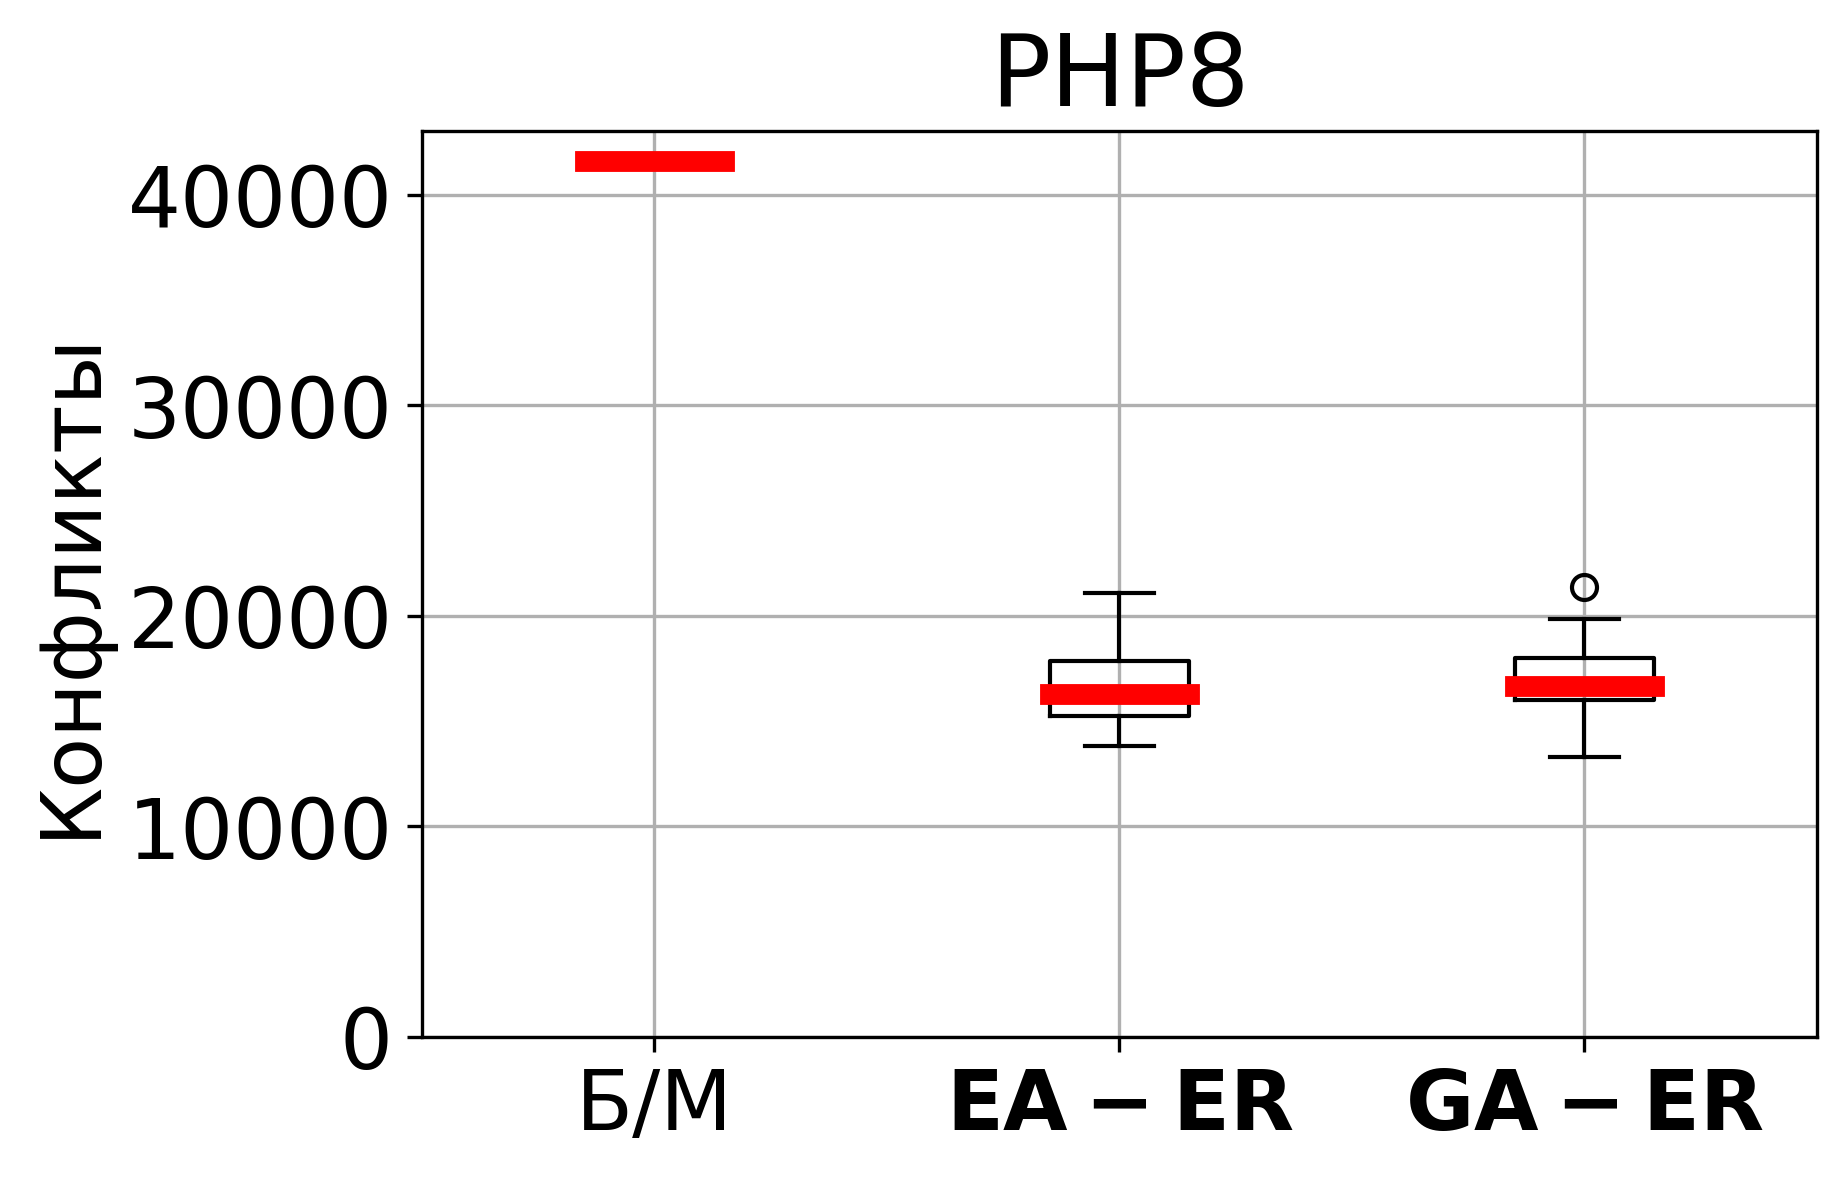

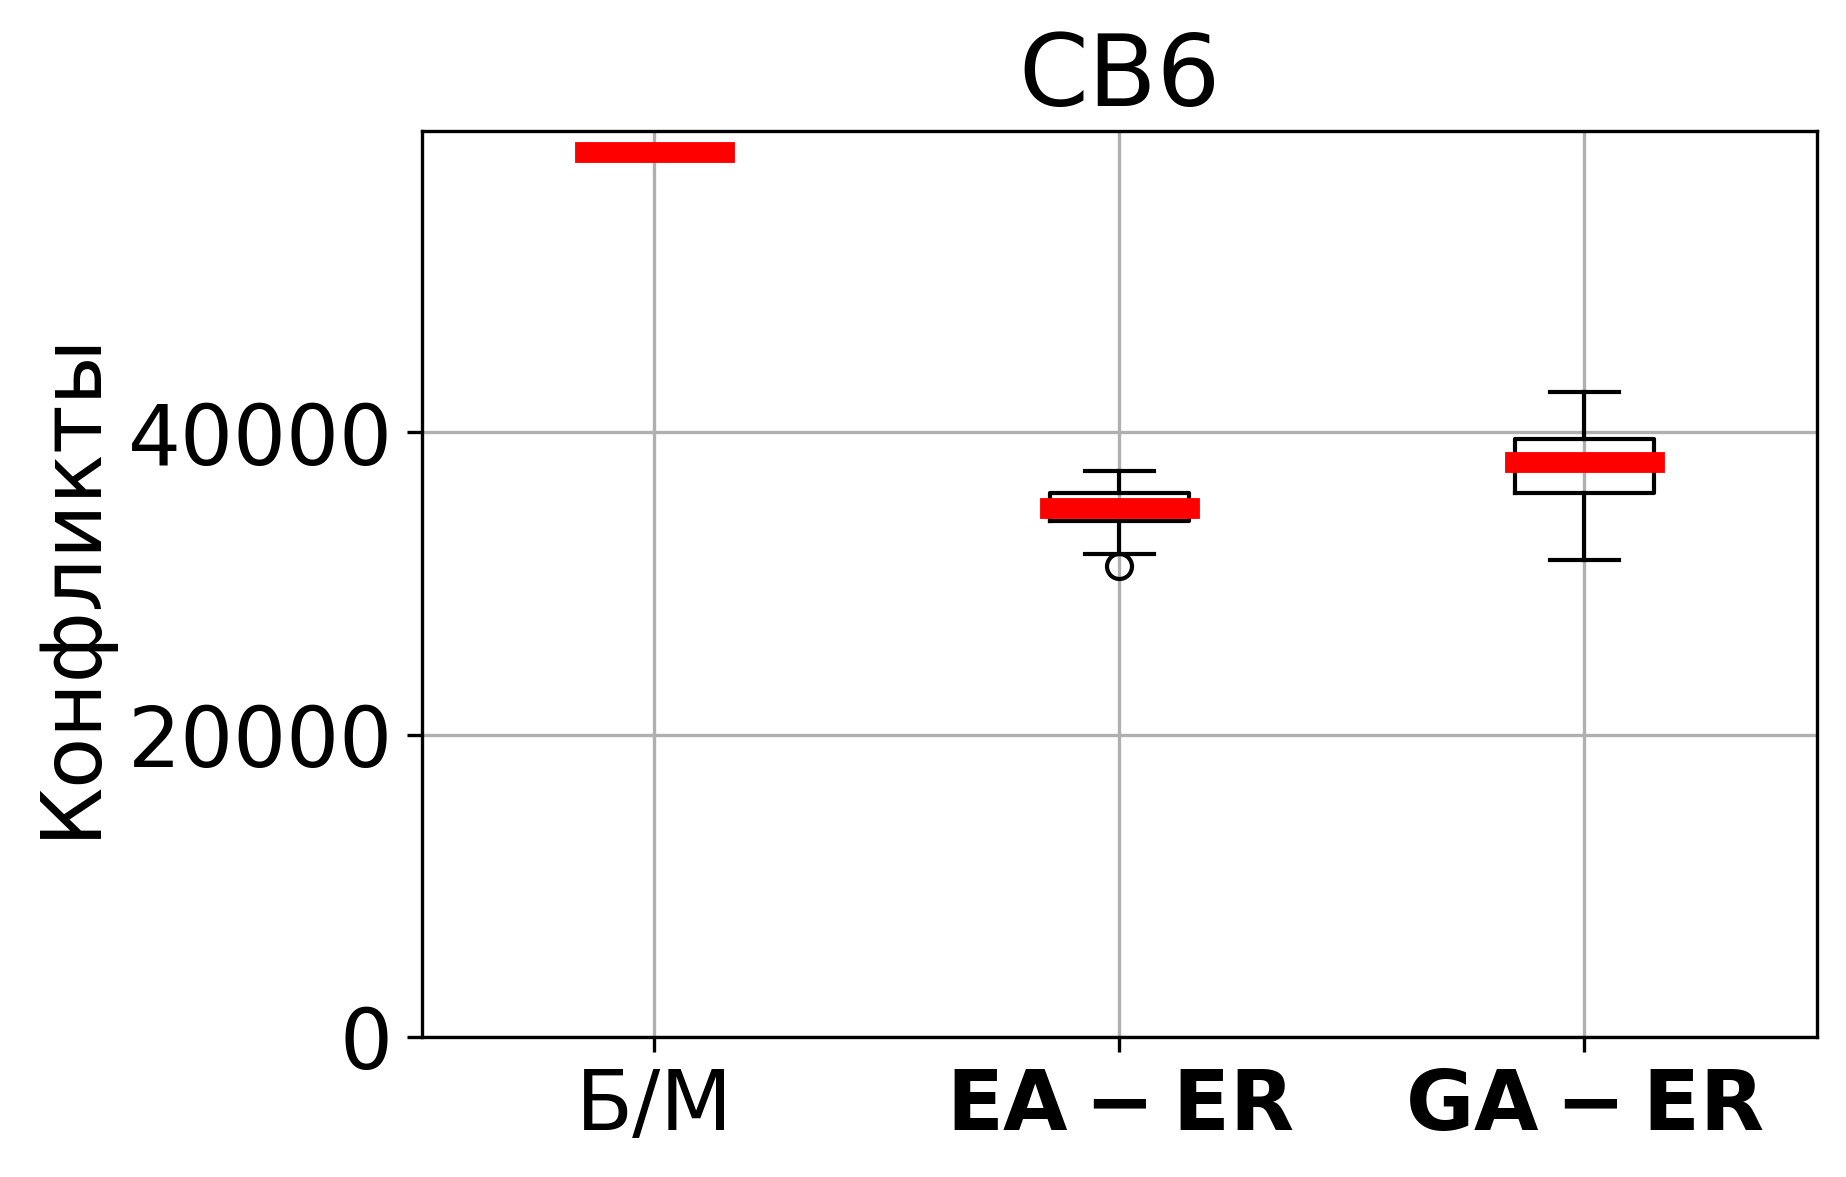

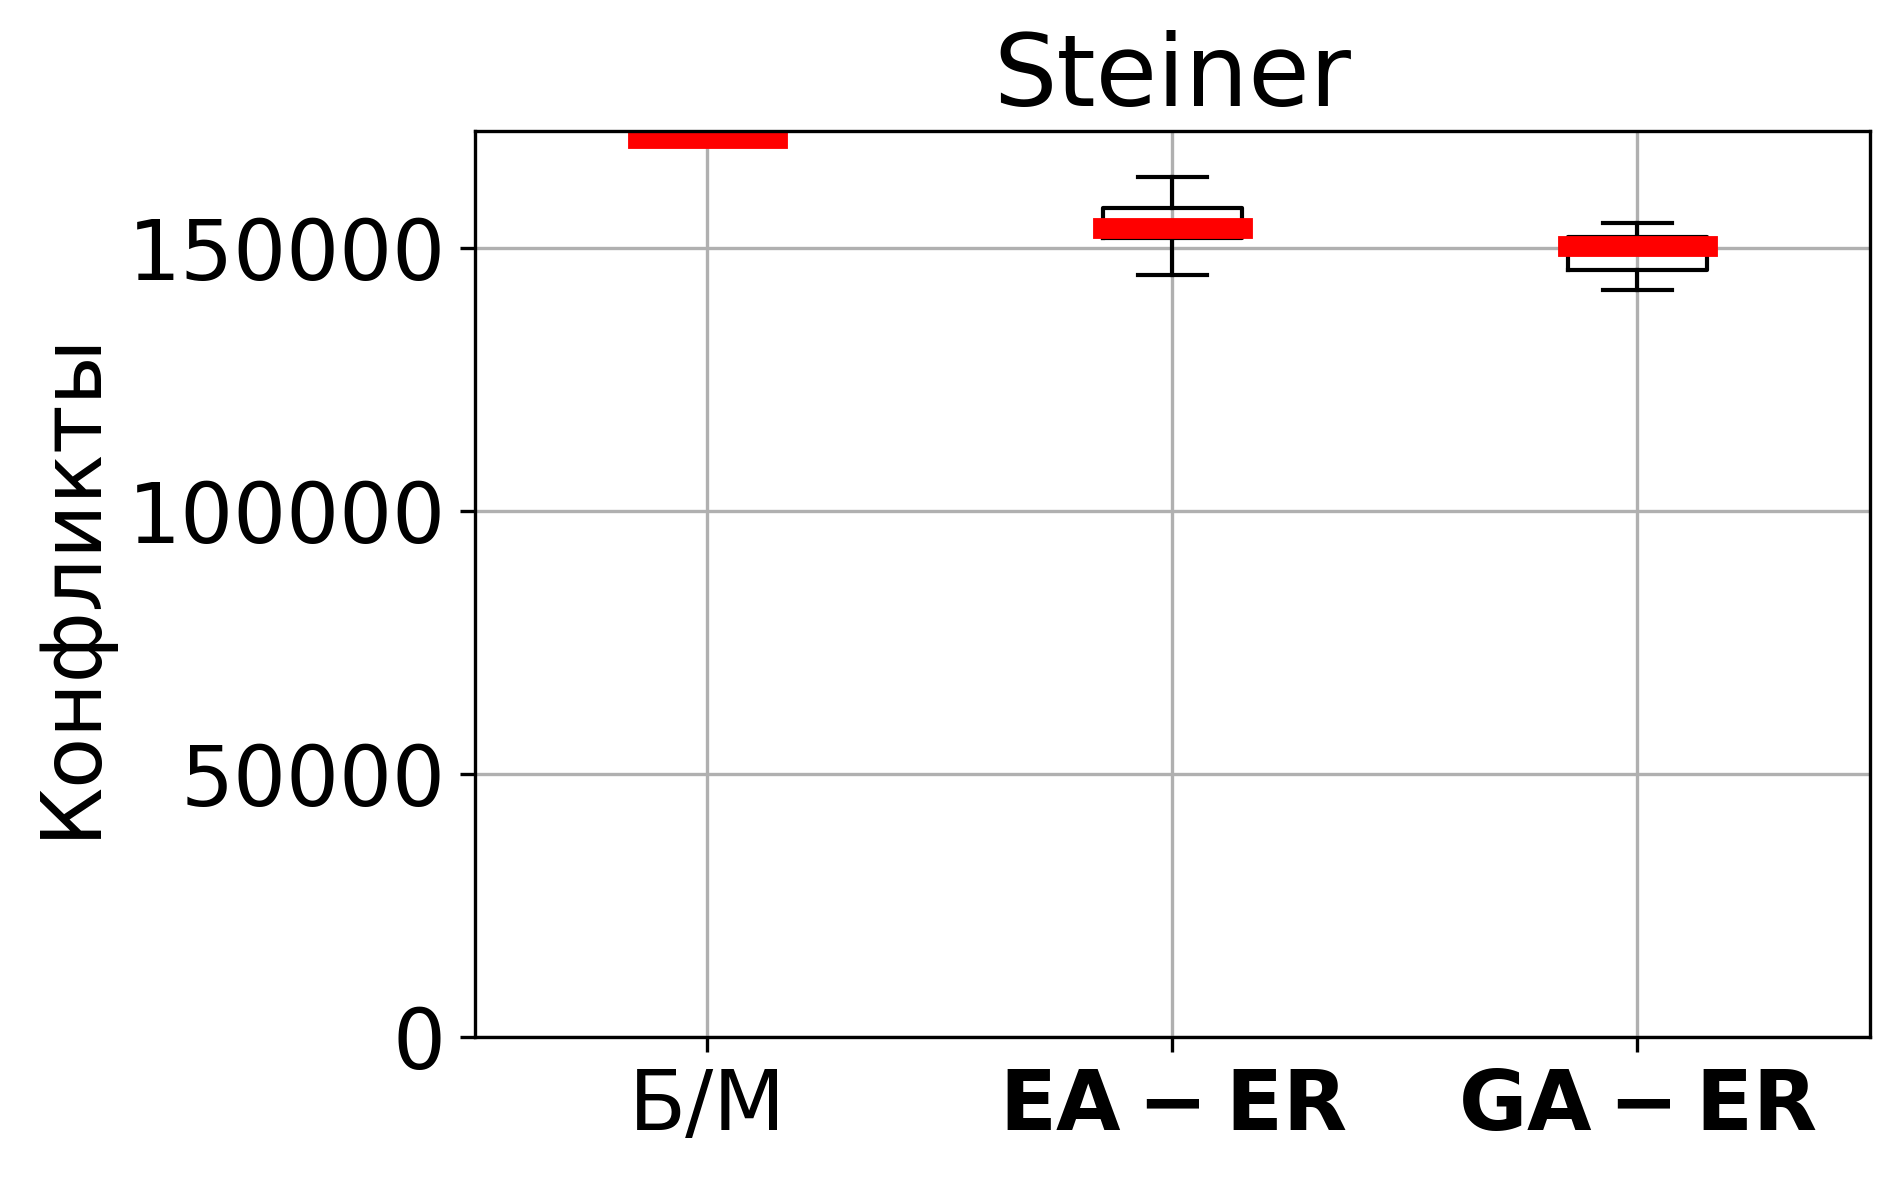

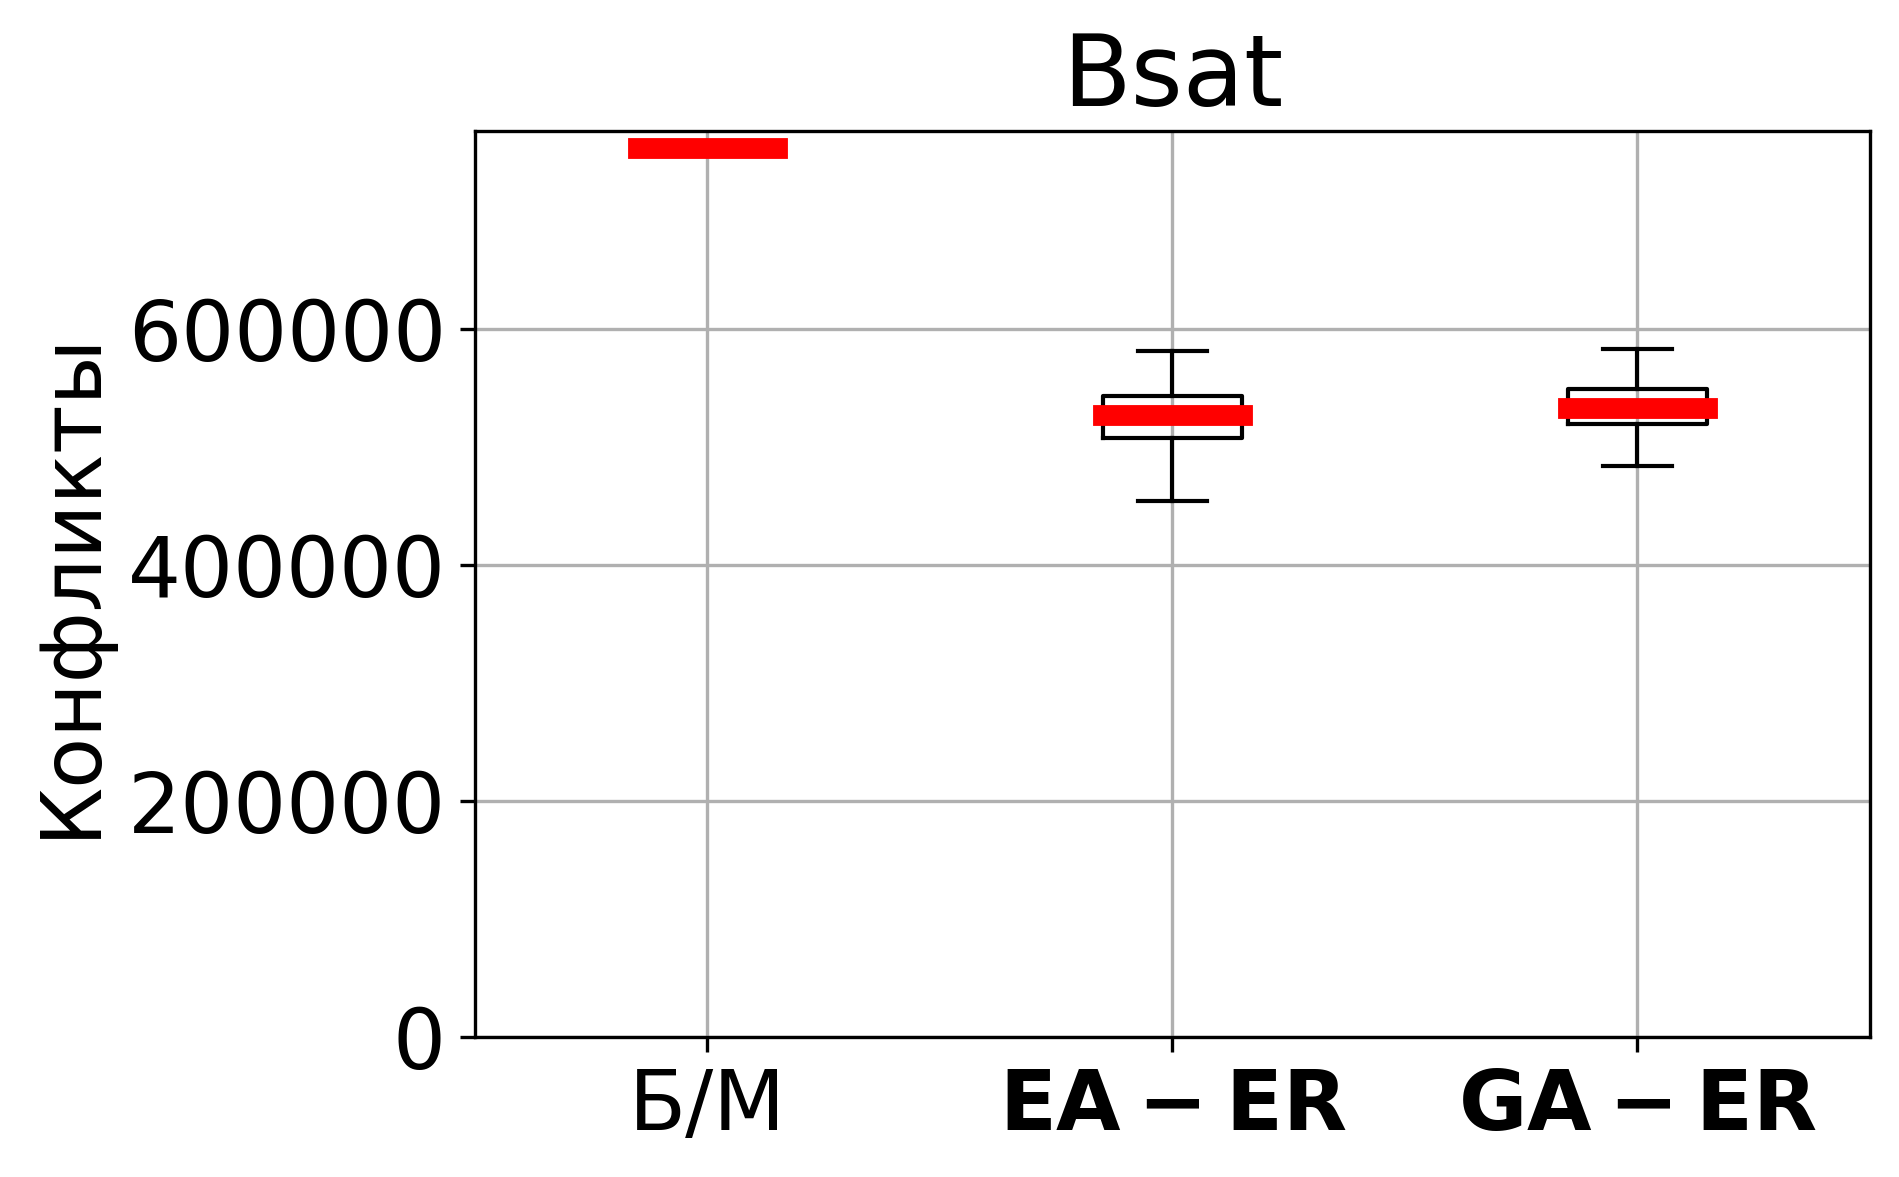

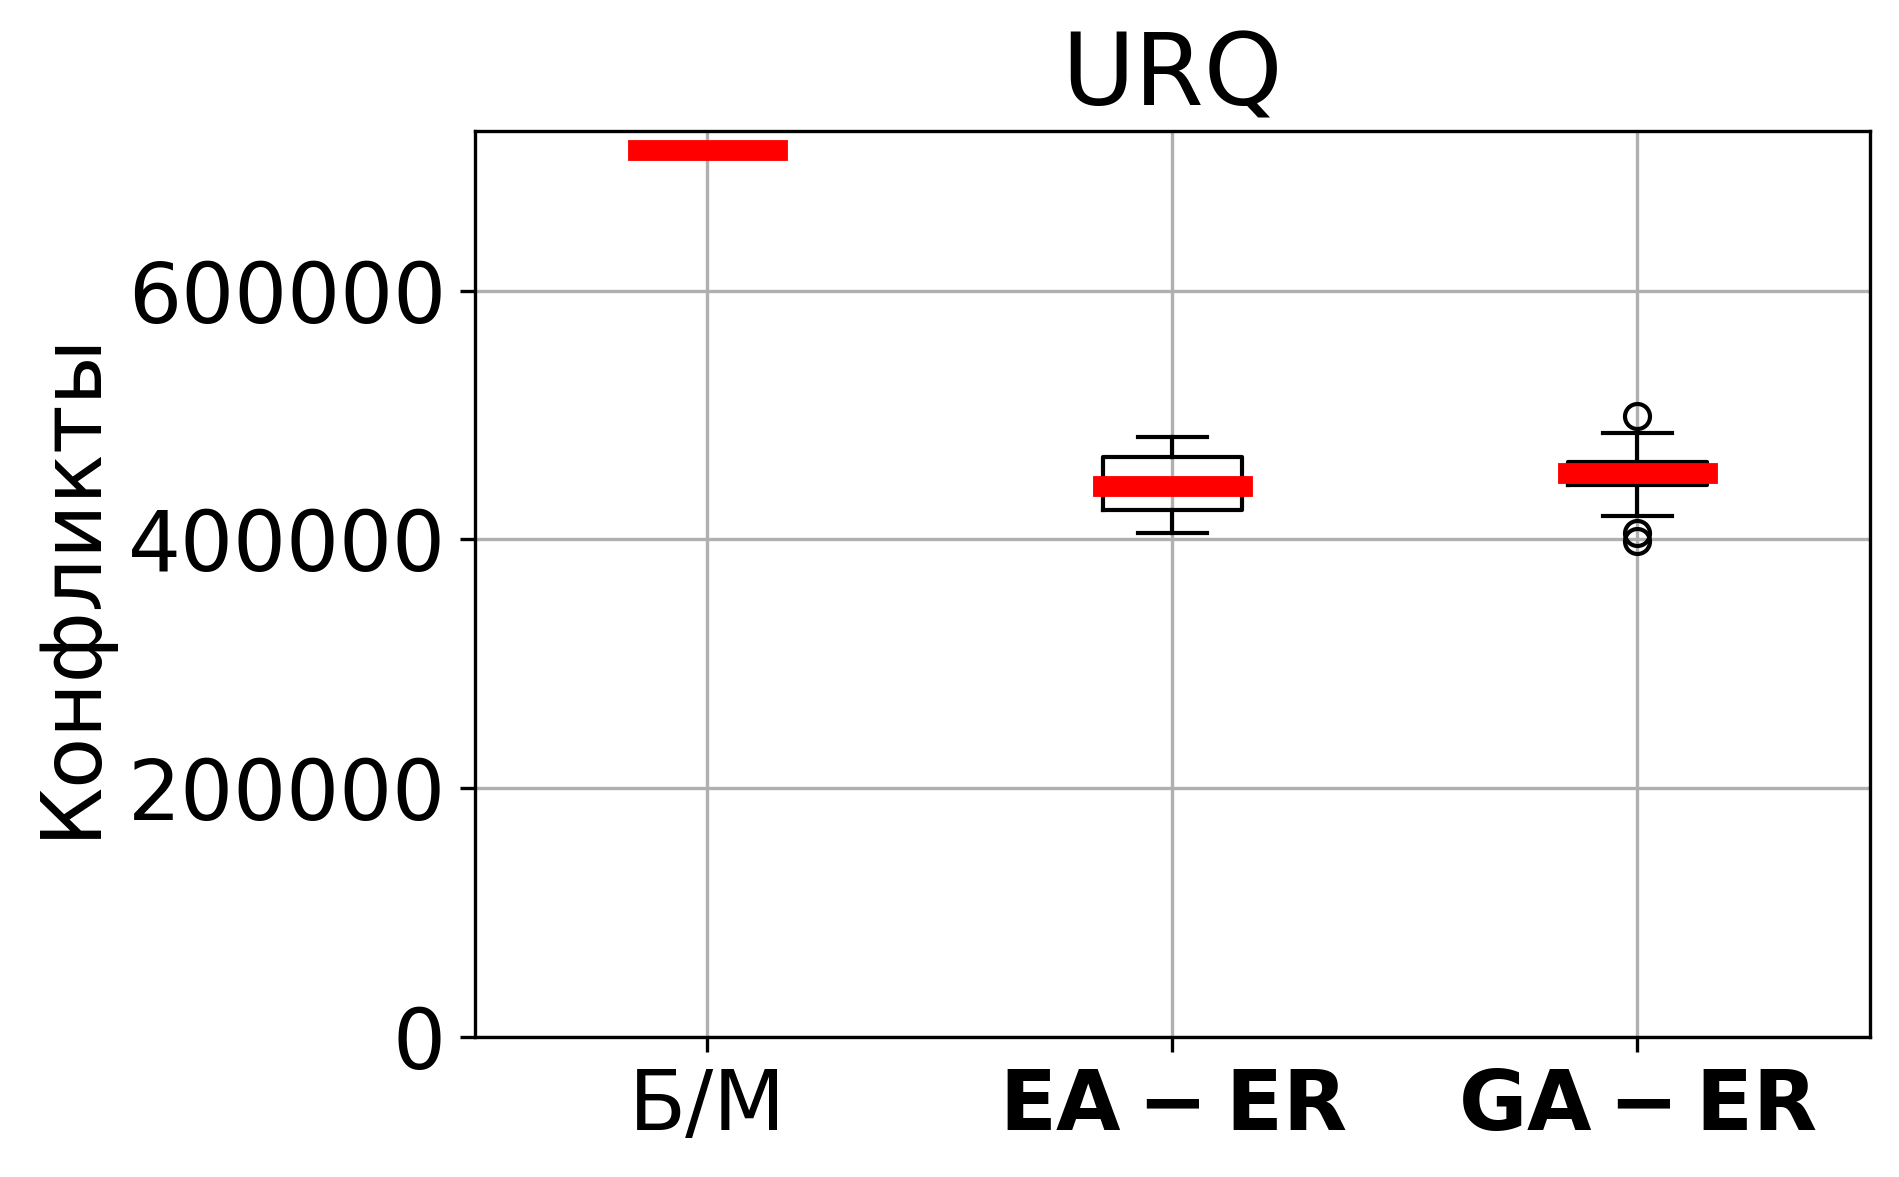

In [7]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  for experiment in filter(lambda x: benchmark in x['name'], baseline):
    data.append(experiment['json_agg'])
    names.append('Б/М')
  if benchmark == 'CB6':
    data.append([58581])
    names.append('Б/М')
  if benchmark == 'URQ':
    data.append([712708])
    names.append('Б/М')
  for experiment in filter(lambda x: benchmark in x['name'] and 'A-ER' in x['name'], experimentResults):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1]
    names.append(r'$\mathbf{' + optimizer + '}$')

  plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.xticks([i for i in range(1, len(names) + 1)], names, rotation=0)
  plt.ylabel('Конфликты')
  plt.grid()
  plt.title(benchmark)
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()

In [8]:
for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  ga = []
  ea = []
  for experiment in filter(lambda x: benchmark in x['name'] and 'A-ER' in x['name'], experimentResults):
    if 'GA' in experiment['name']:
      ga = experiment['json_agg']
    elif 'EA' in experiment['name']:
      ea = experiment['json_agg']
  print(benchmark)
  print(len(ga), len(ea))
  print(stats.mannwhitneyu(ga, ea))
  print()

Dubois100
24 24
MannwhitneyuResult(statistic=250.5, pvalue=0.2226360395888204)

PHP8
24 24
MannwhitneyuResult(statistic=237.0, pvalue=0.14886991988770537)

CB6
24 24
MannwhitneyuResult(statistic=100.0, pvalue=5.527558221978235e-05)

Steiner
24 24
MannwhitneyuResult(statistic=103.0, pvalue=7.109544375940641e-05)

Bsat
24 24
MannwhitneyuResult(statistic=238.0, pvalue=0.15370474337408246)

URQ
24 24
MannwhitneyuResult(statistic=252.5, pvalue=0.23523718872615496)



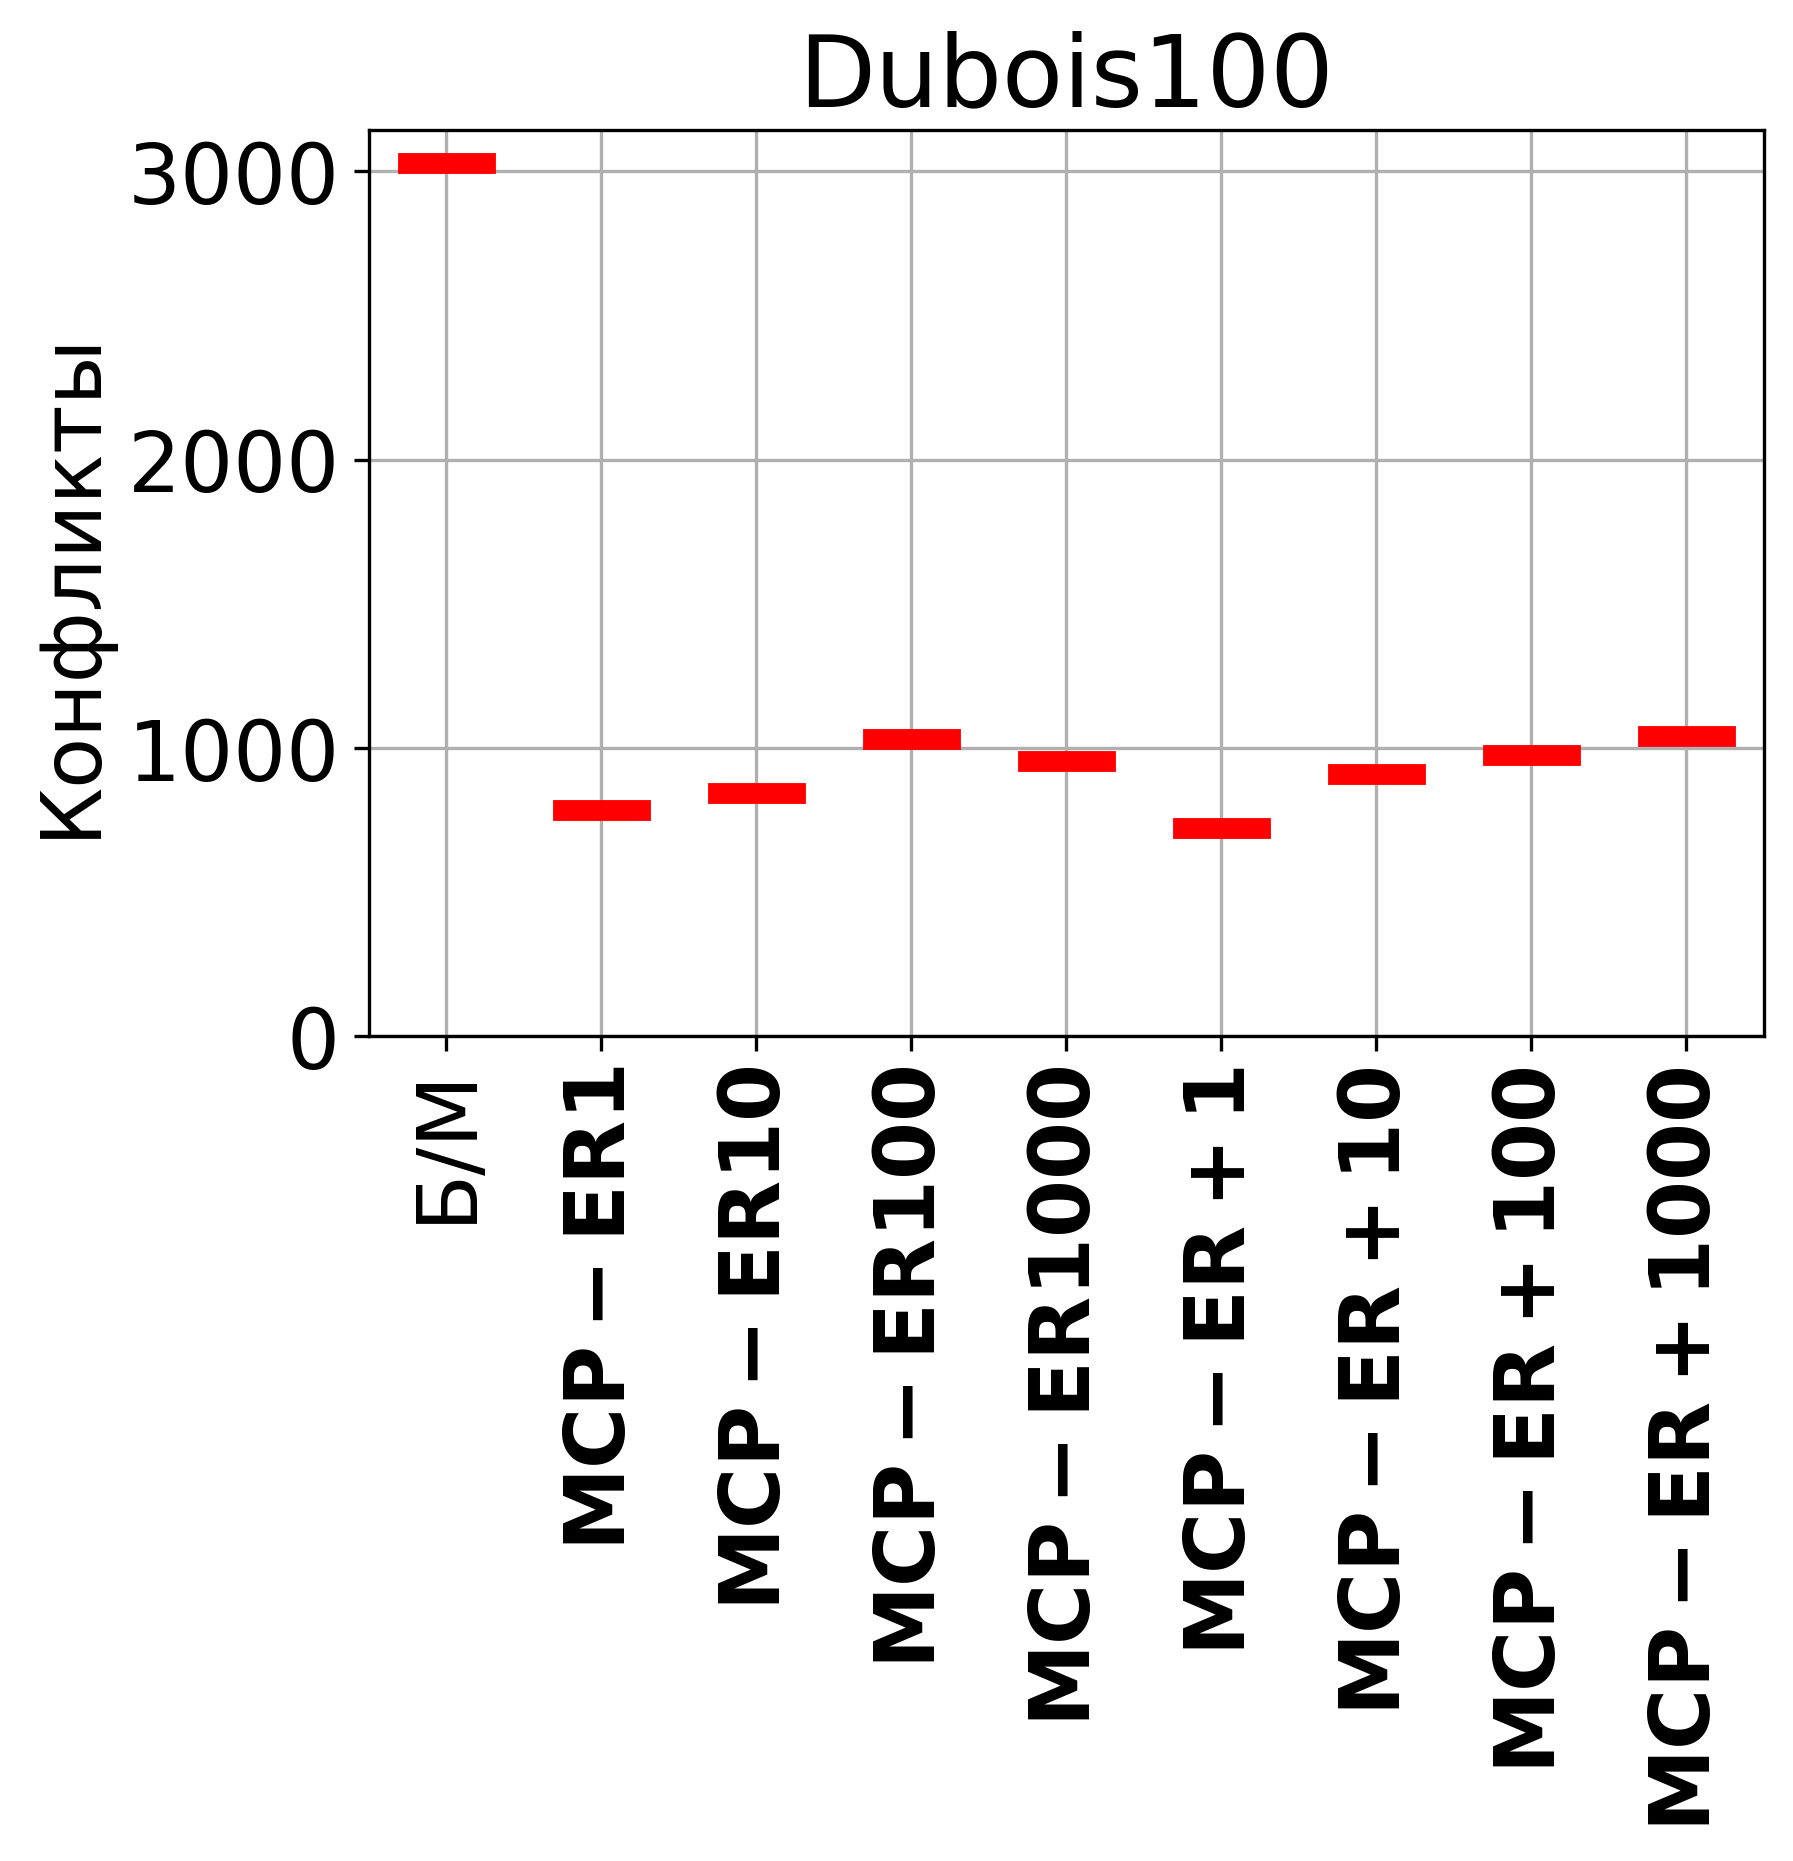

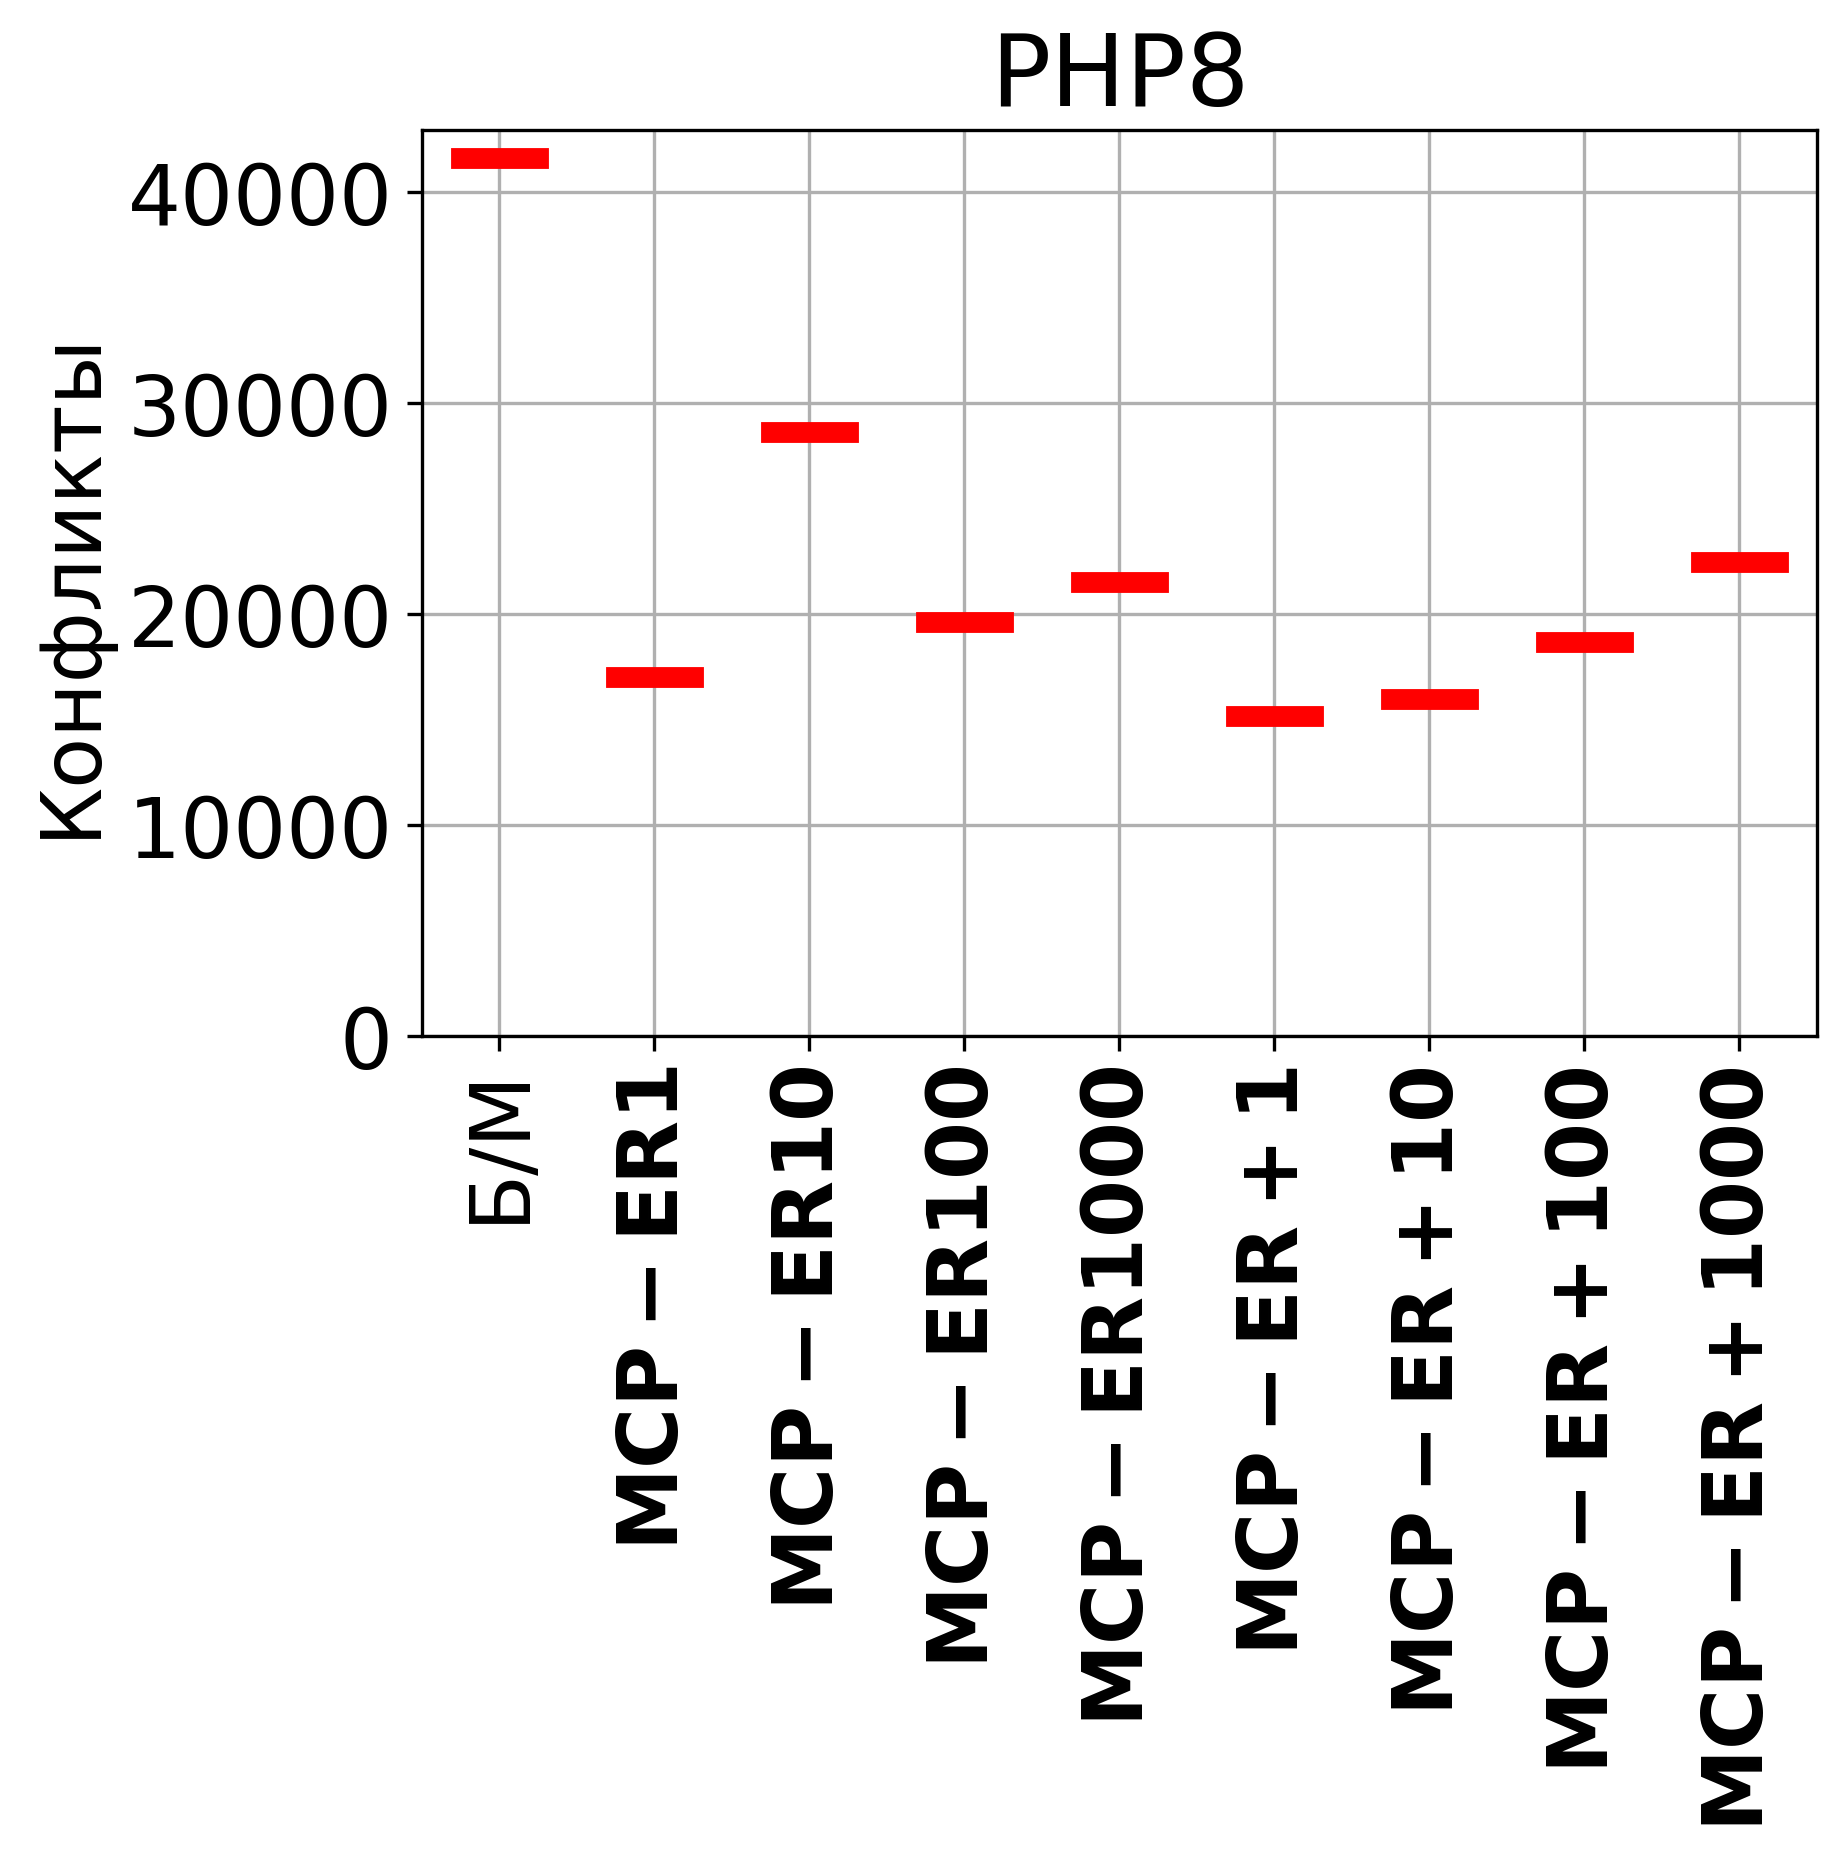

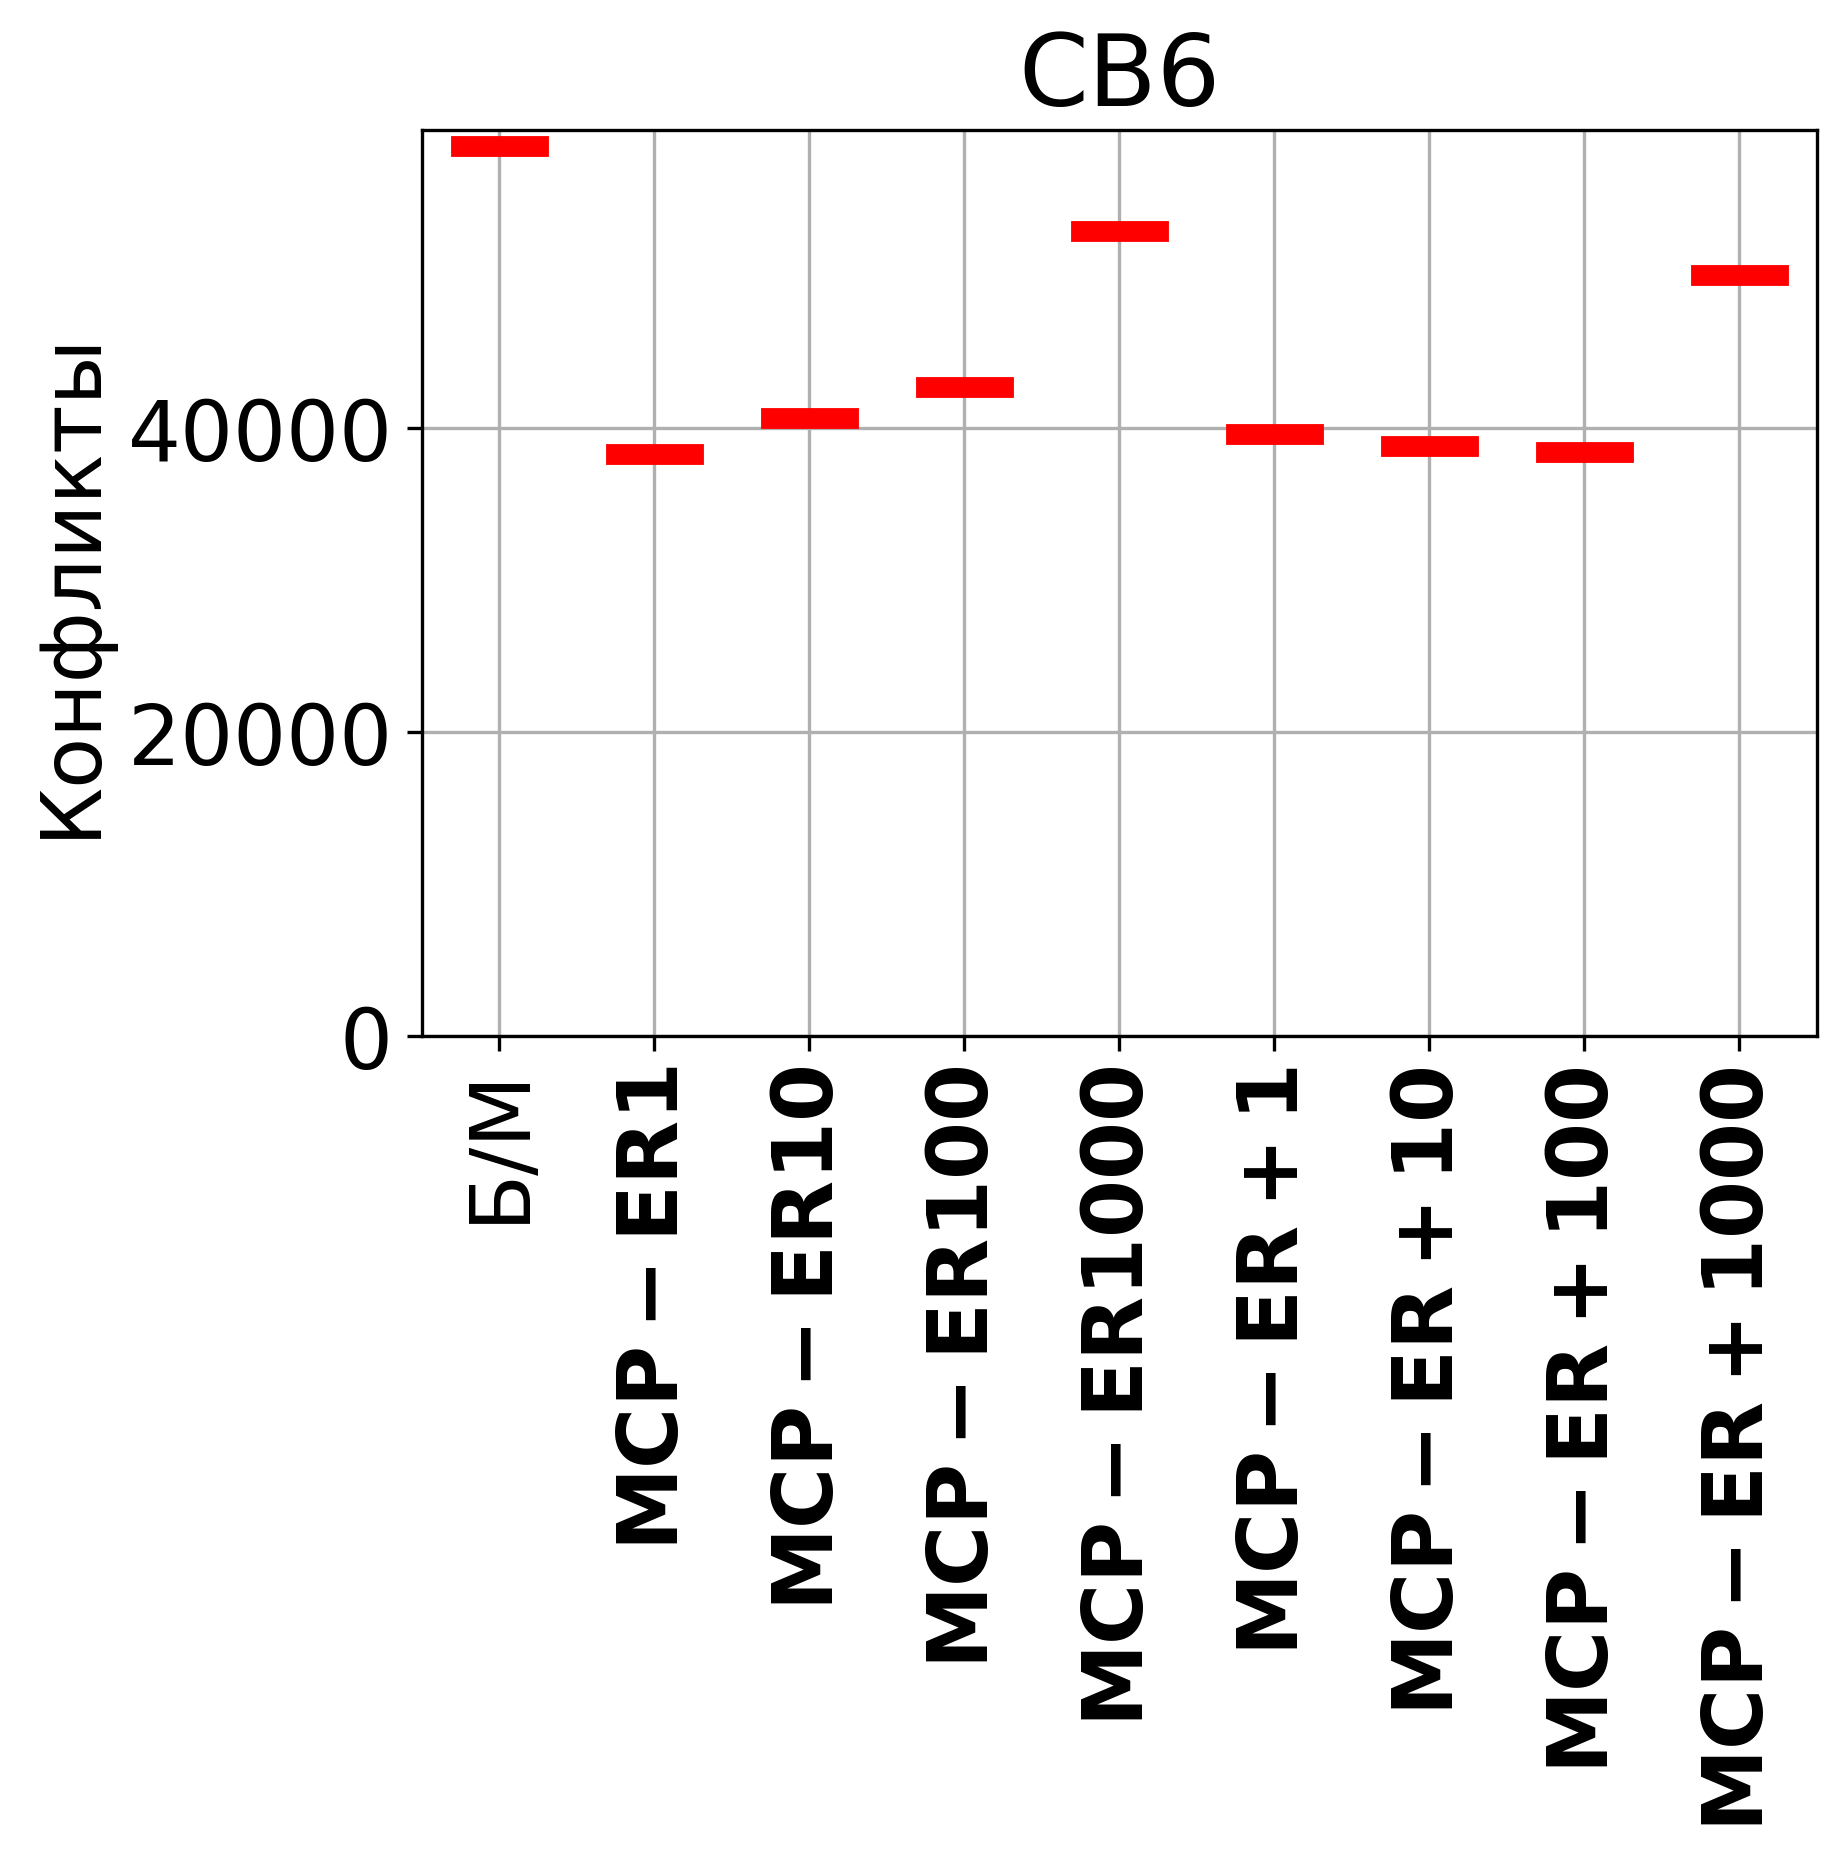

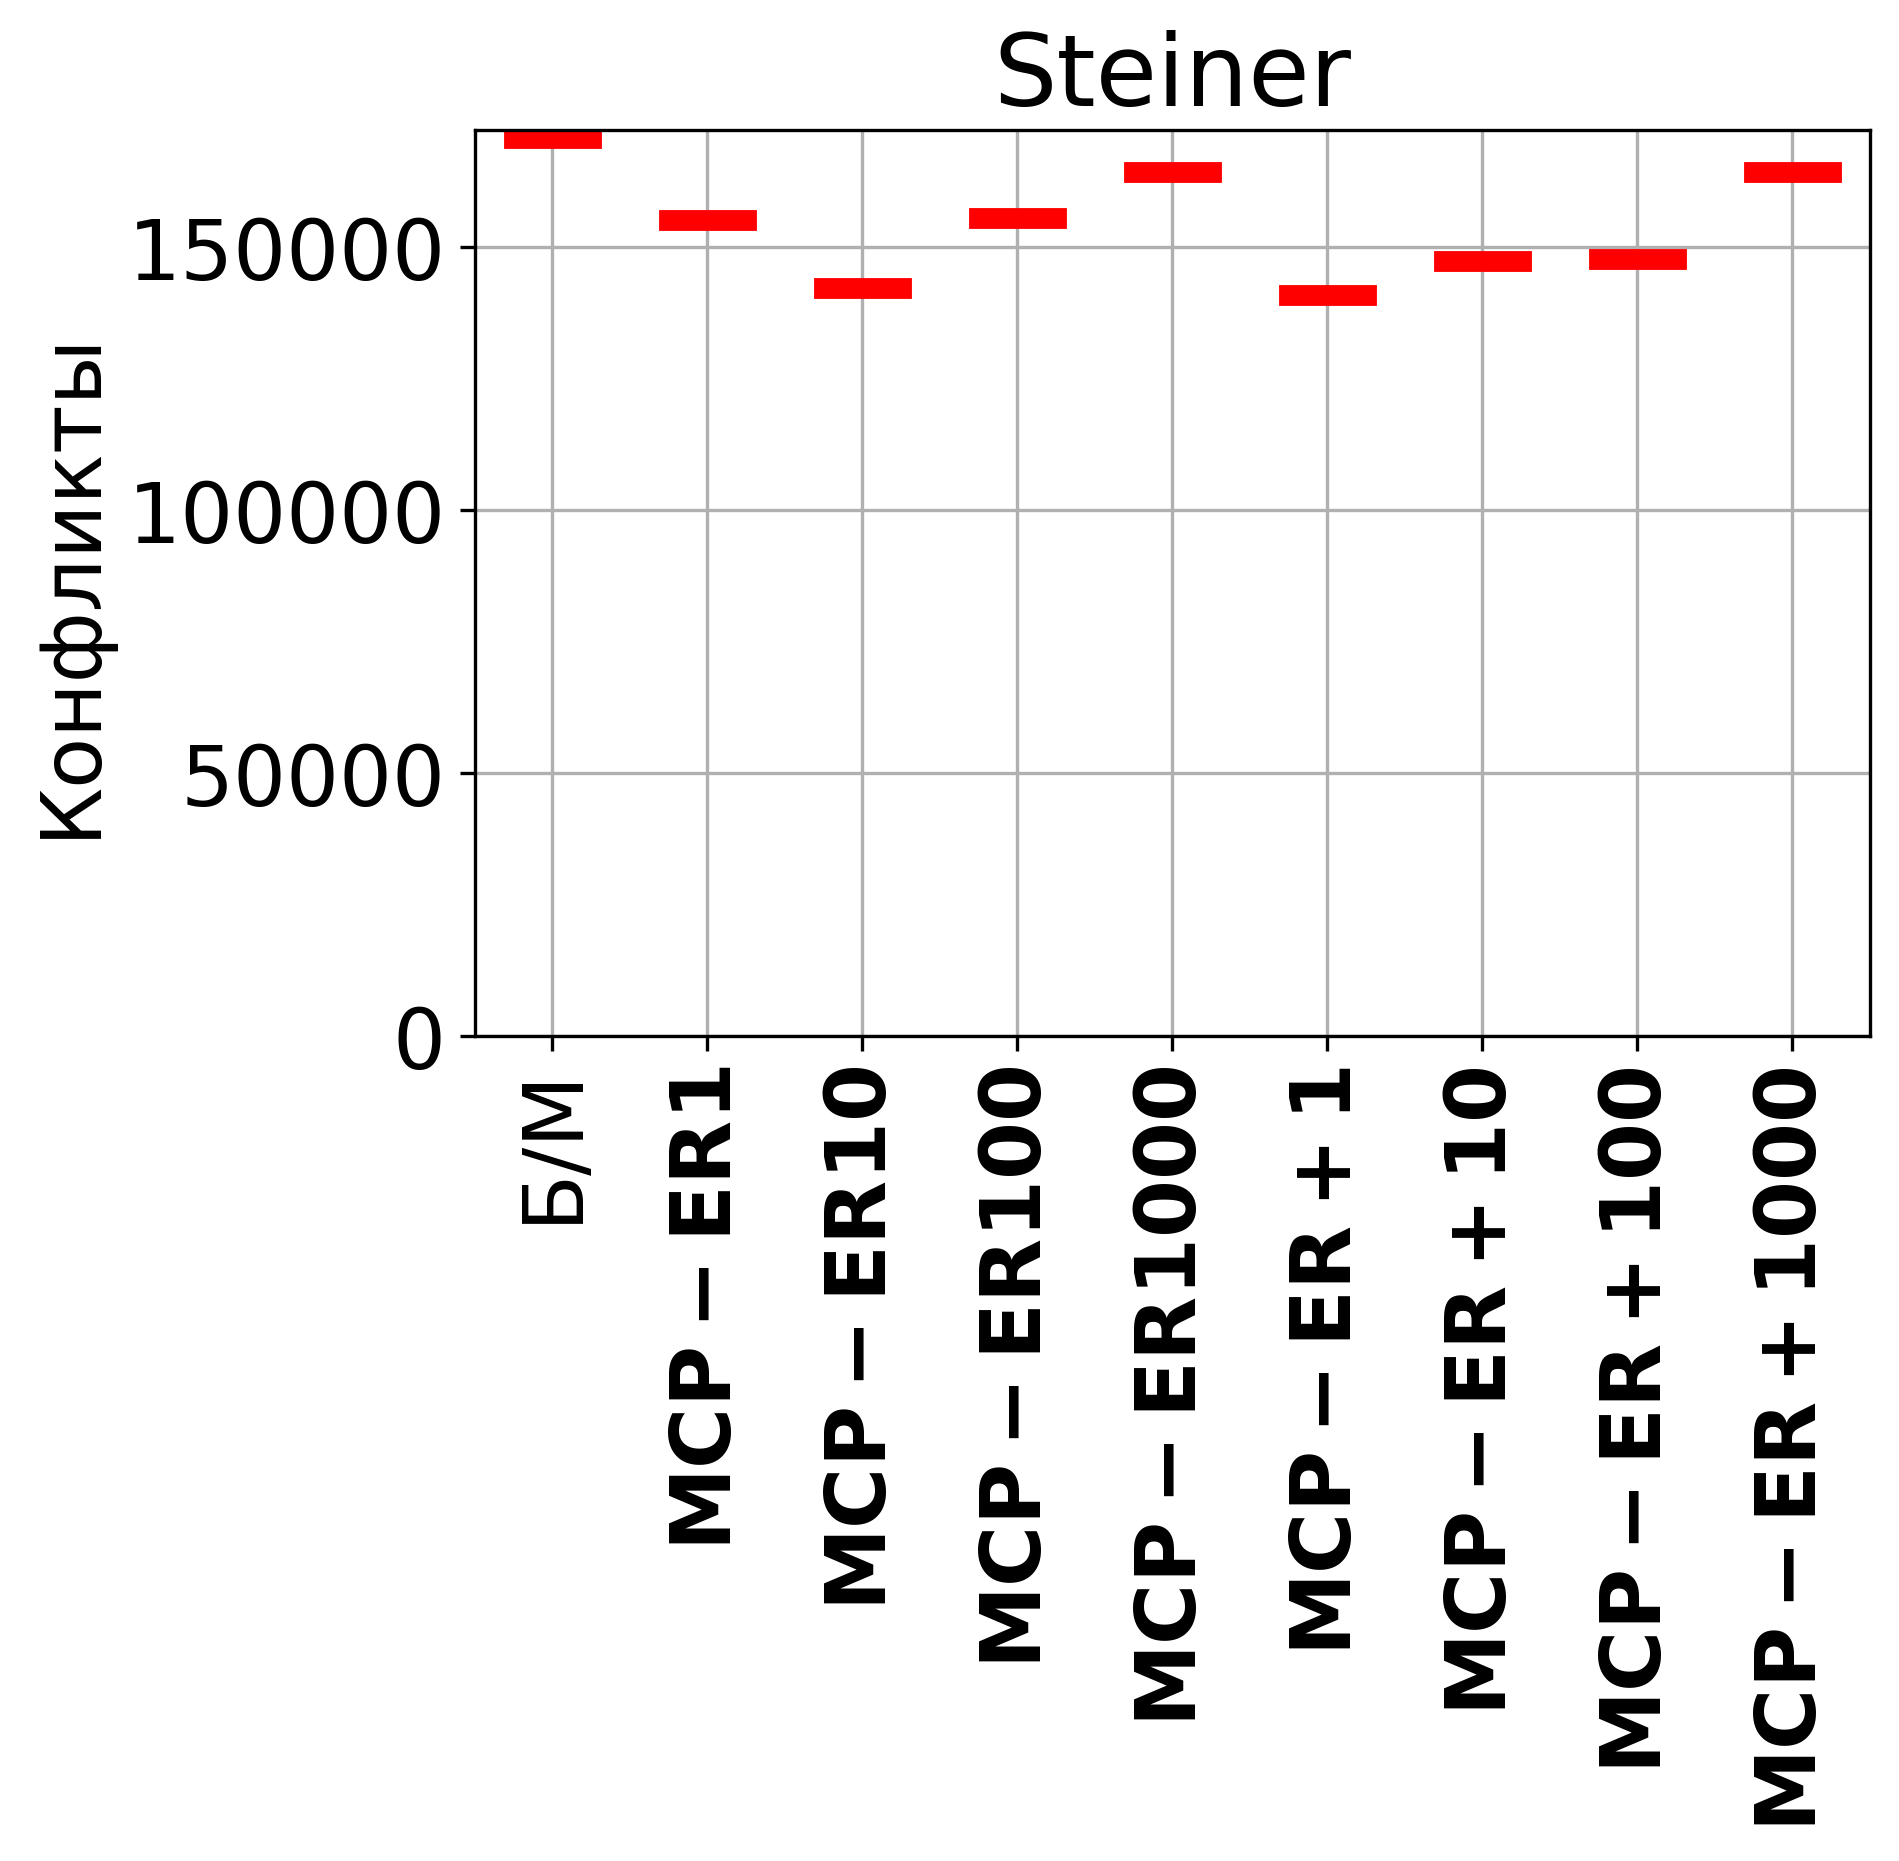

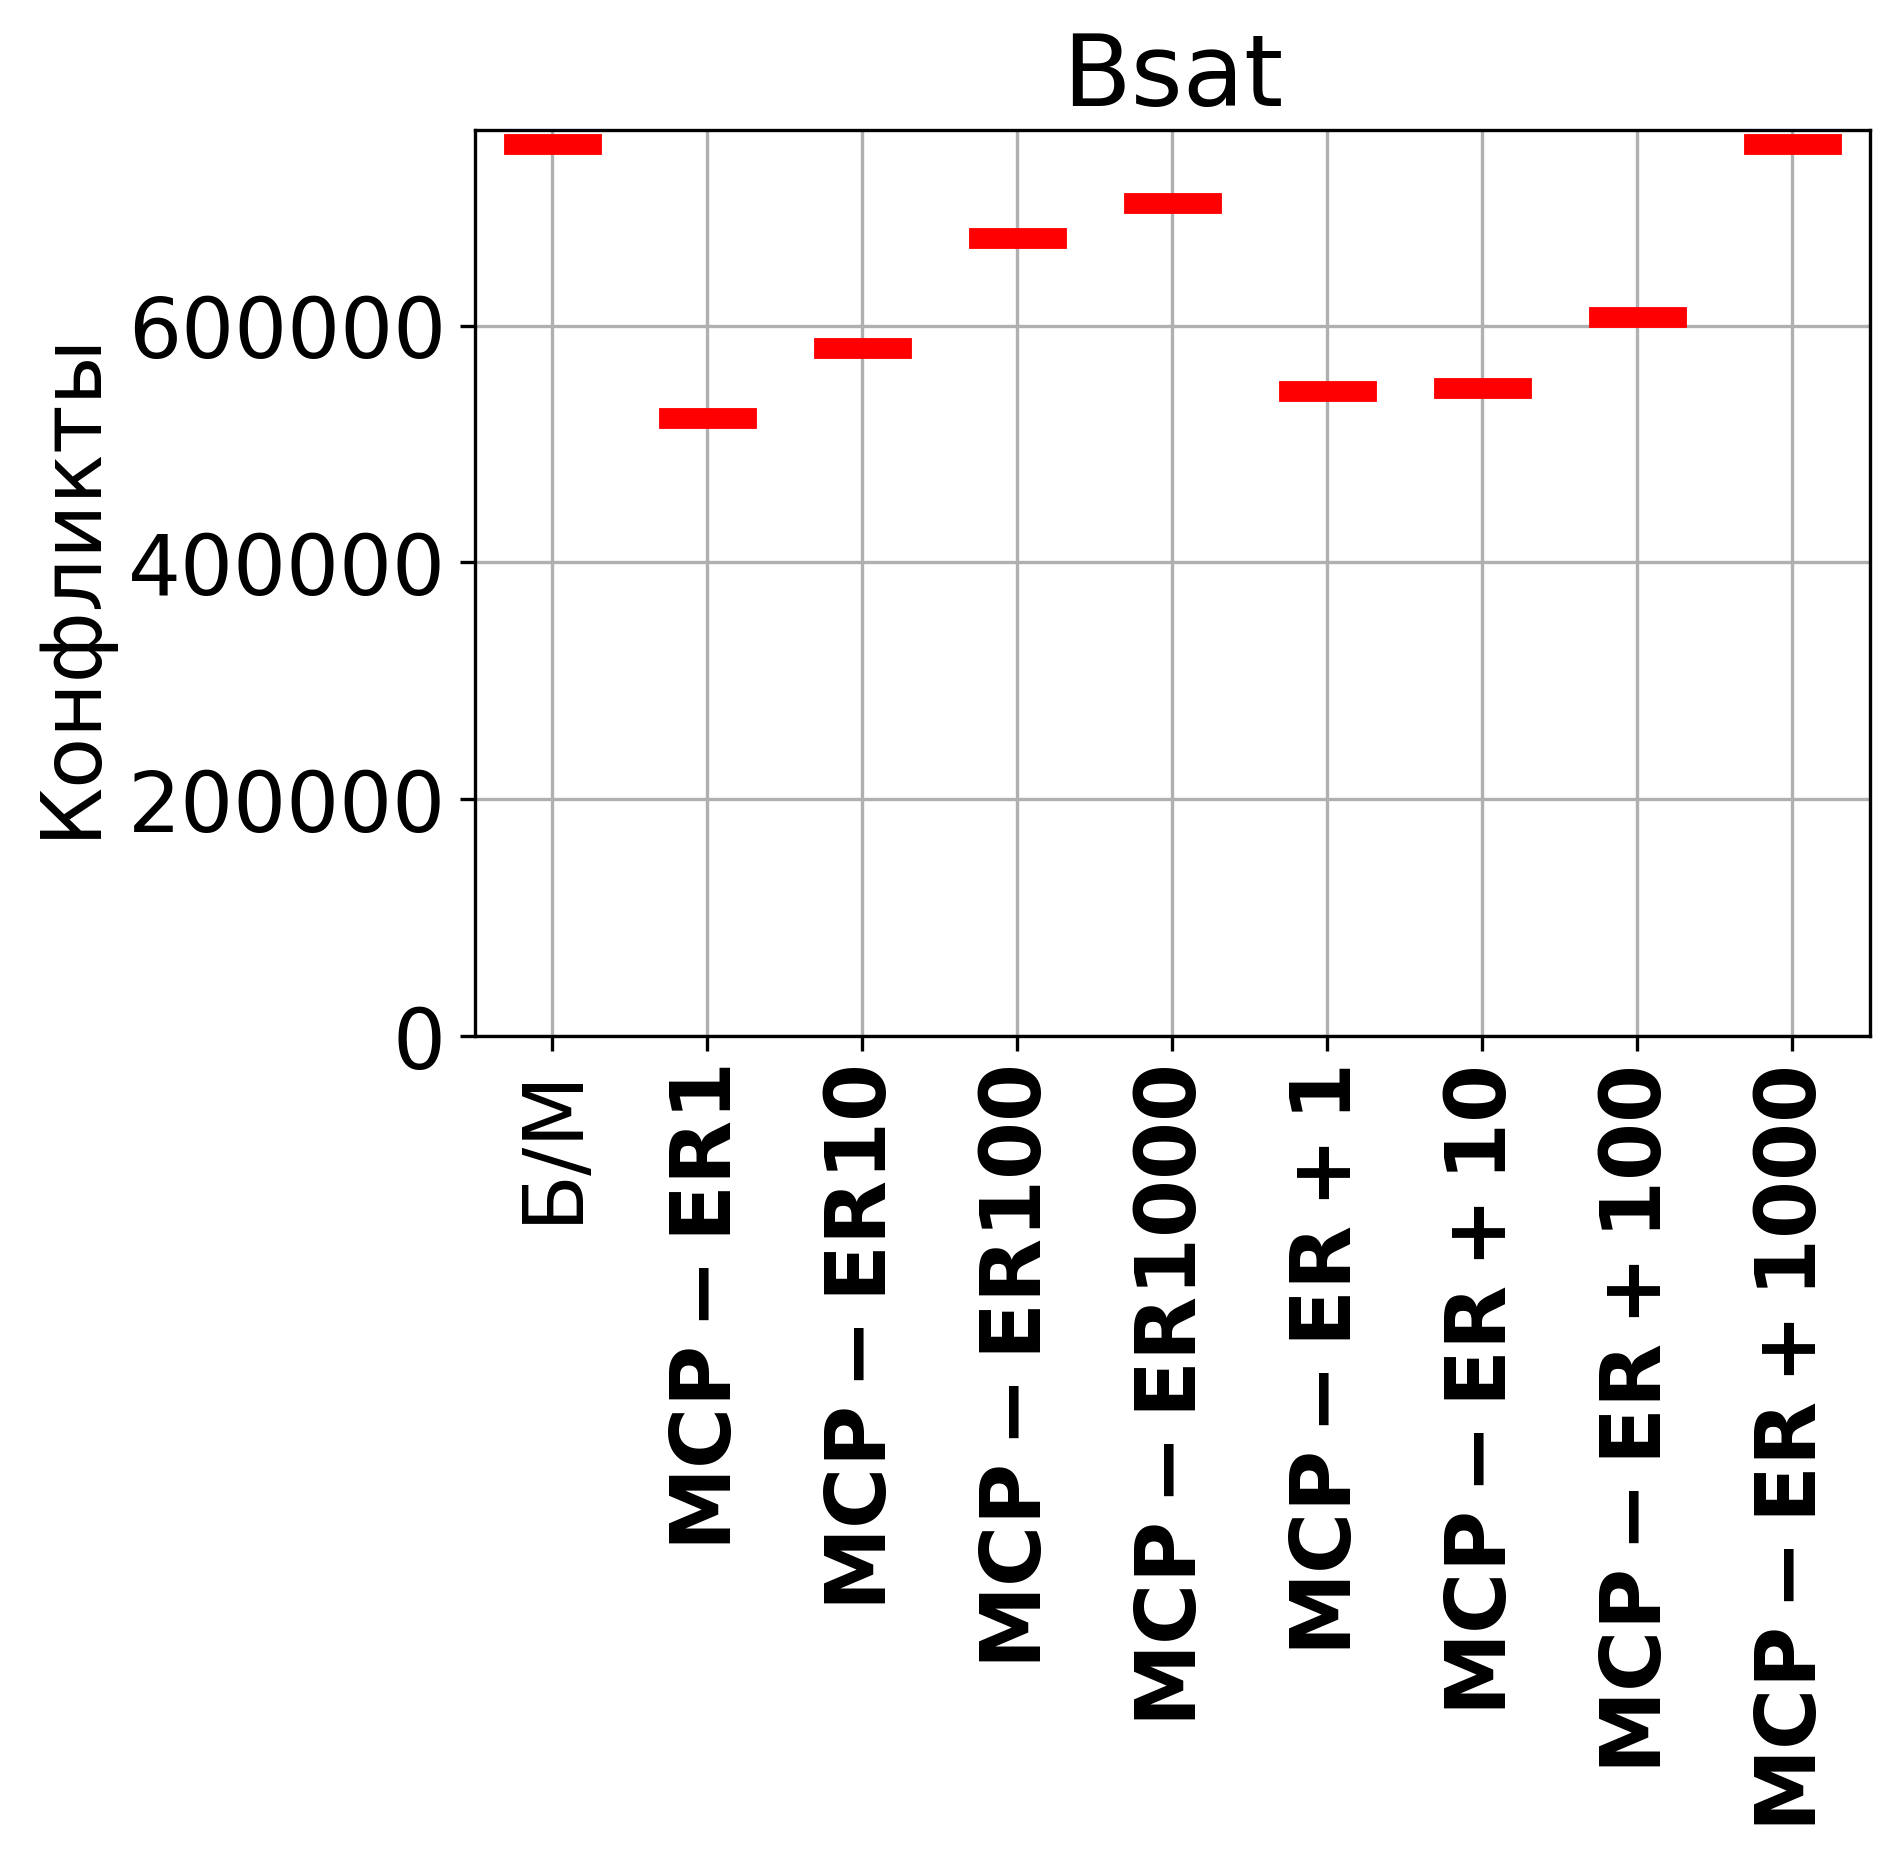

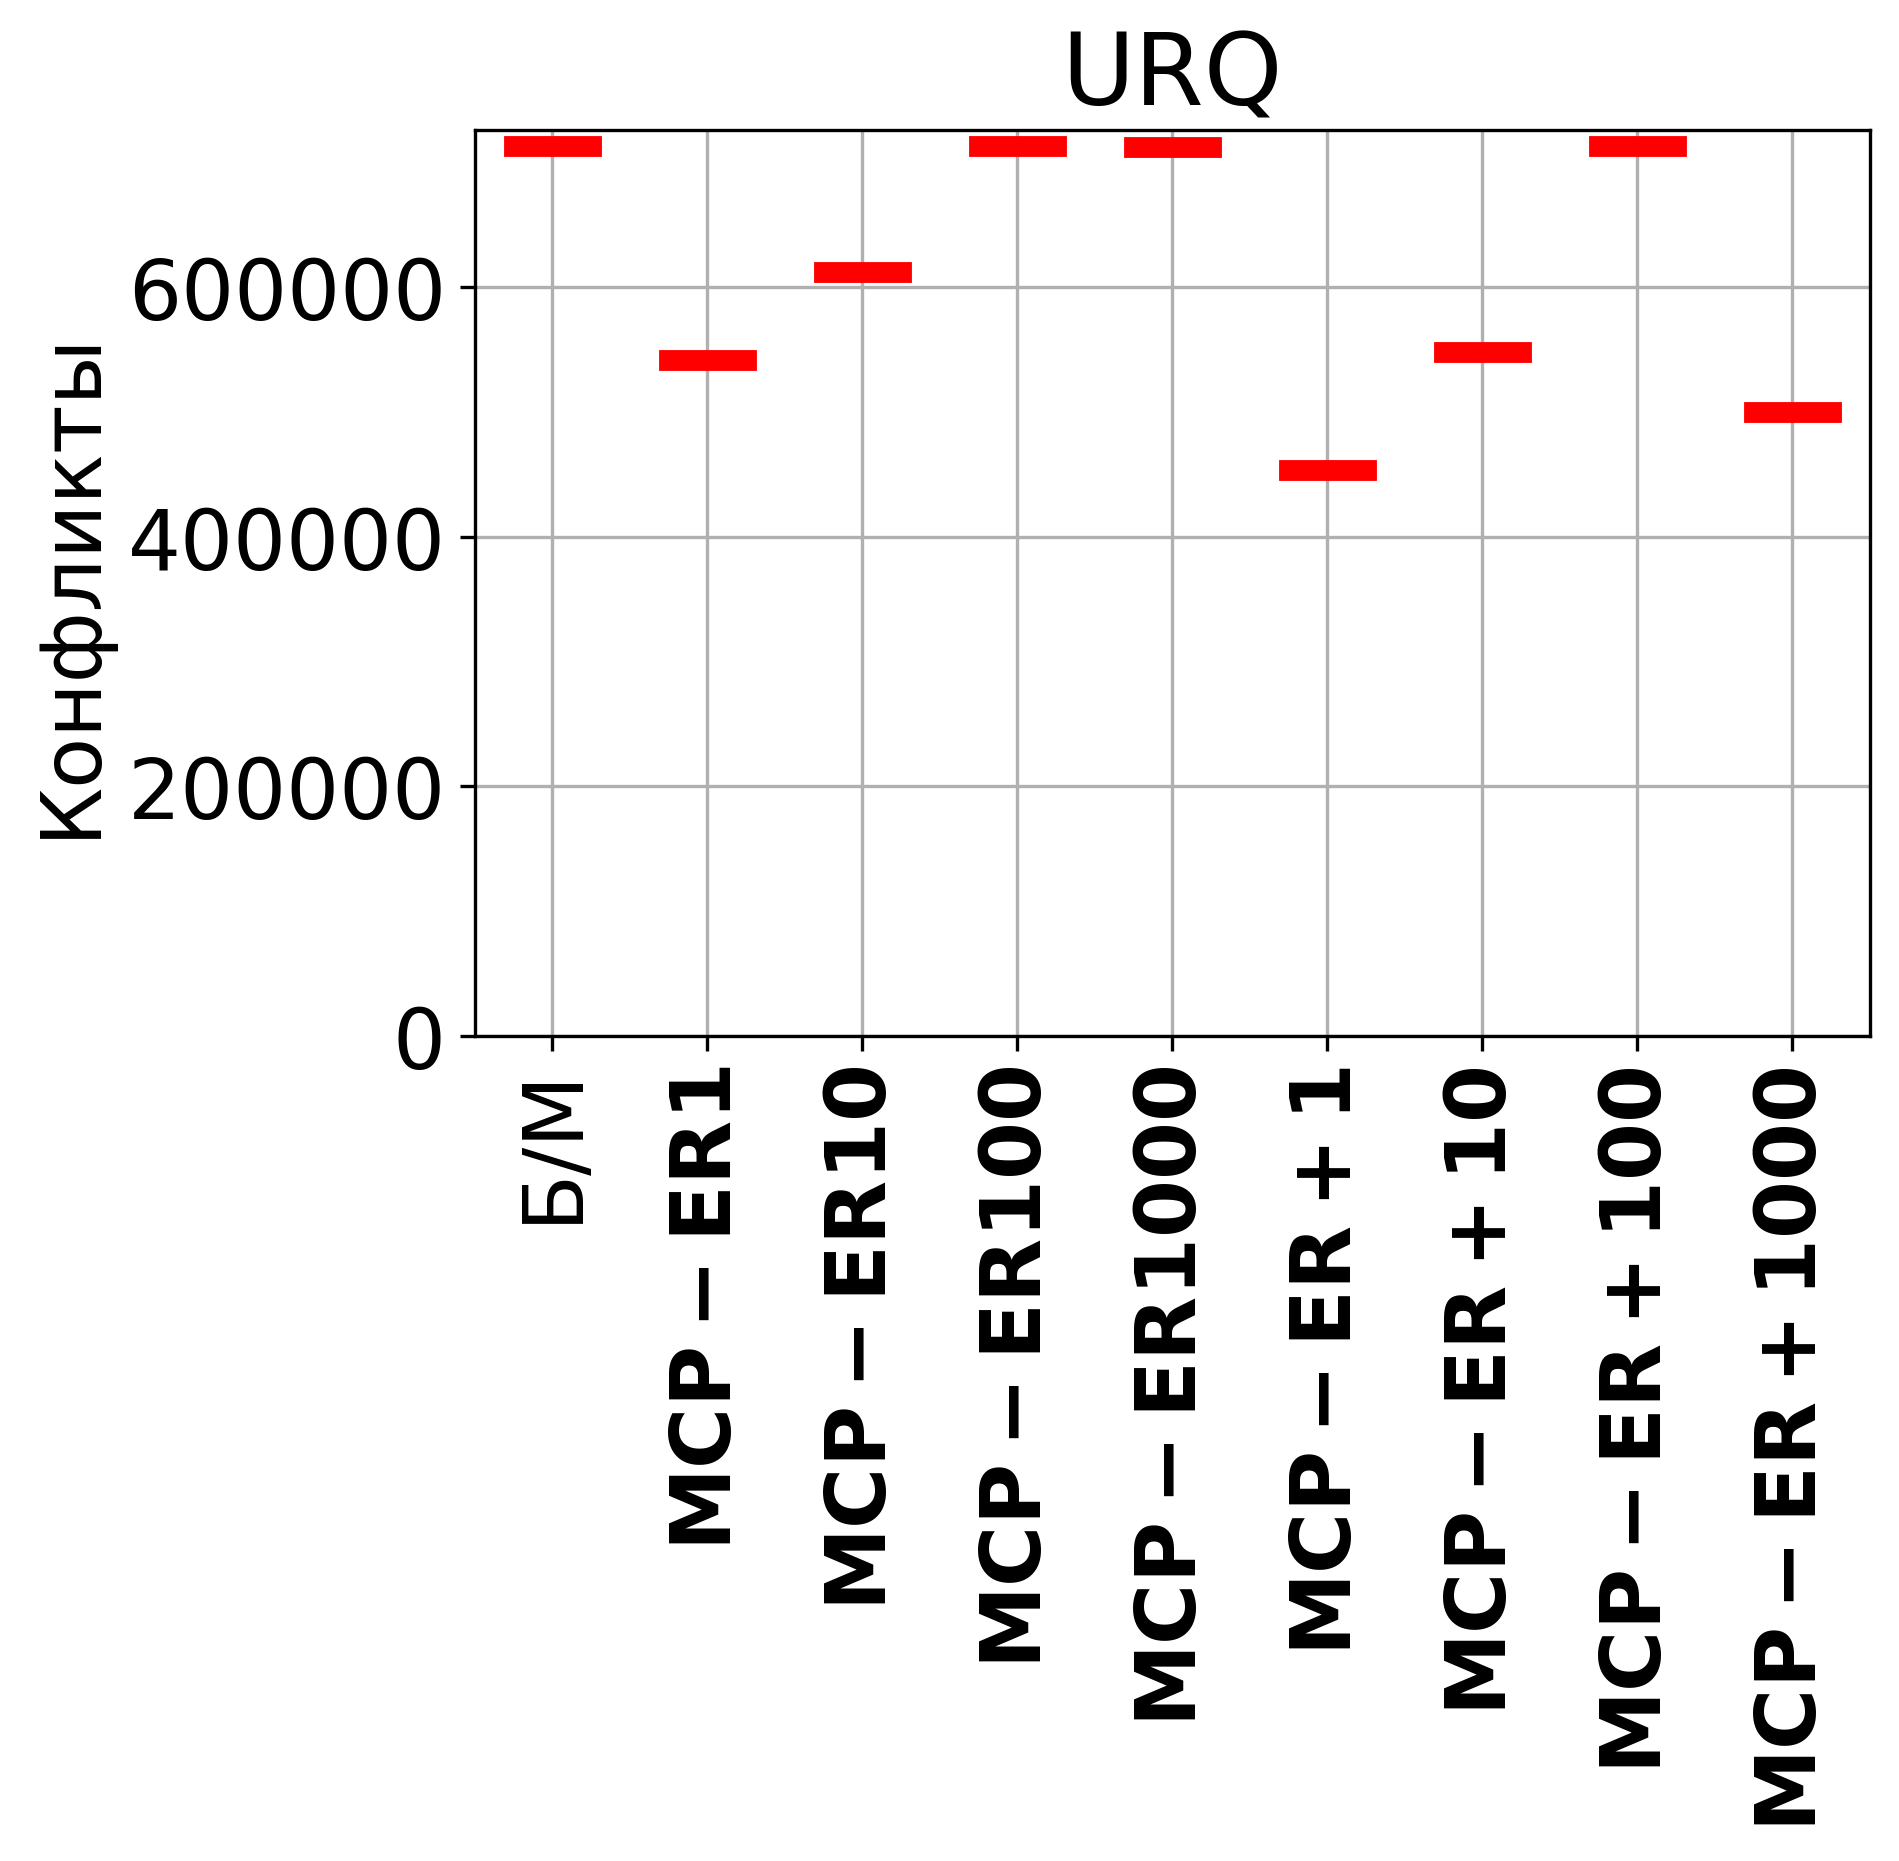

In [9]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  for experiment in filter(lambda x: benchmark in x['name'], baseline):
    data.append(experiment['json_agg'])
    names.append('Б/М')
  if benchmark == 'CB6':
    data.append([58581])
    names.append('Б/М')
  if benchmark == 'URQ':
    data.append([712708])
    names.append('Б/М')
  for experiment in filter(lambda x: benchmark in x['name'] and 'MCP-ER' in x['name'], experimentResults):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1] + '   ' + experiment['name'].split(' ')[2] 
    names.append(r'$\mathbf{' + optimizer + '}$')

  plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.xticks([i for i in range(1, len(names) + 1)], names, rotation=90)
  plt.ylabel('Конфликты')
  plt.grid()
  plt.title(benchmark)
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()

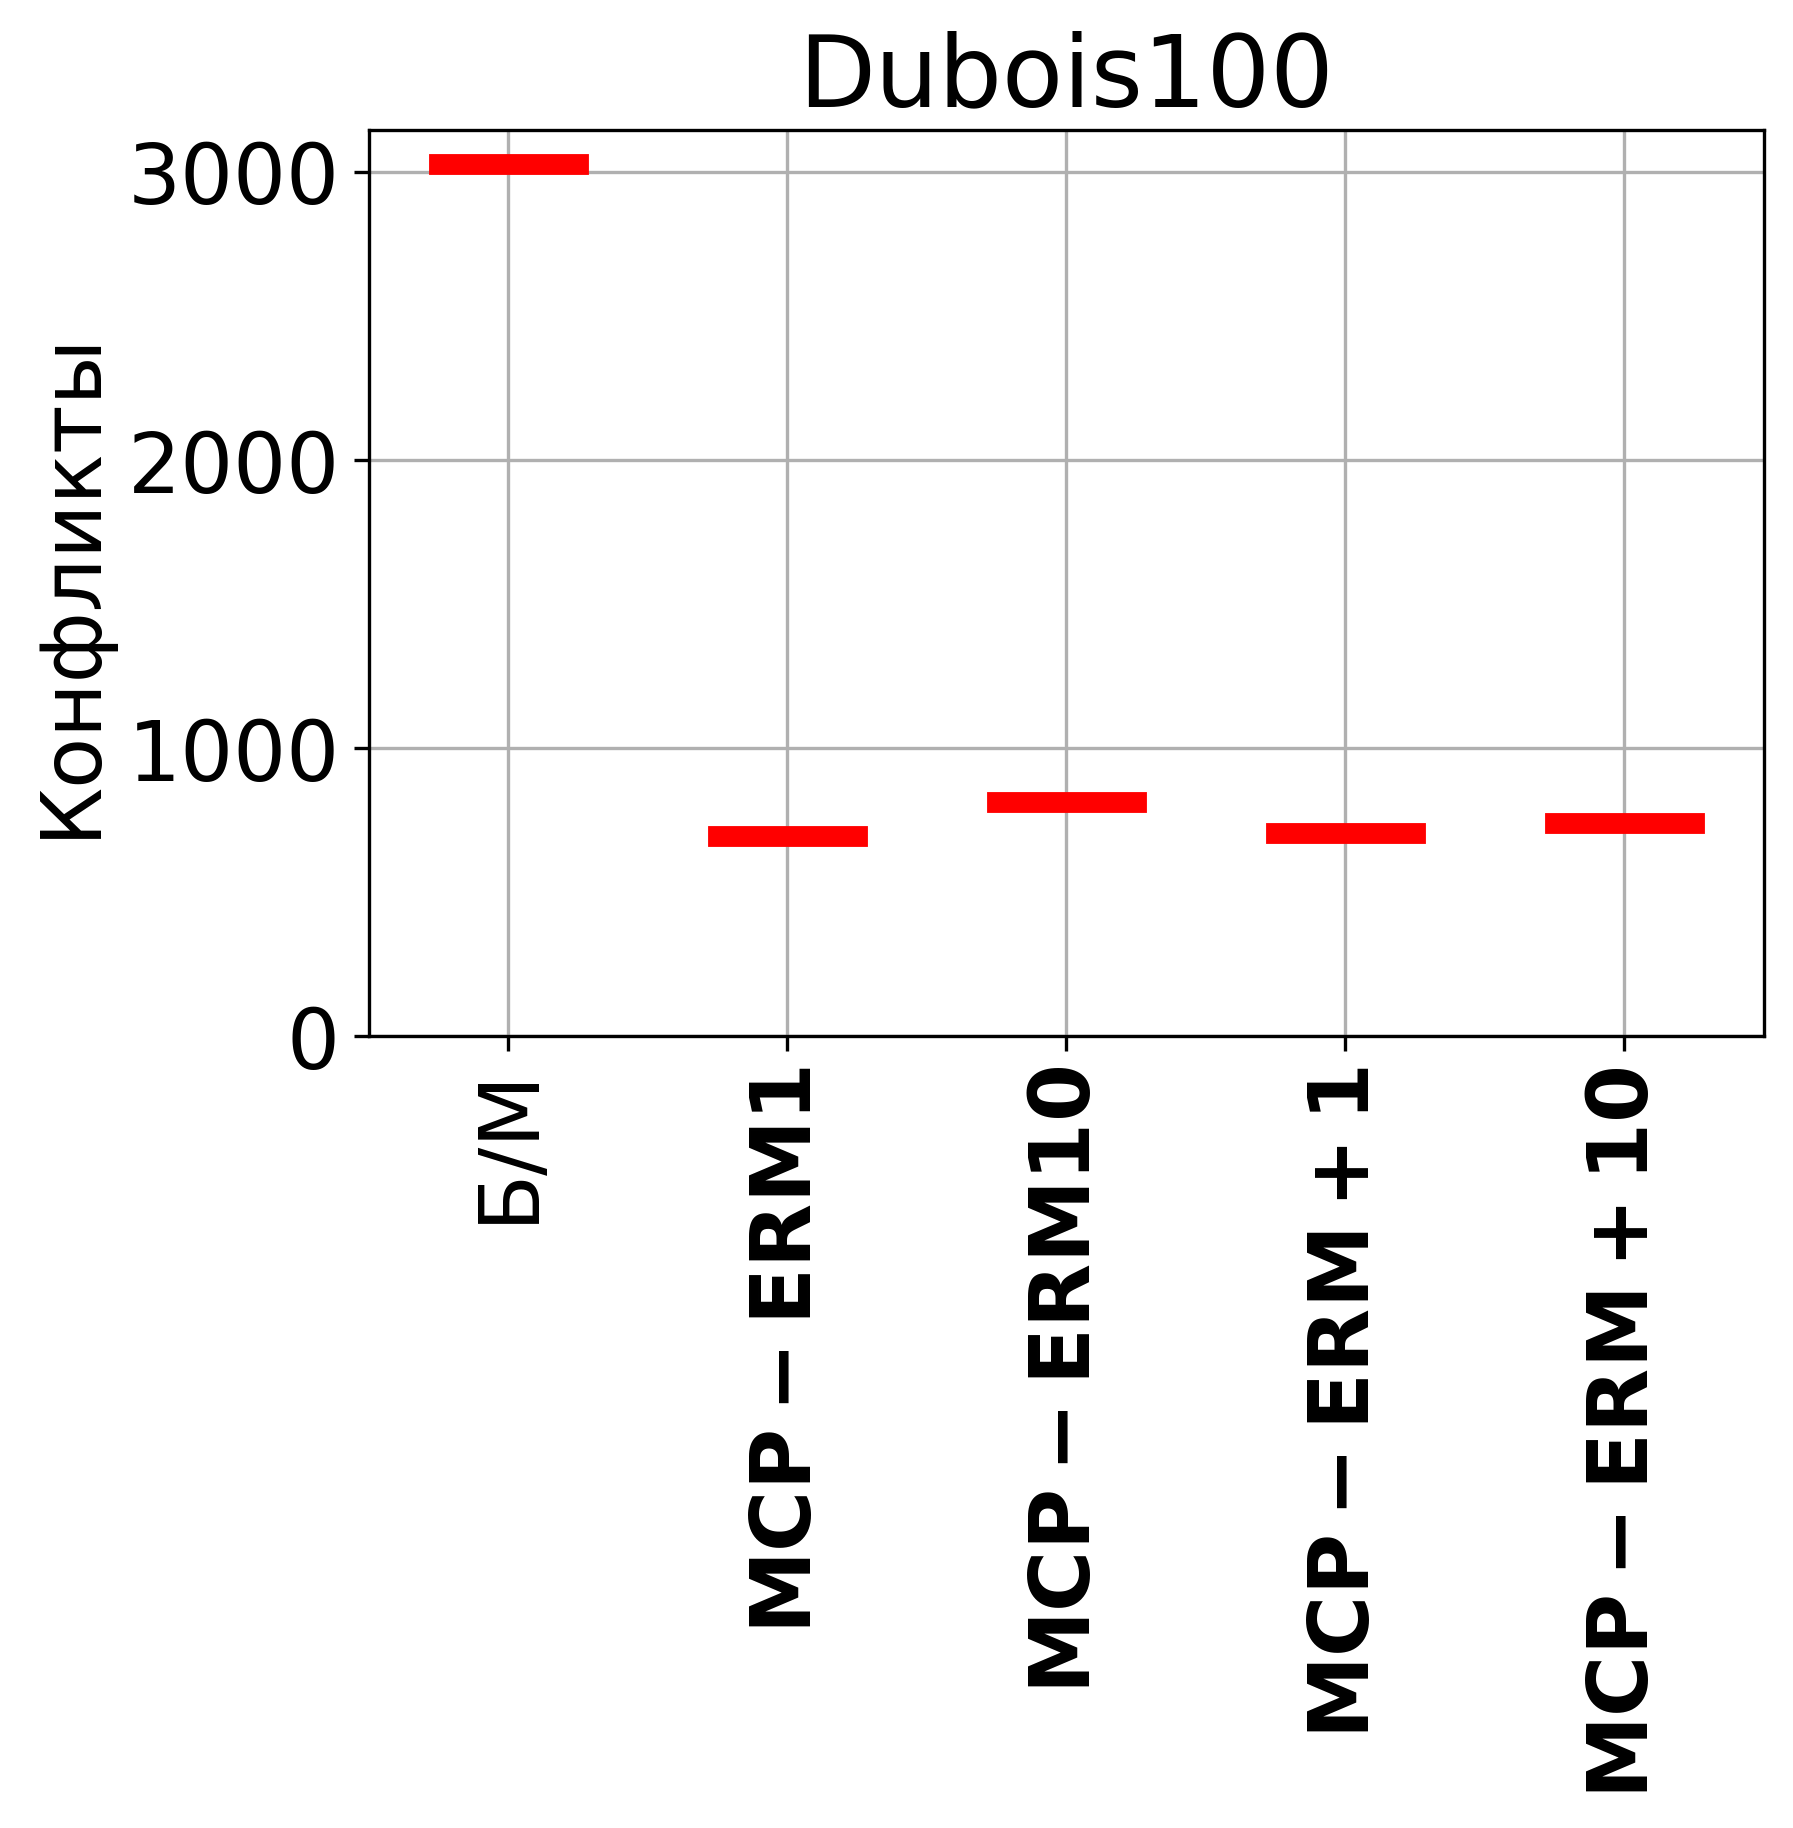

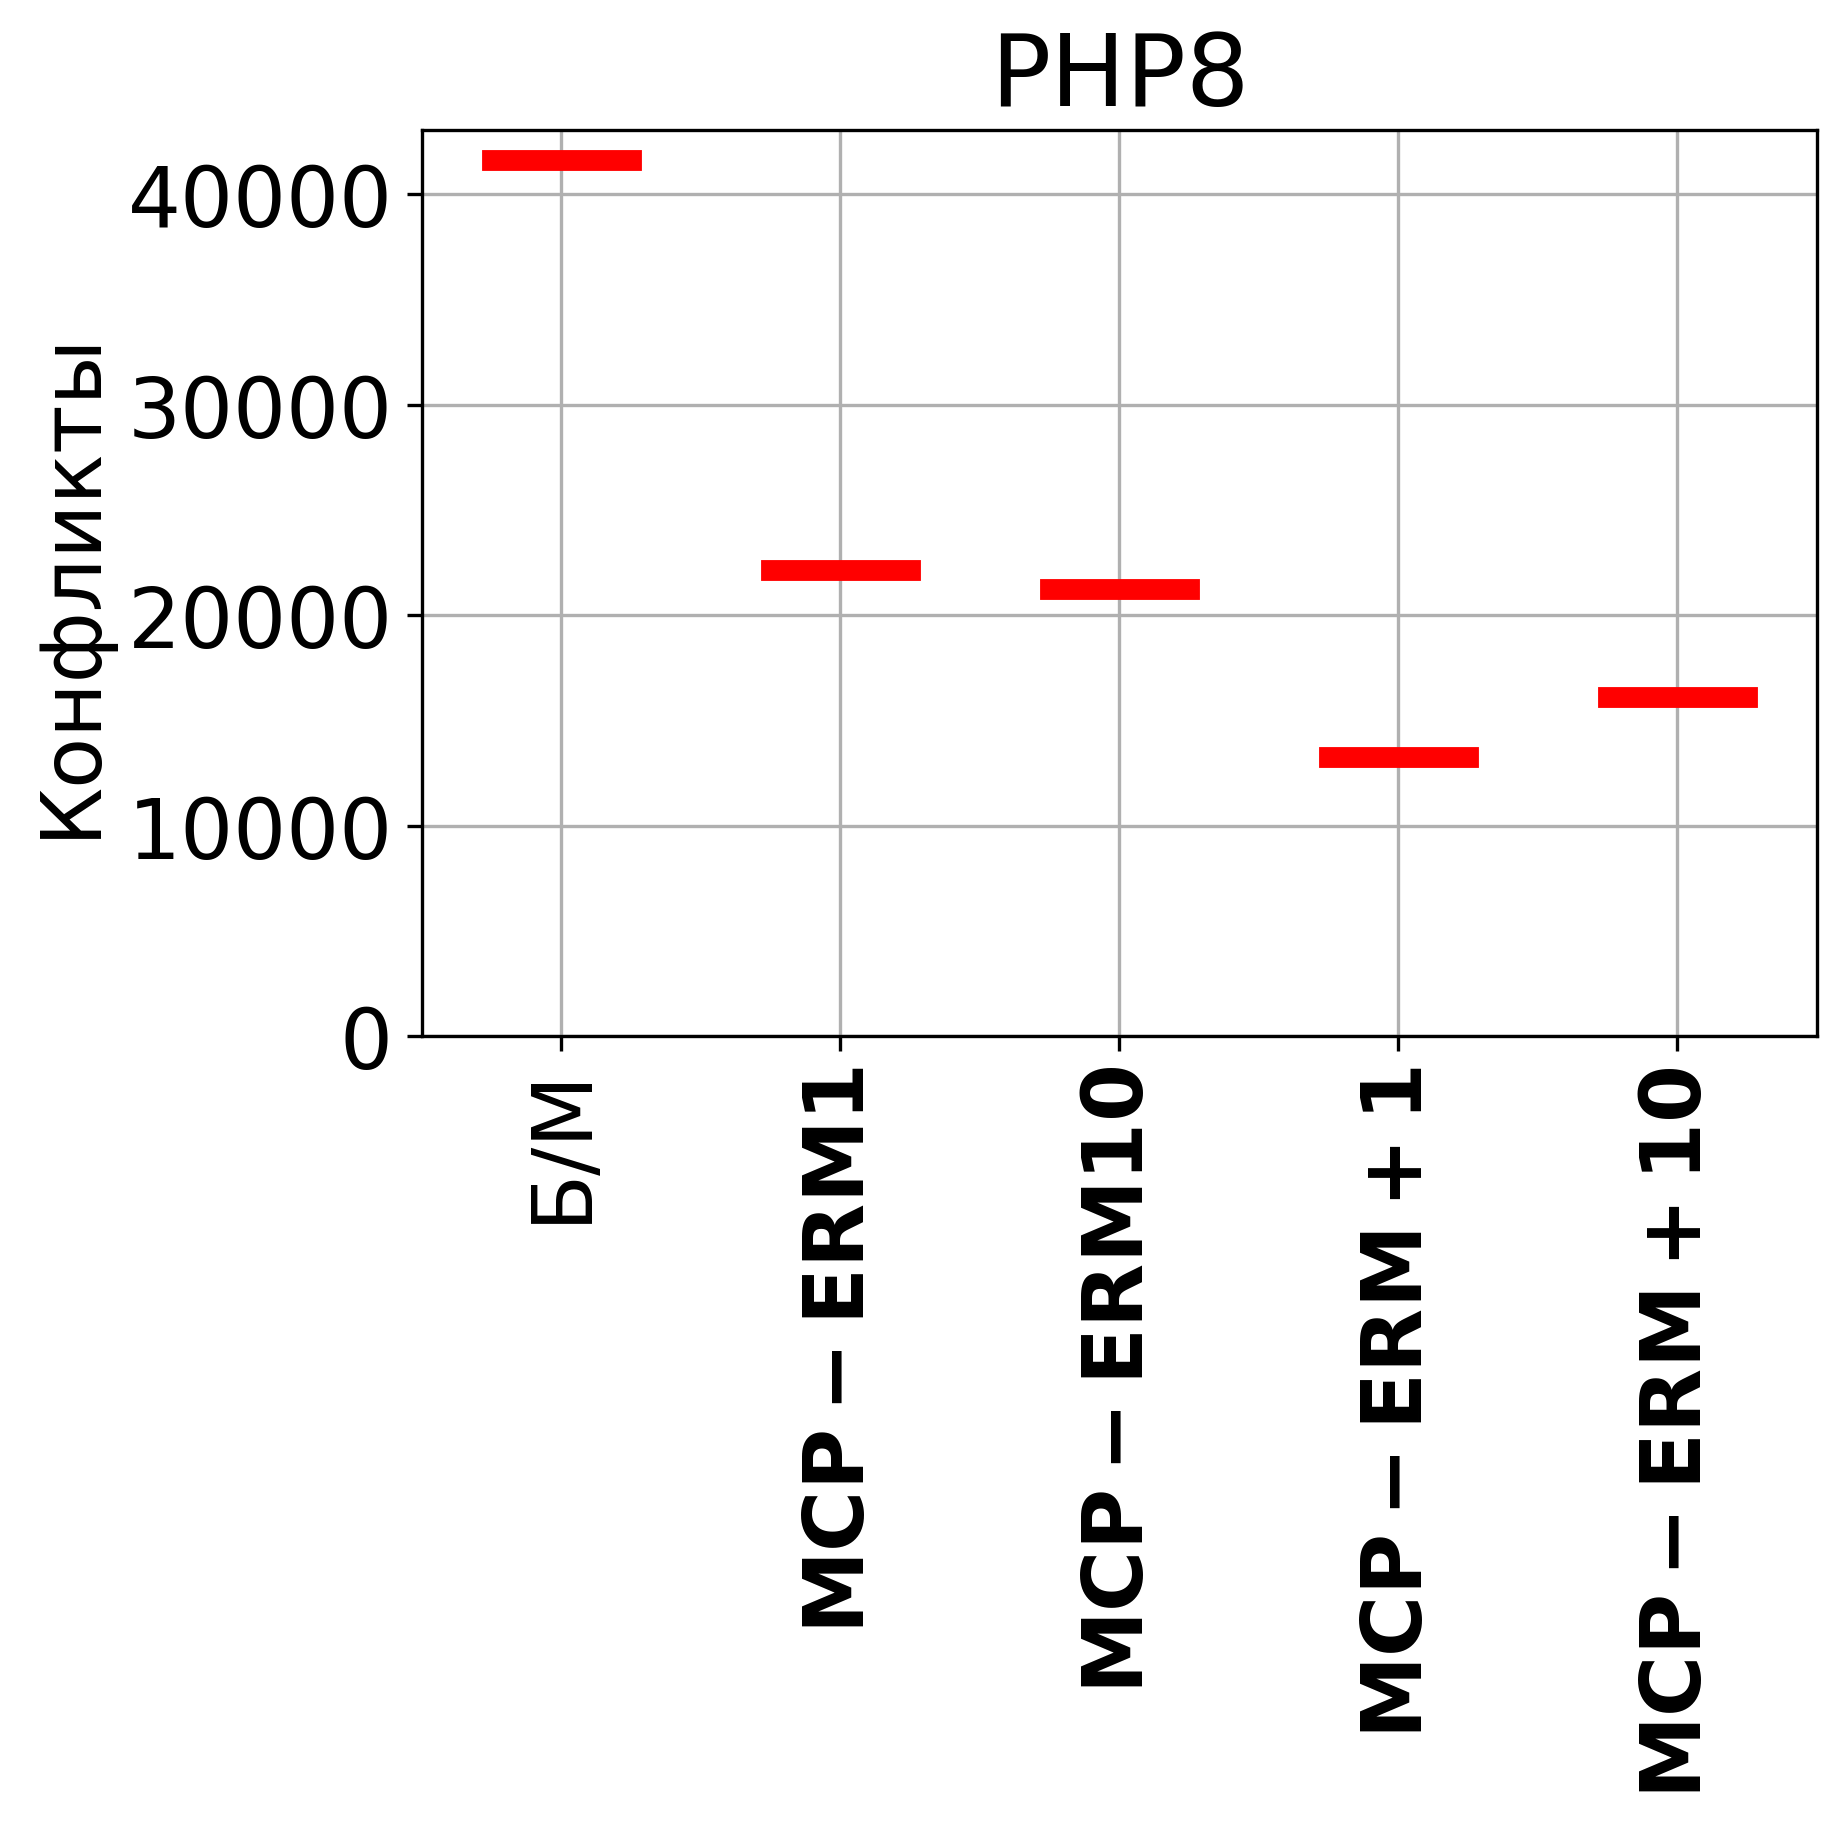

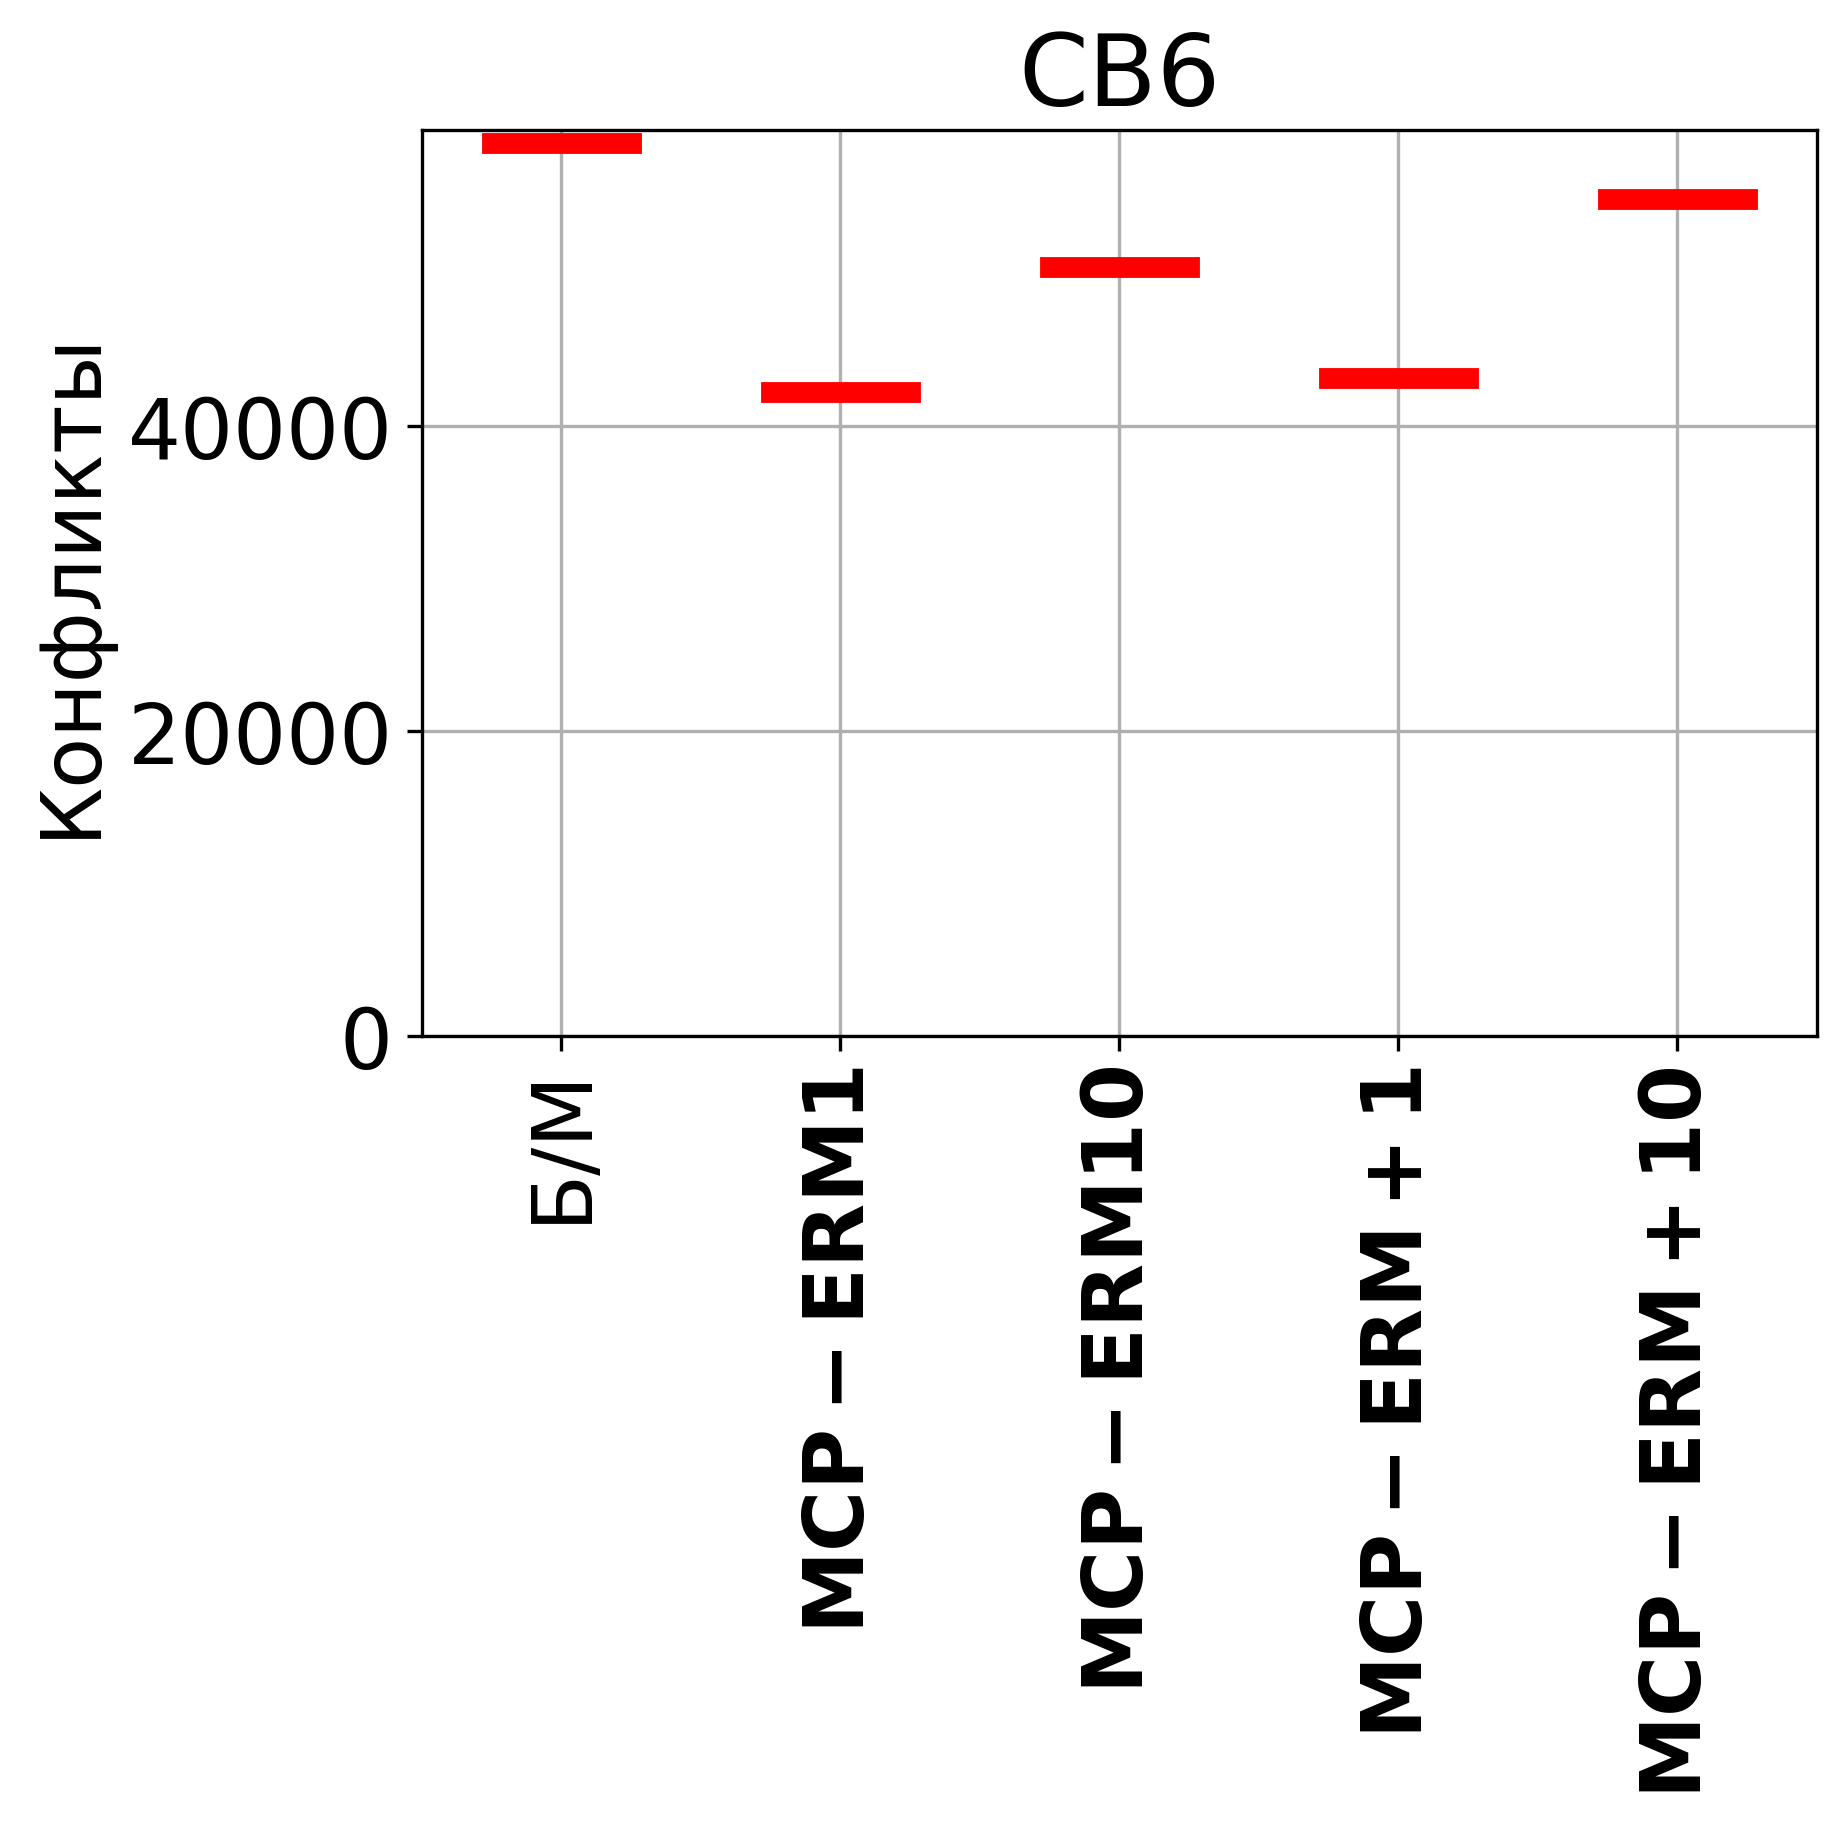

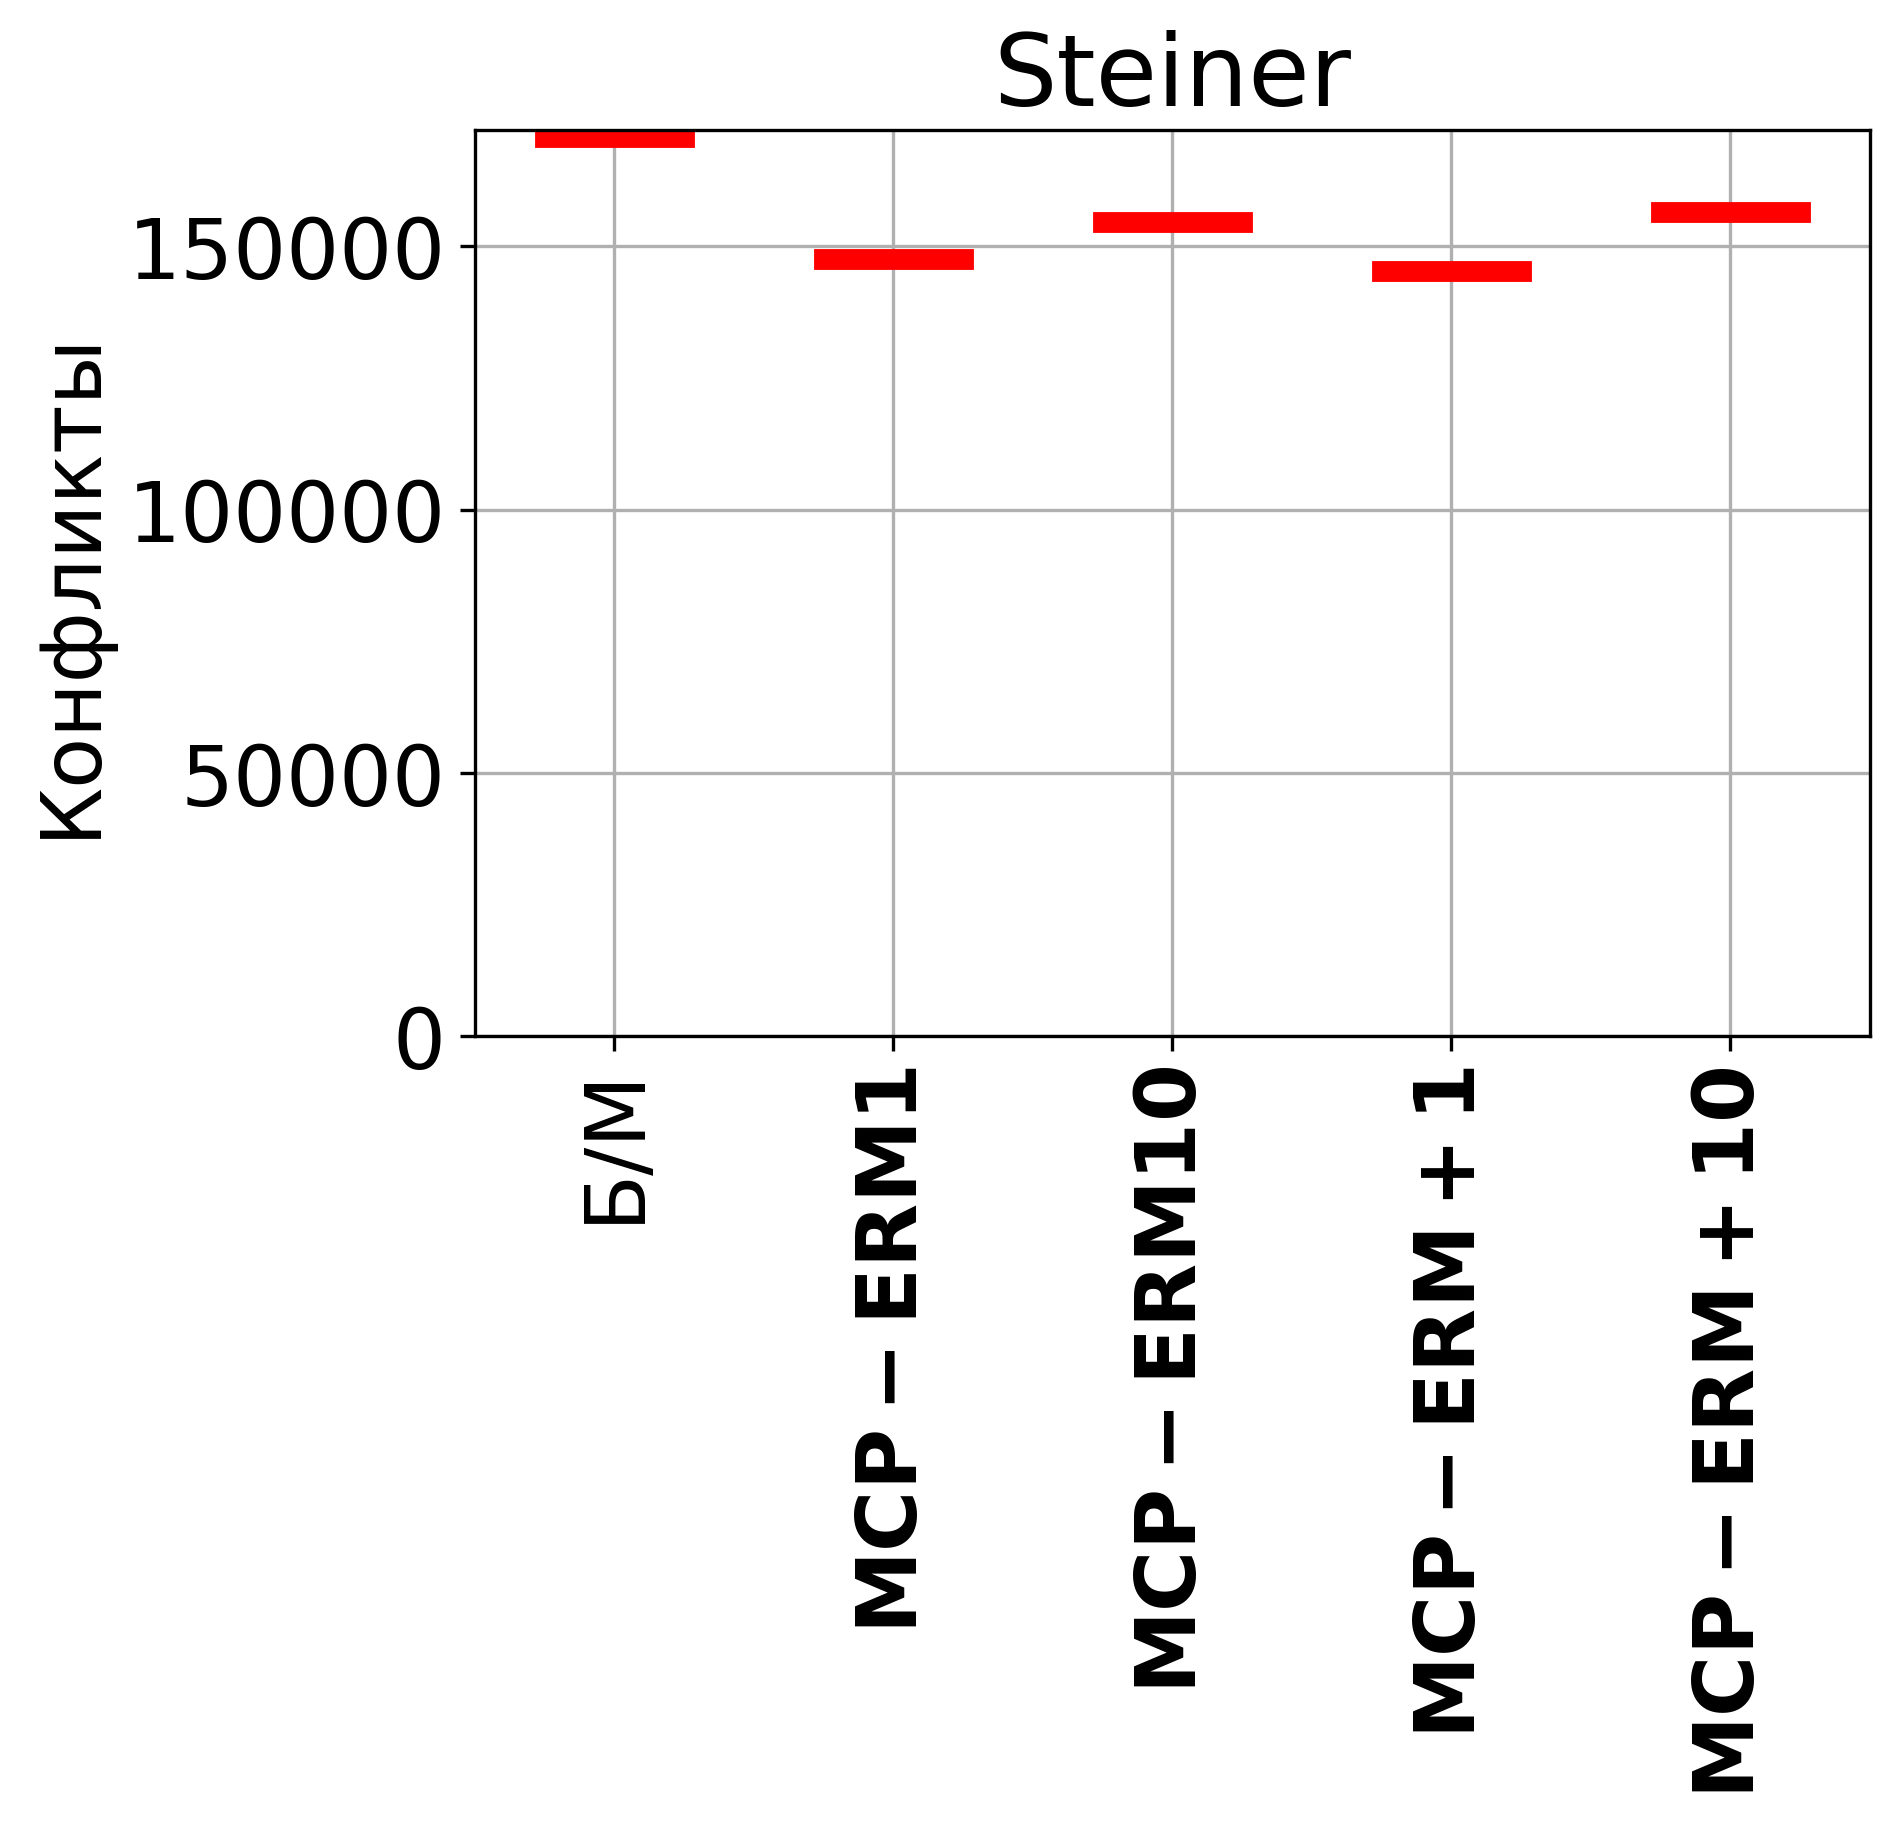

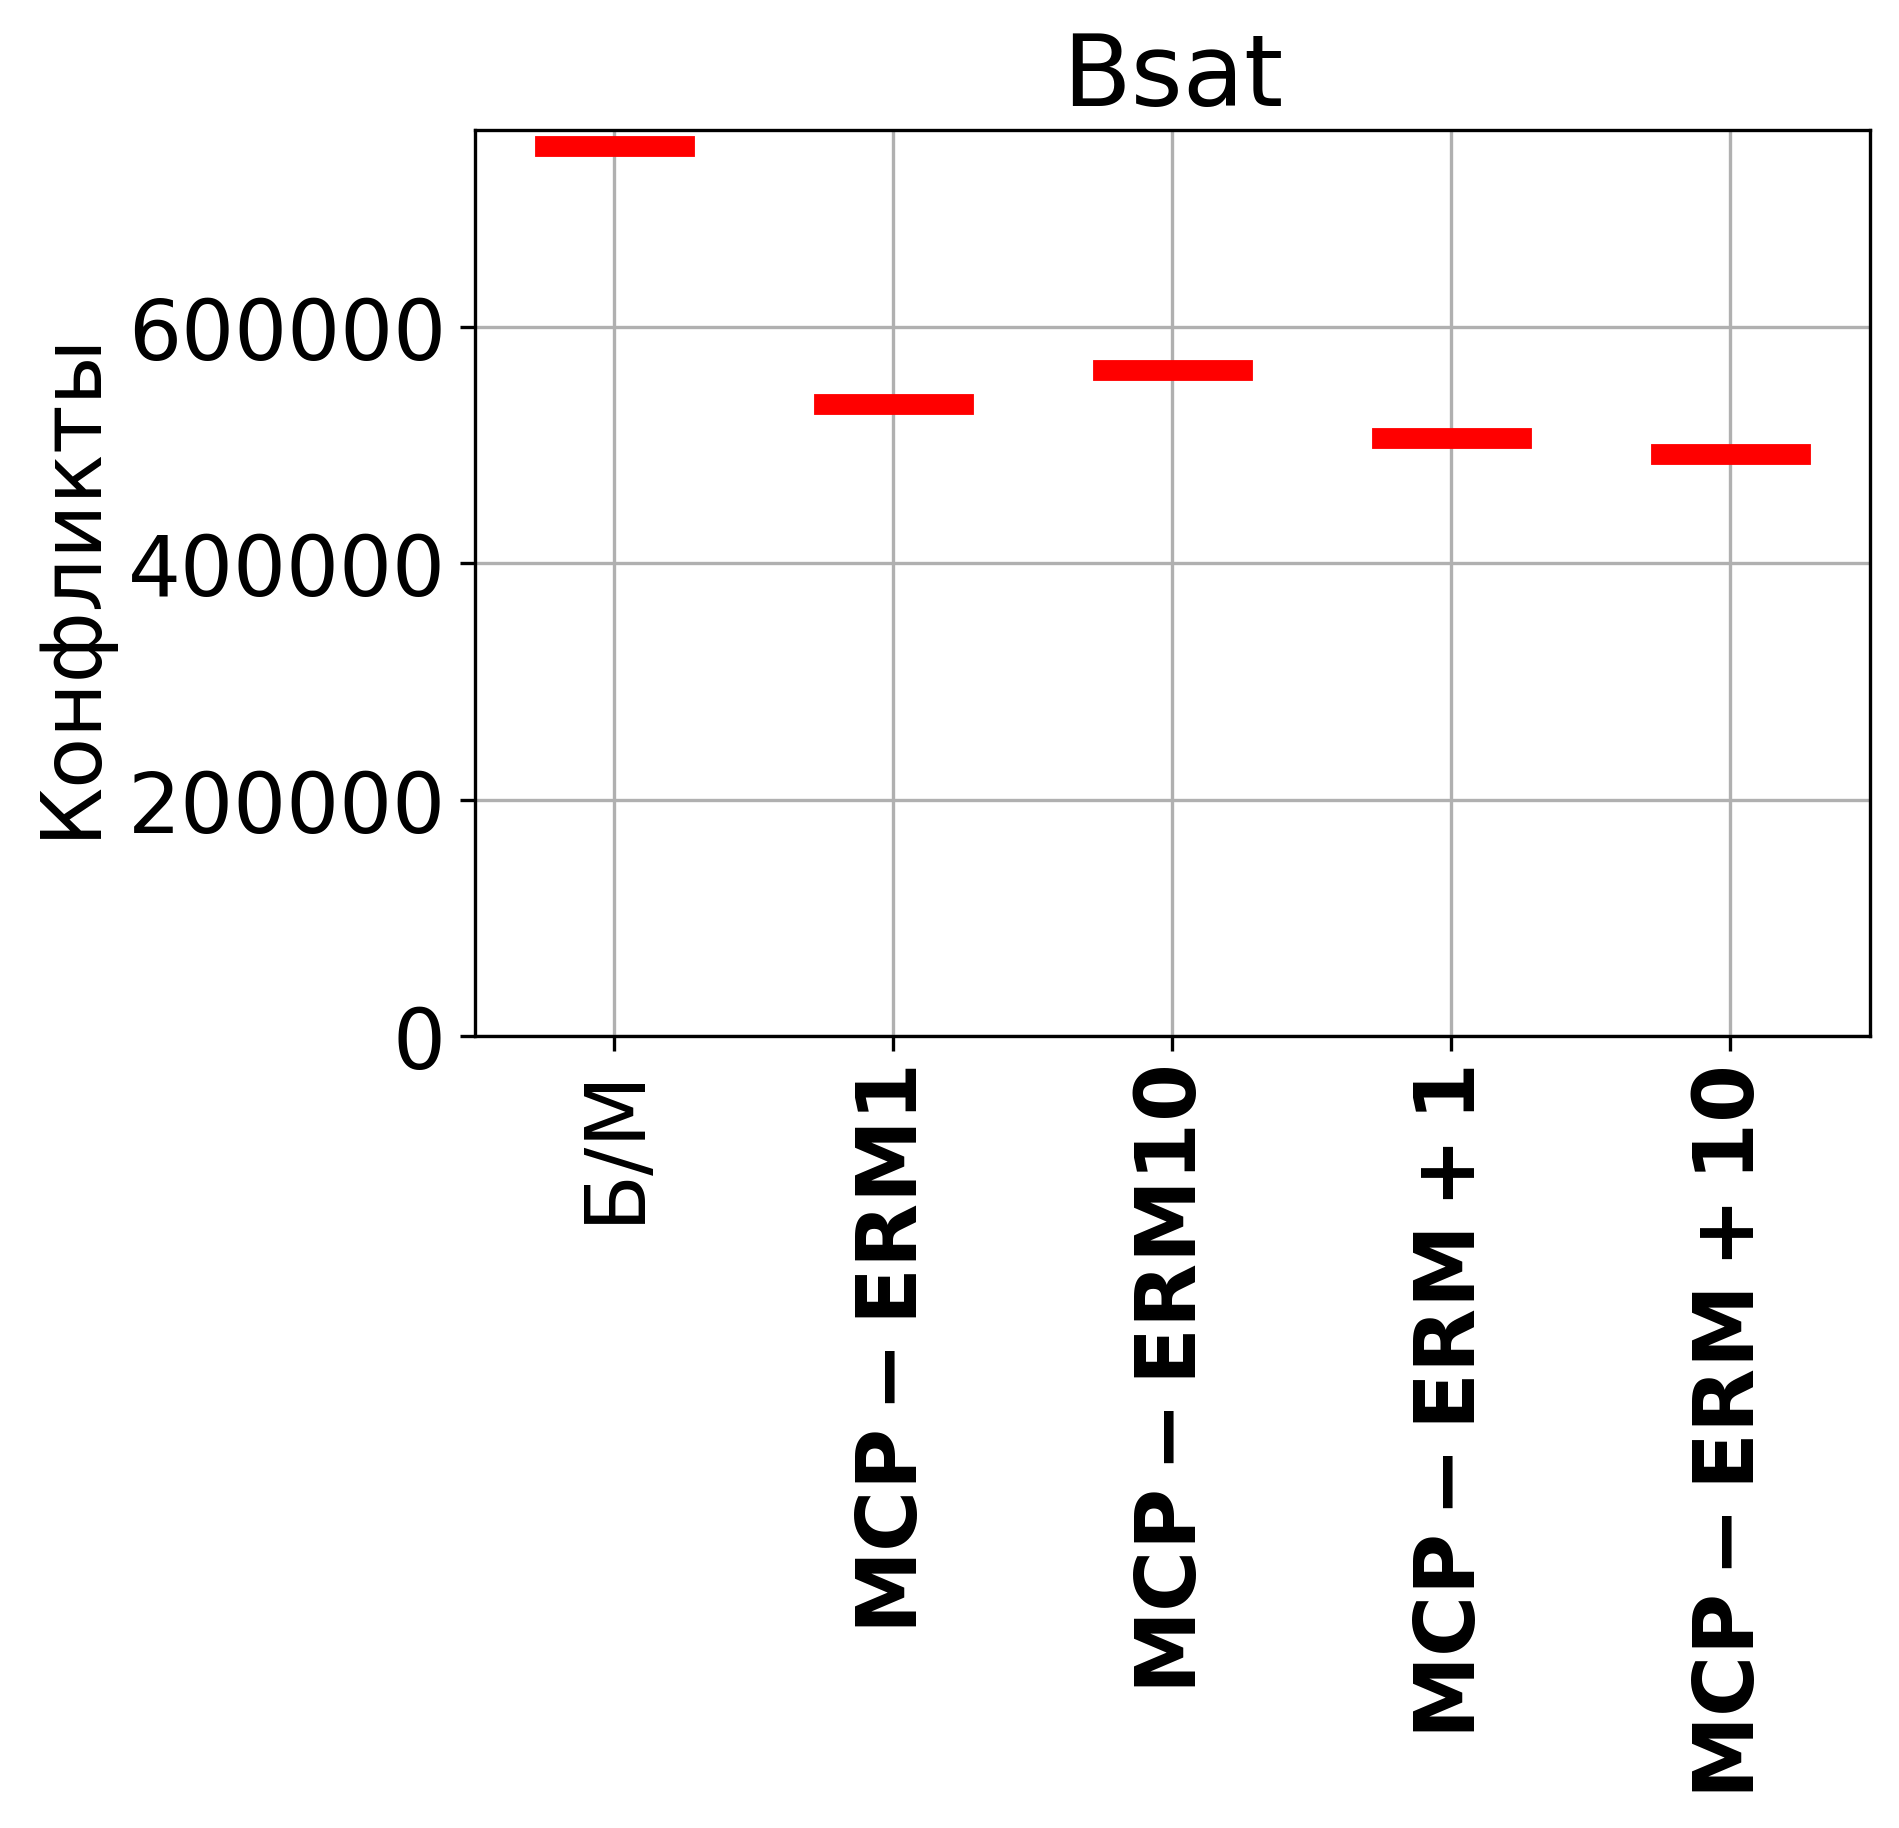

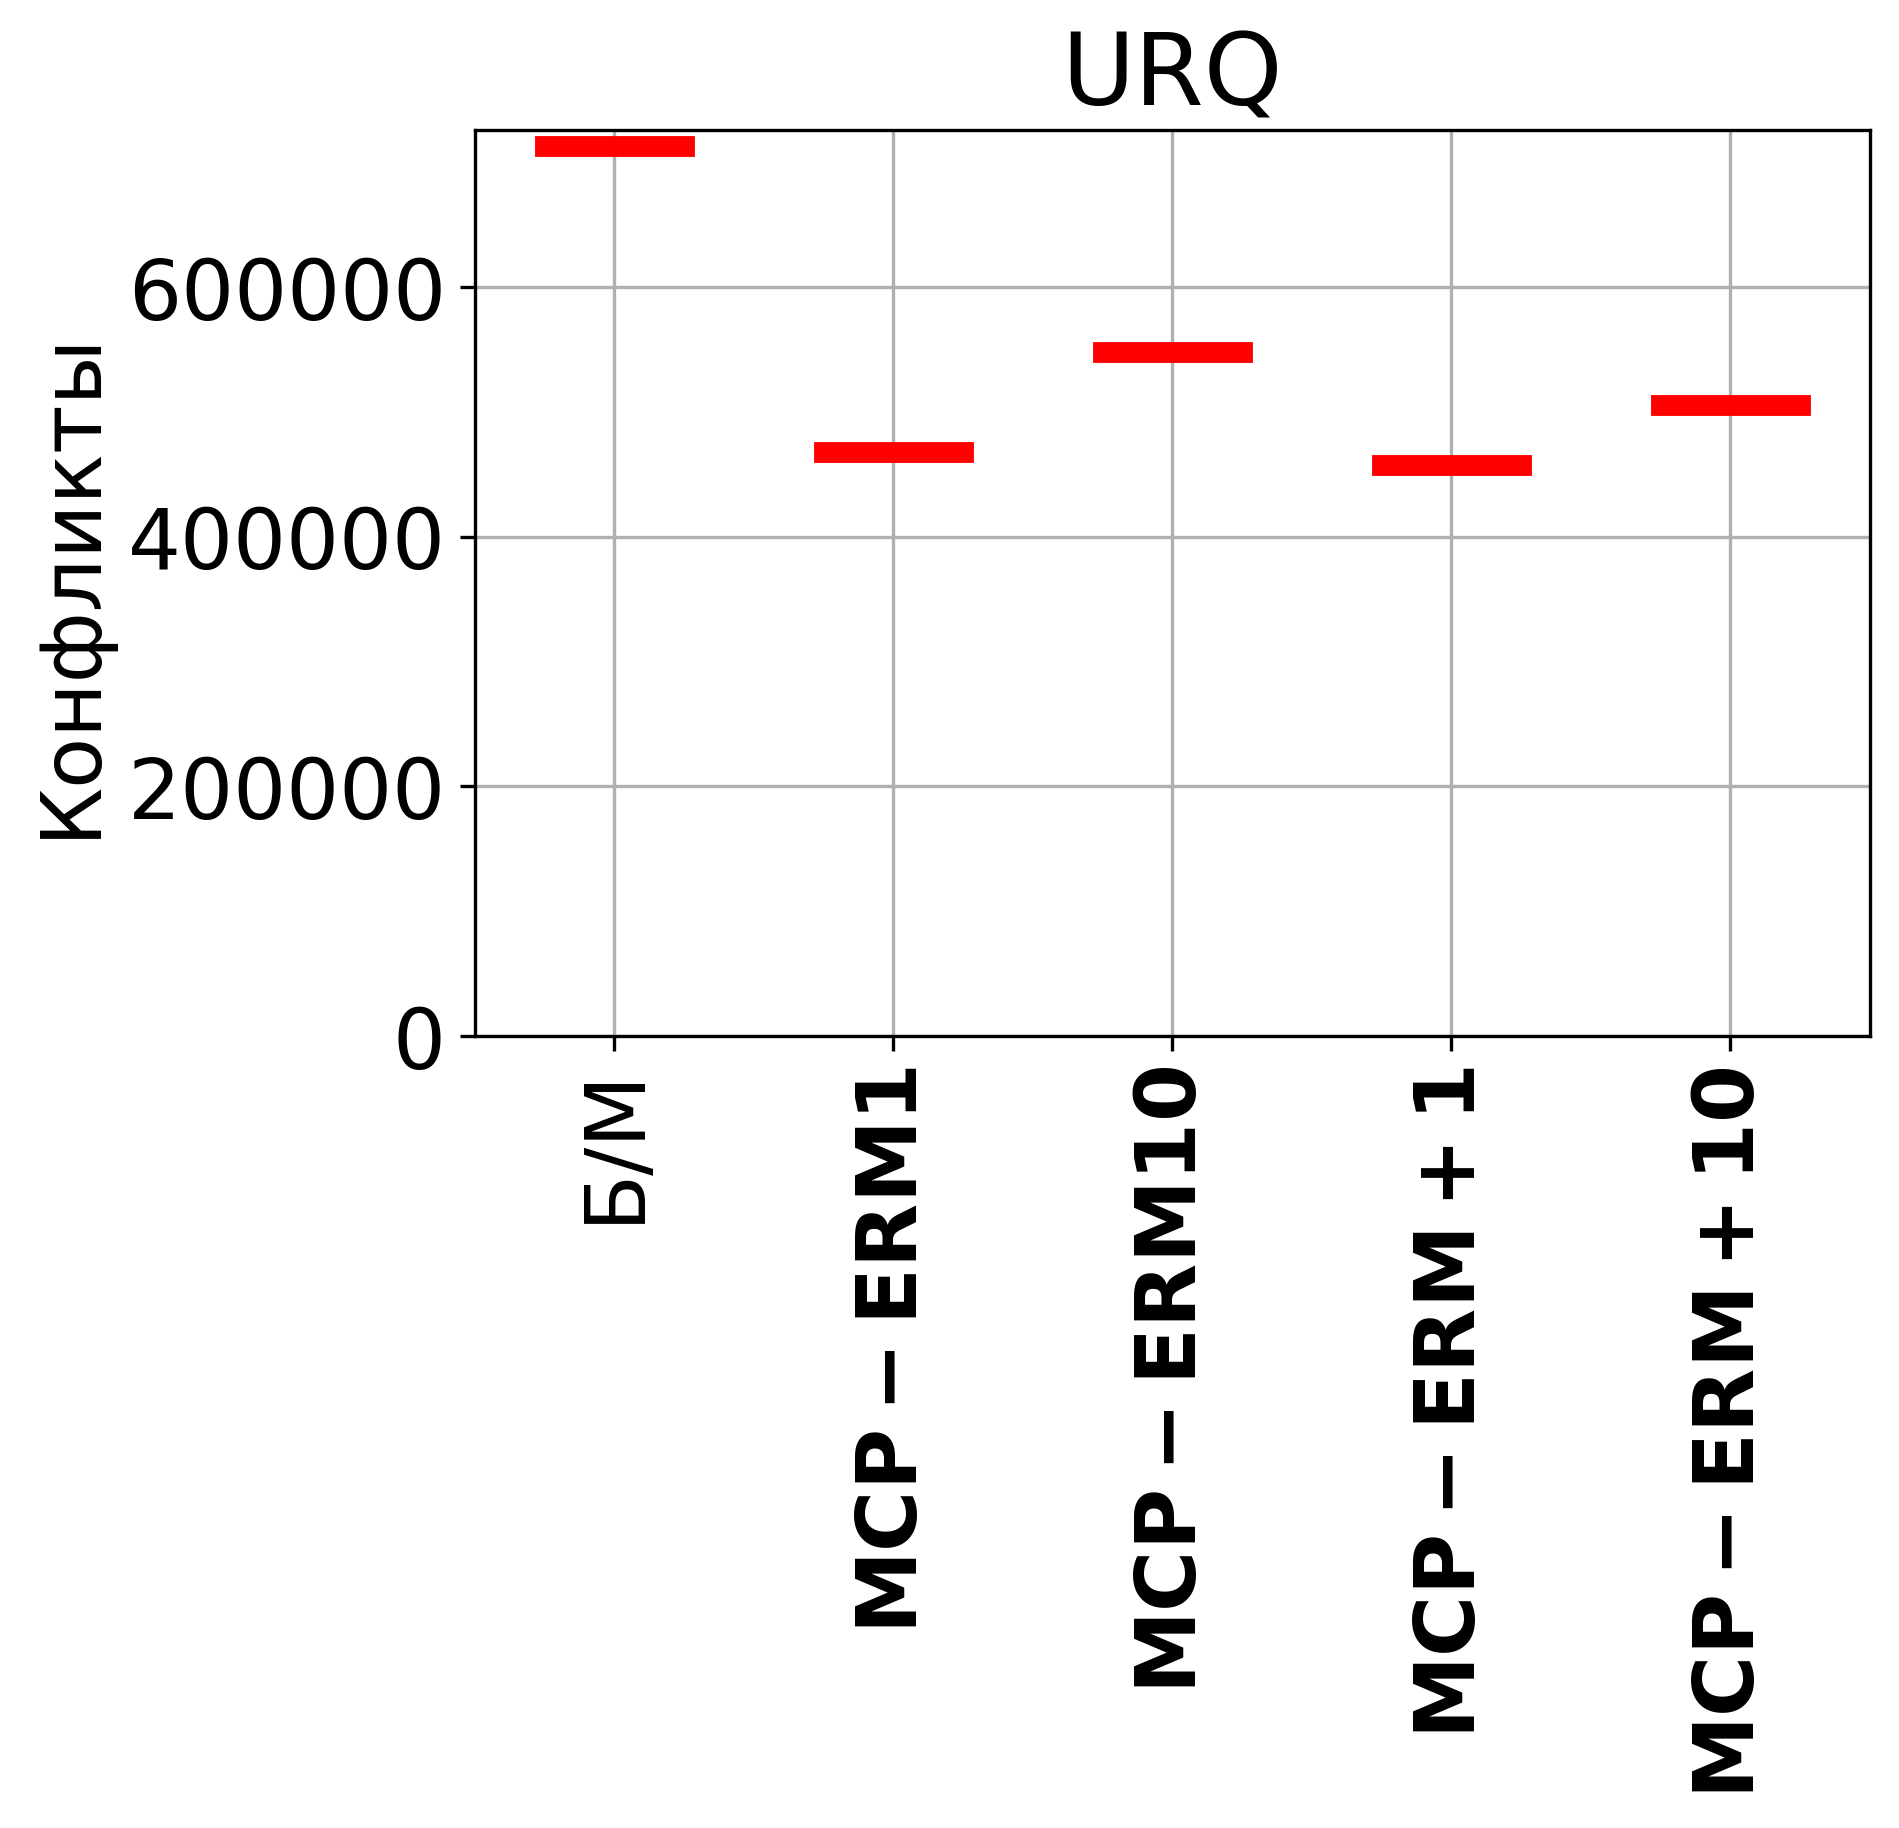

In [19]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  for experiment in filter(lambda x: benchmark in x['name'], baseline):
    data.append(experiment['json_agg'])
    names.append('Б/М')
  if benchmark == 'CB6':
    data.append([58581])
    names.append('Б/М')
  if benchmark == 'URQ':
    data.append([712708])
    names.append('Б/М')
  for experiment in filter(lambda x: benchmark in x['name'] and (' 1 ' in x['name'] or ' 10 ' in x['name']), mcperx):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1] + '   ' + experiment['name'].split(' ')[2] 
    names.append(r'$\mathbf{' + optimizer + '}$')

  plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.xticks([i for i in range(1, len(names) + 1)], names, rotation=90)
  plt.ylabel('Конфликты')
  plt.grid()
  plt.title(benchmark)
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()

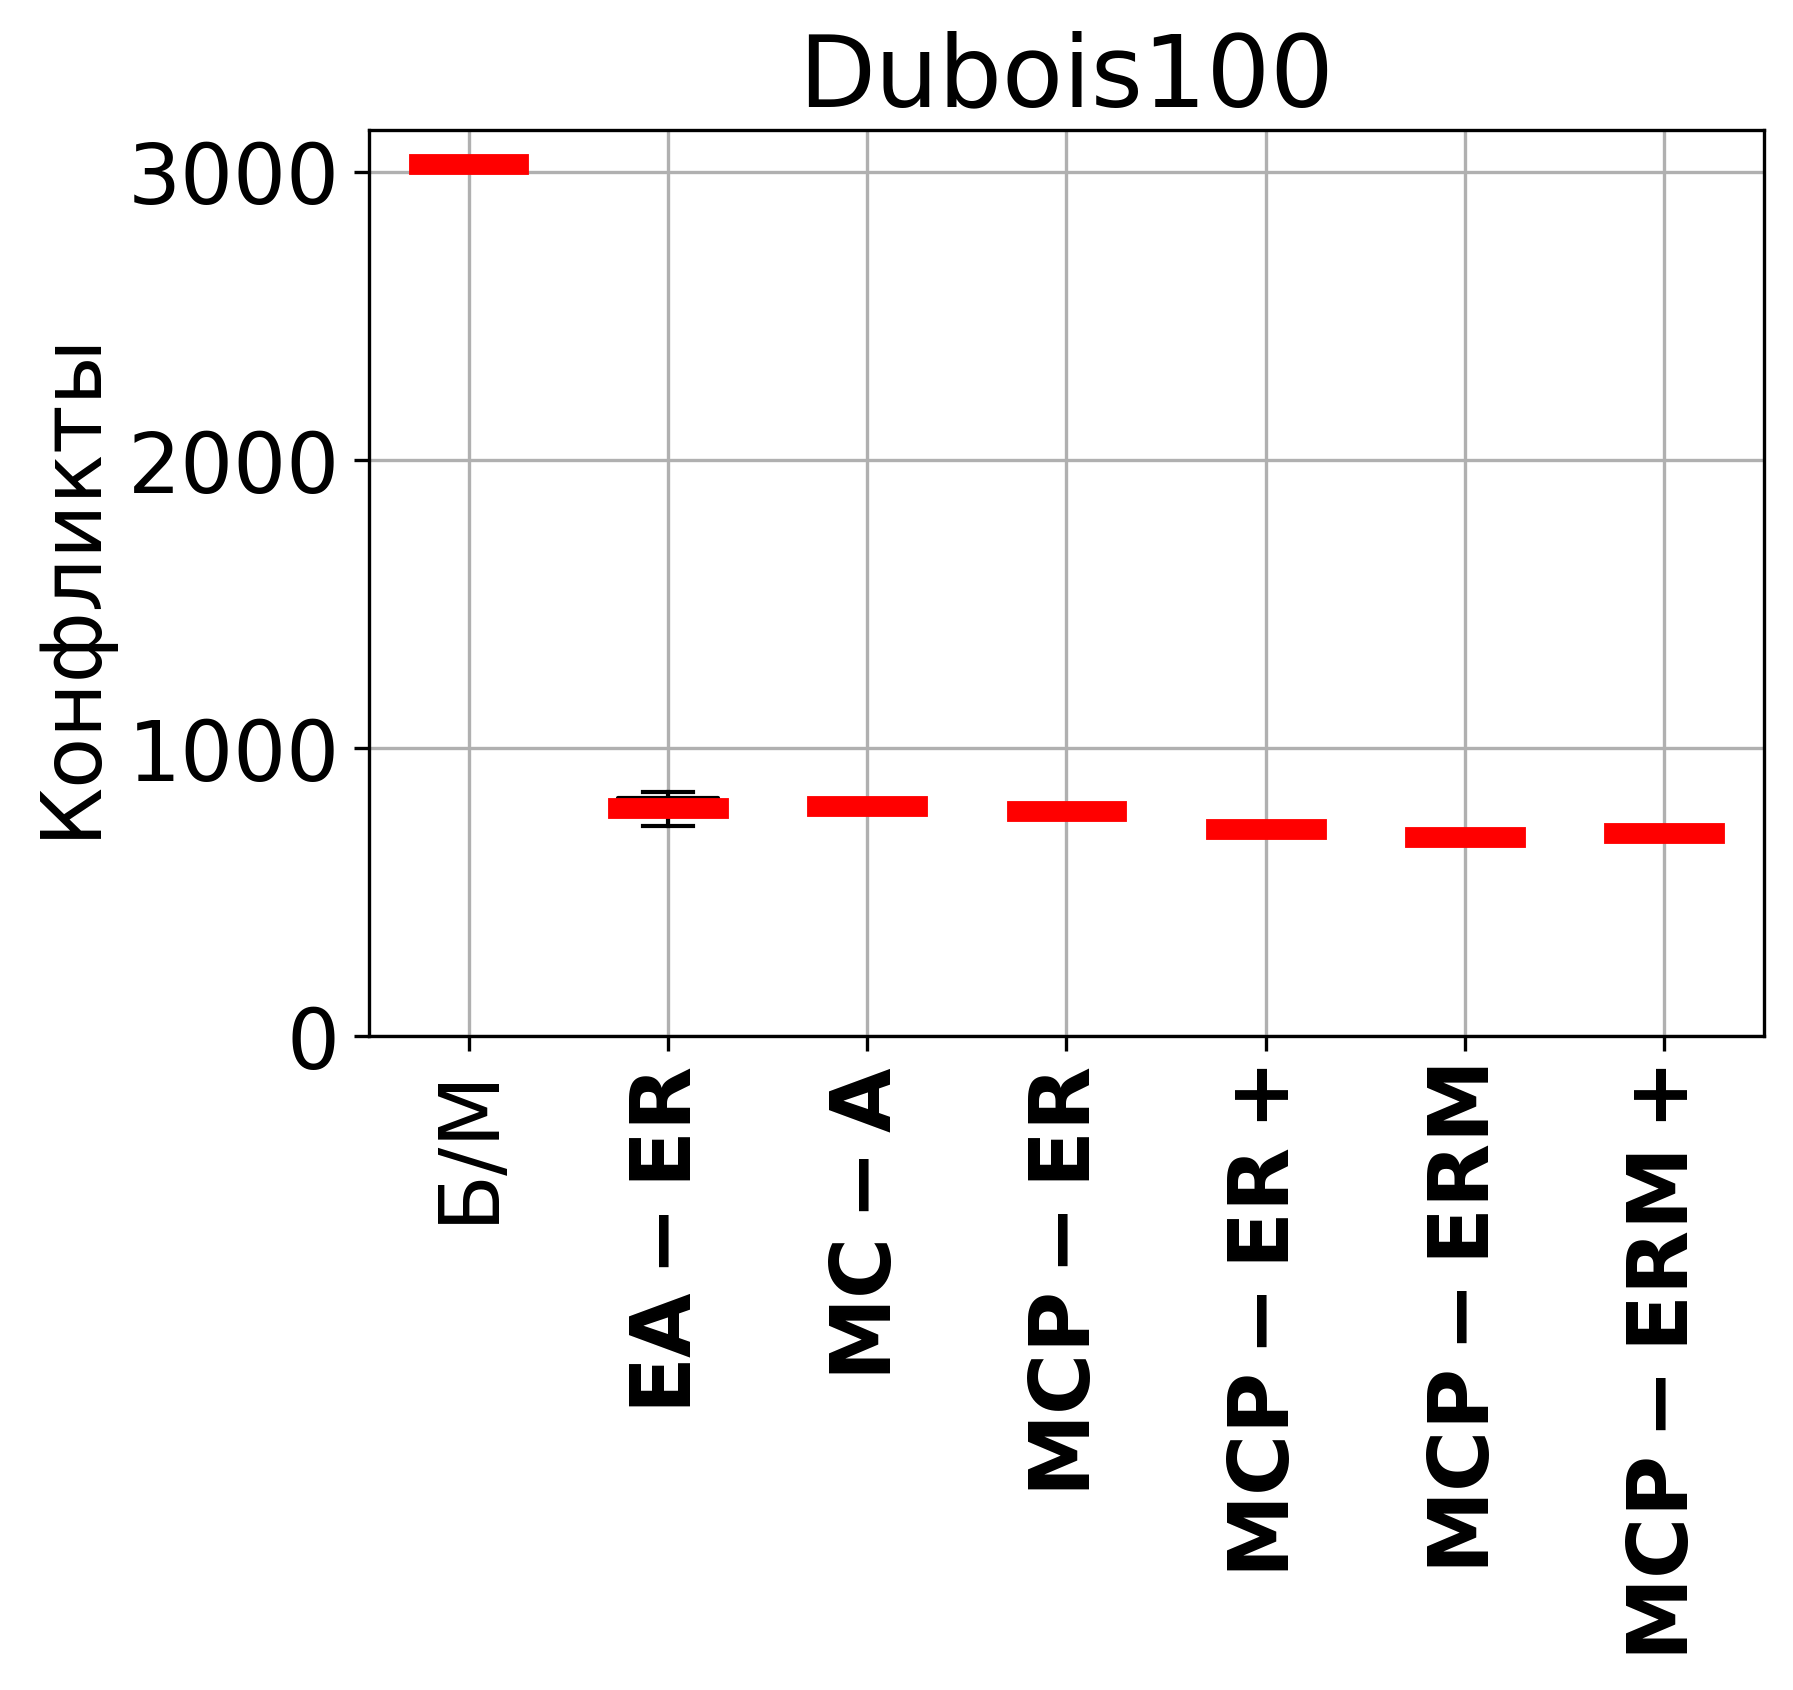

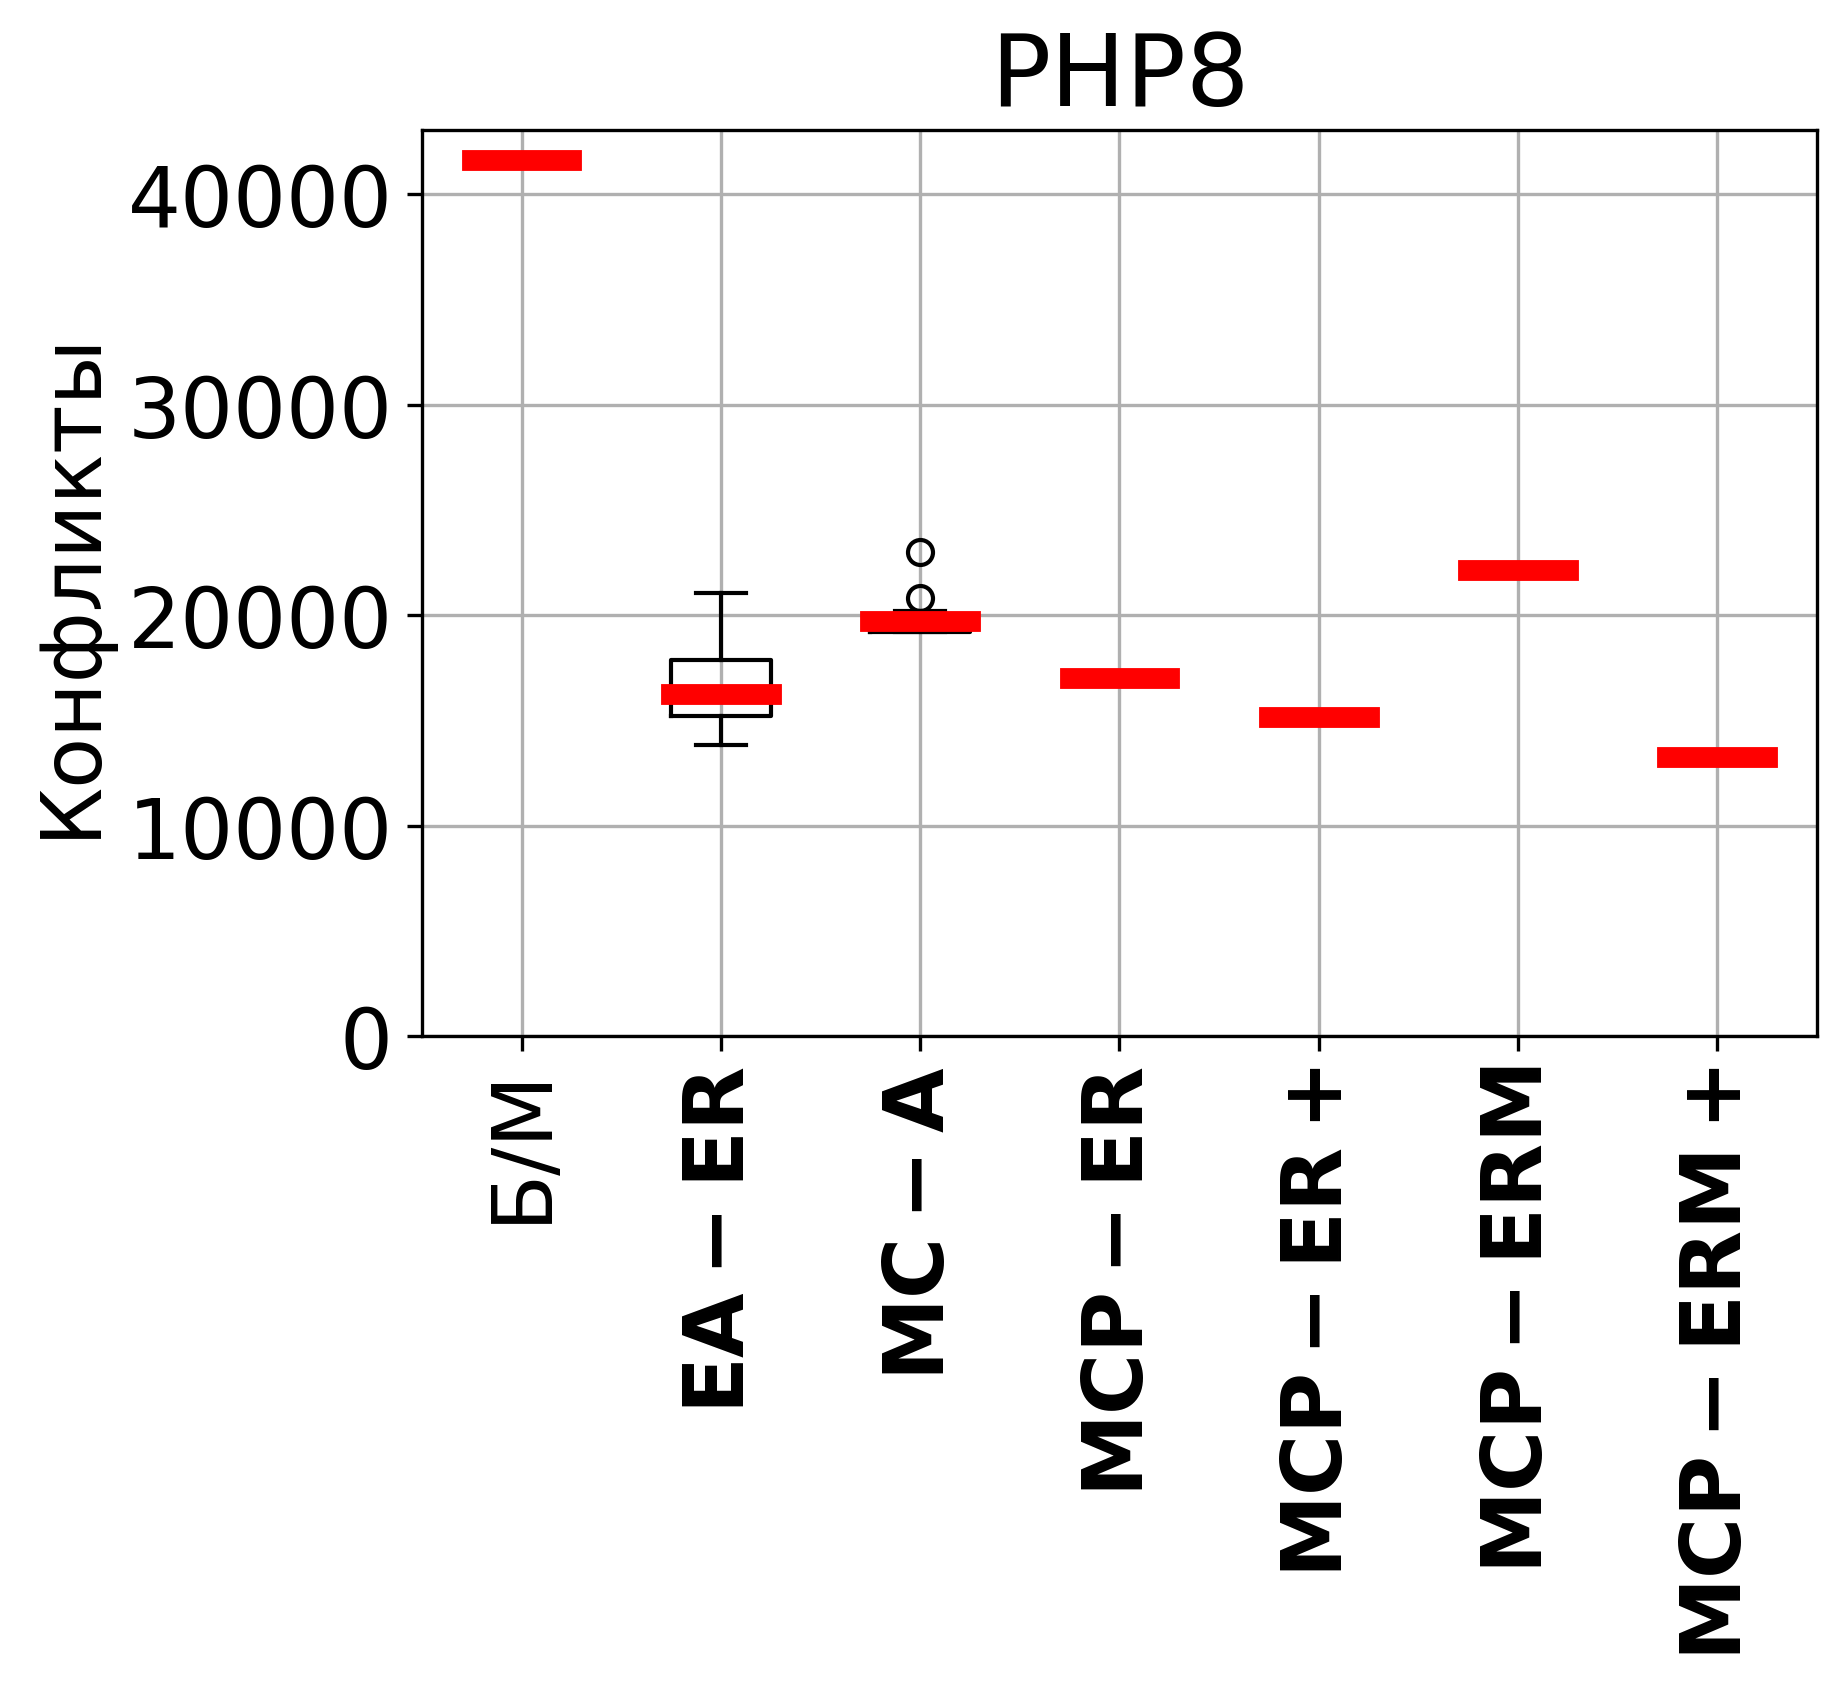

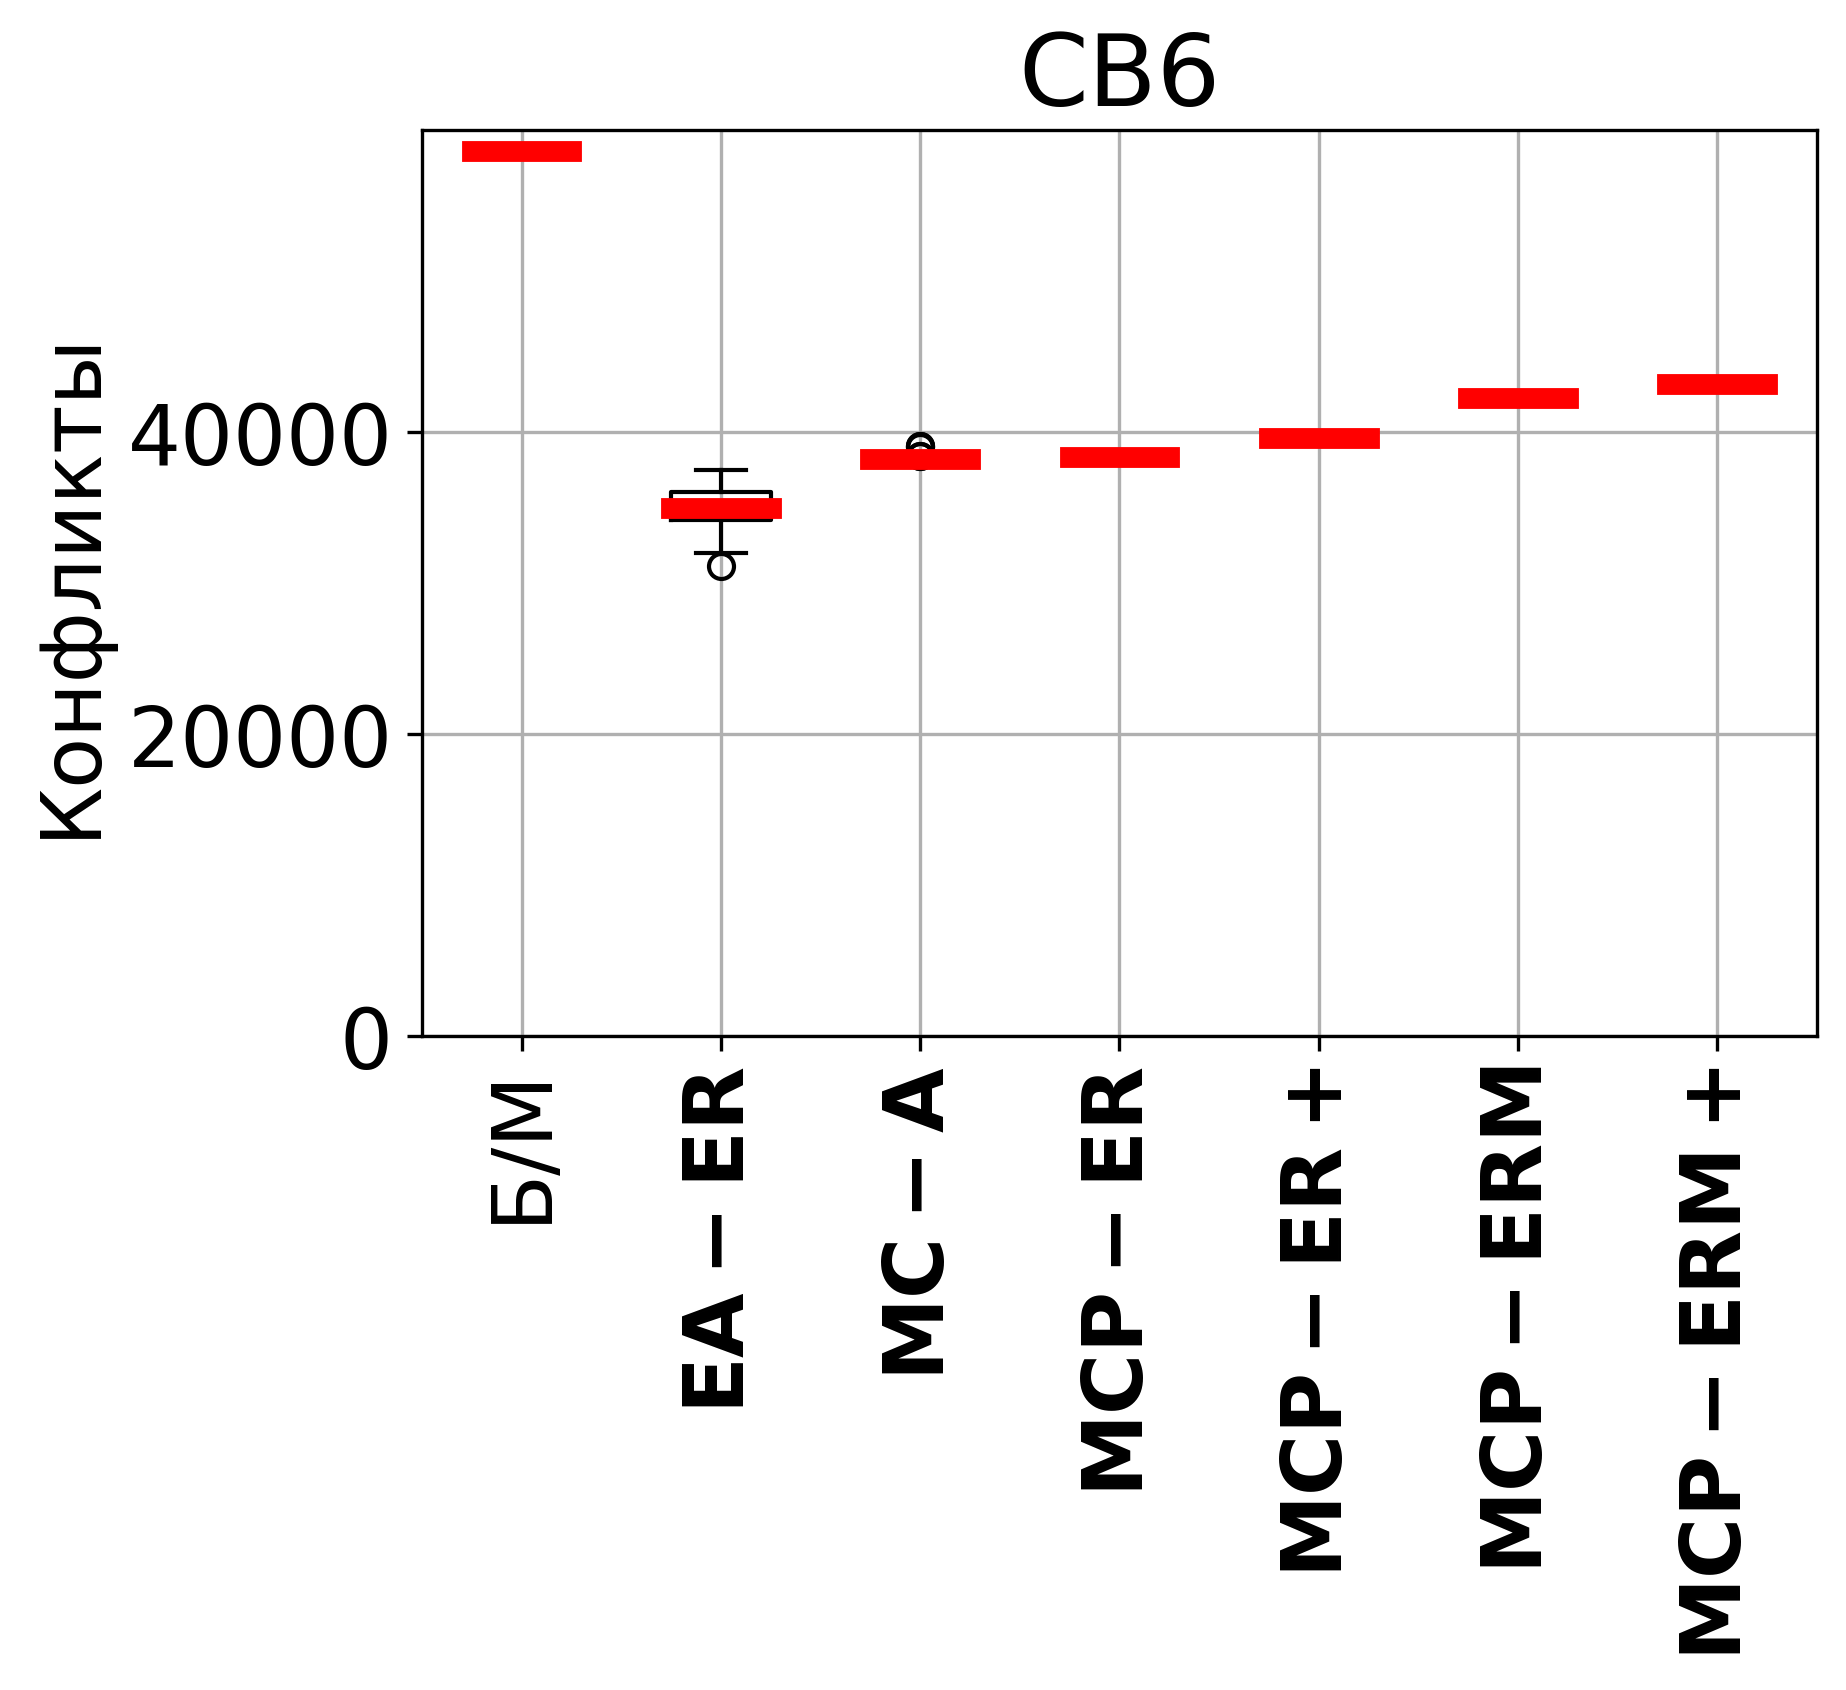

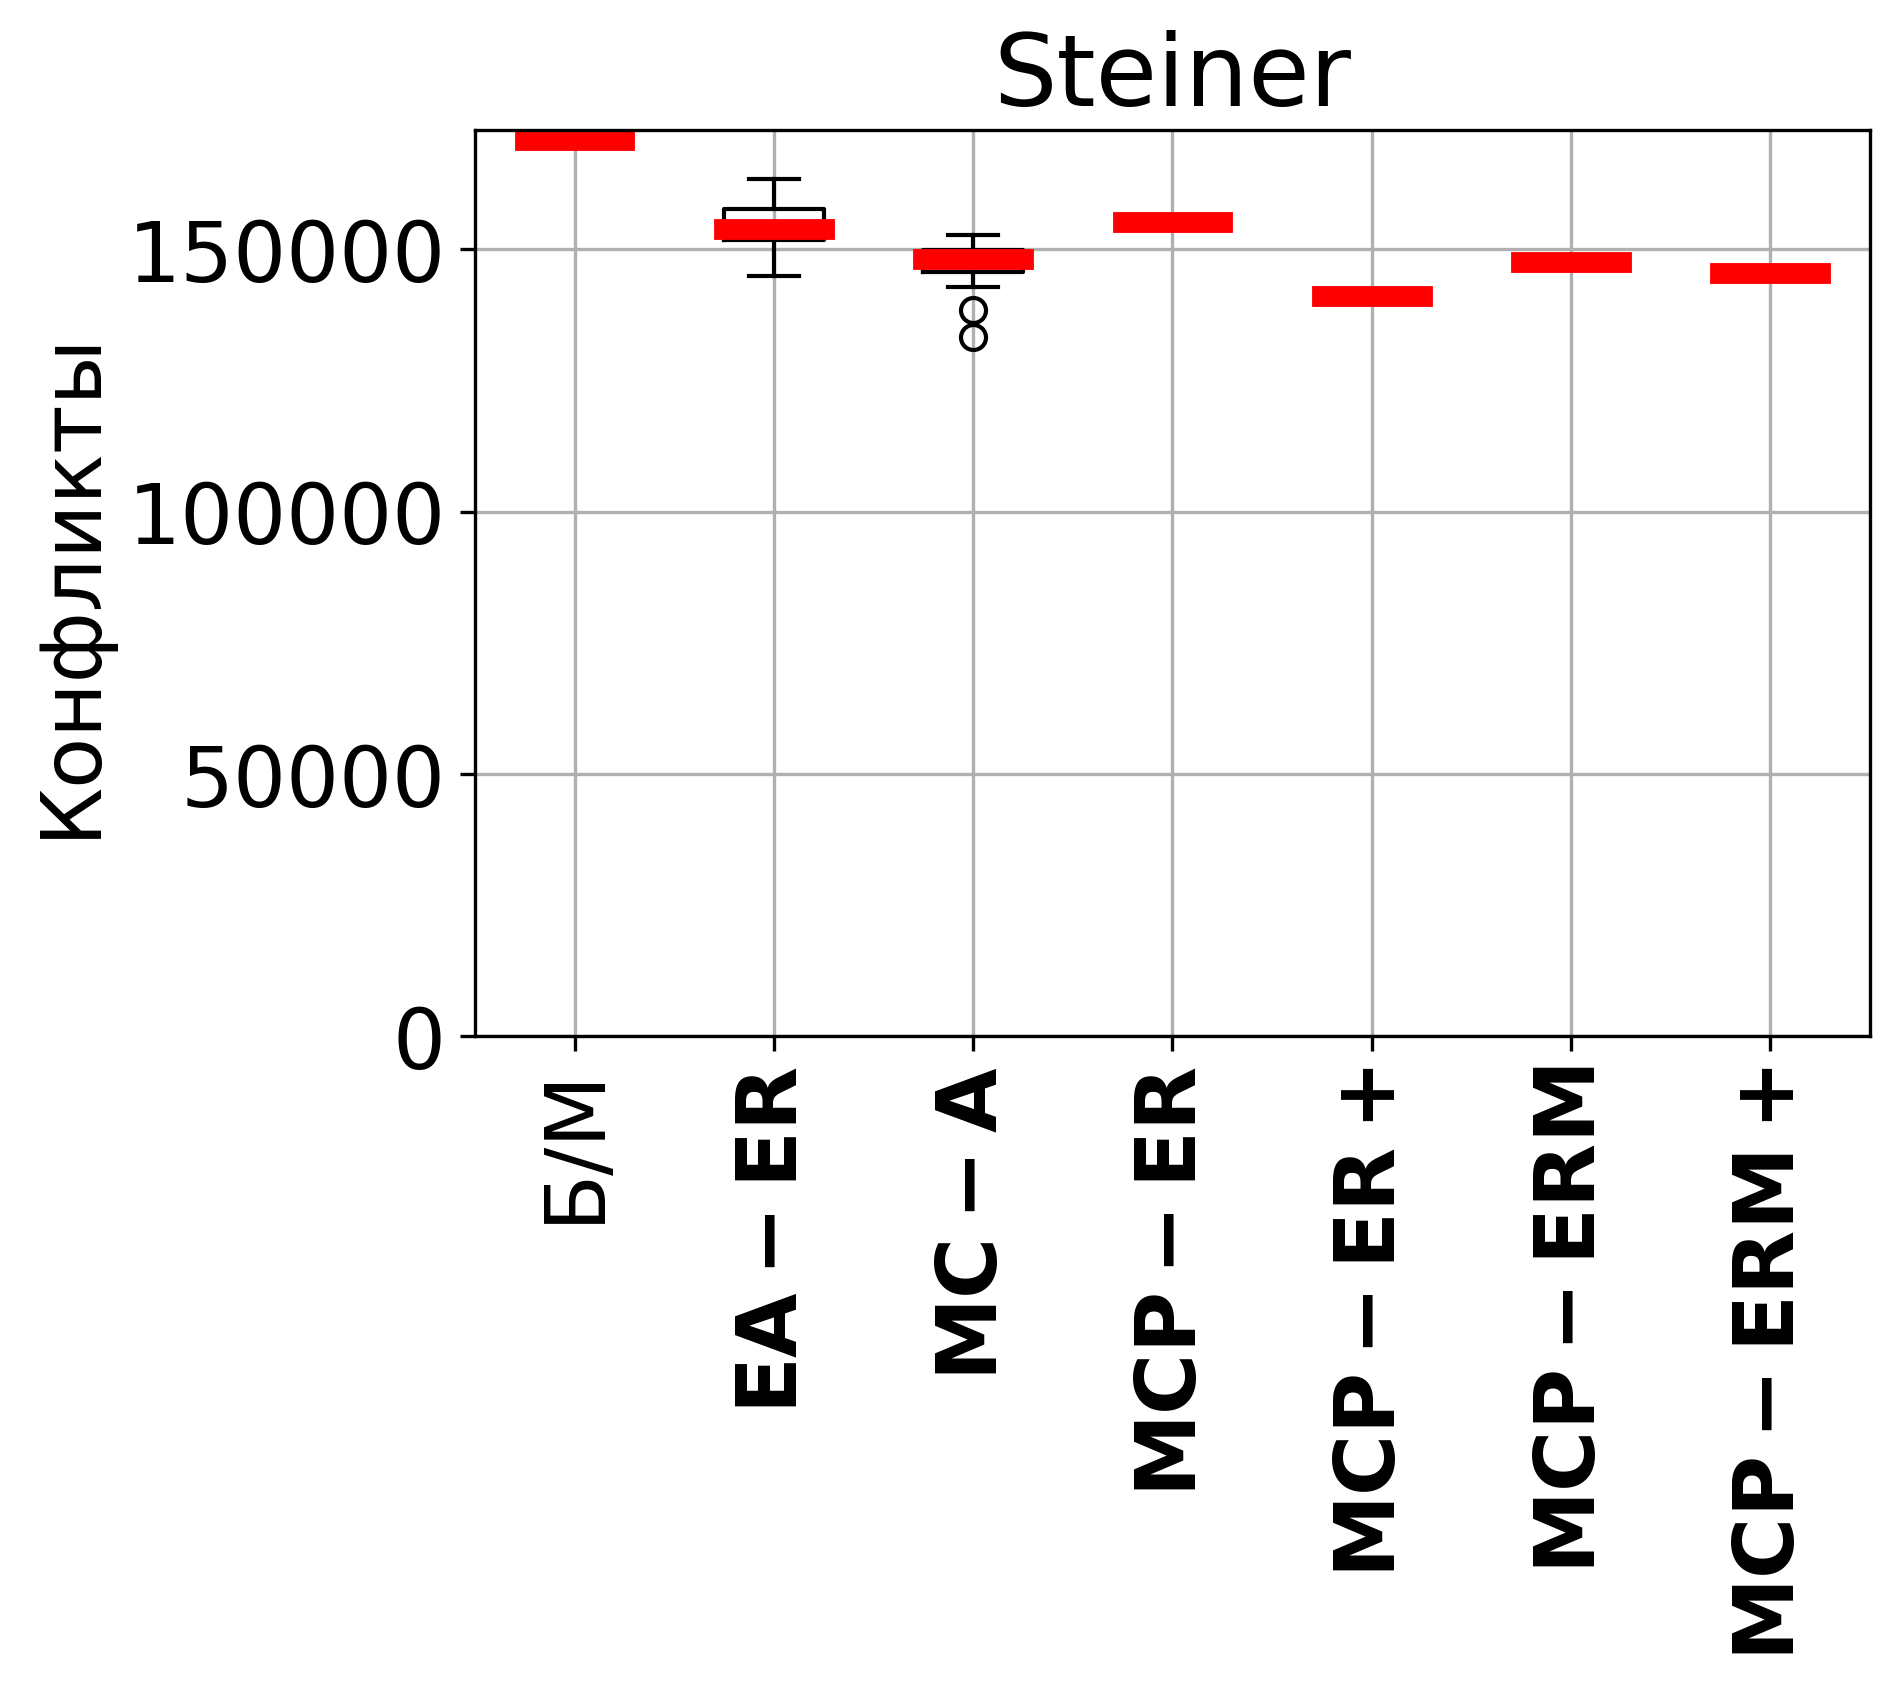

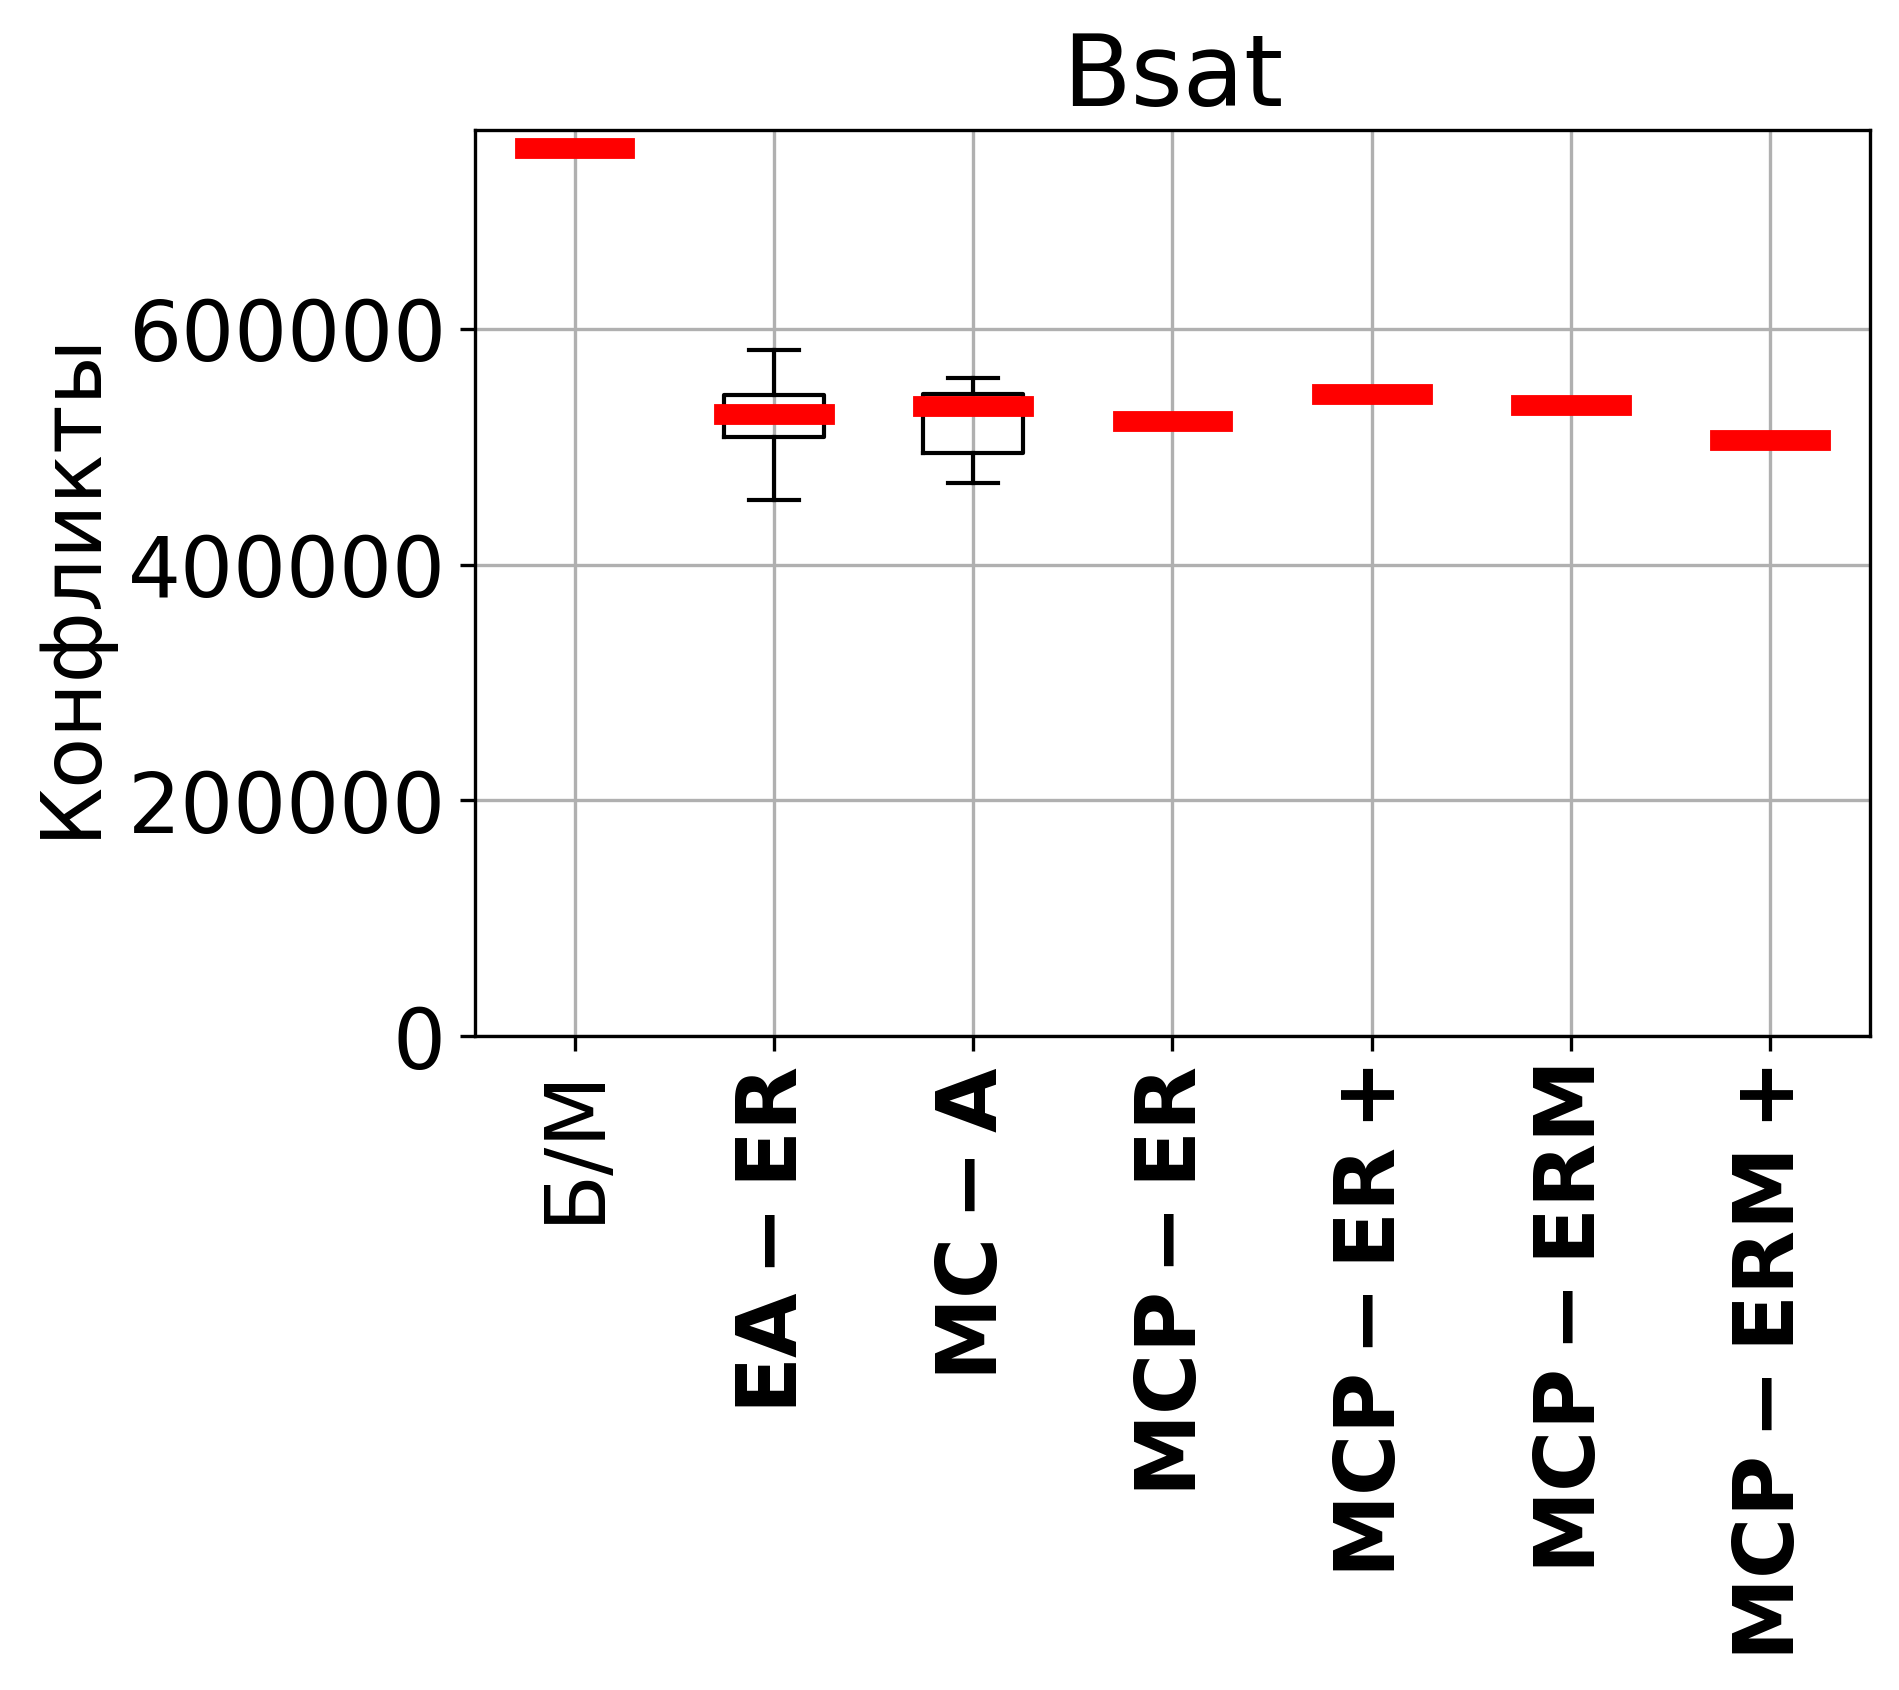

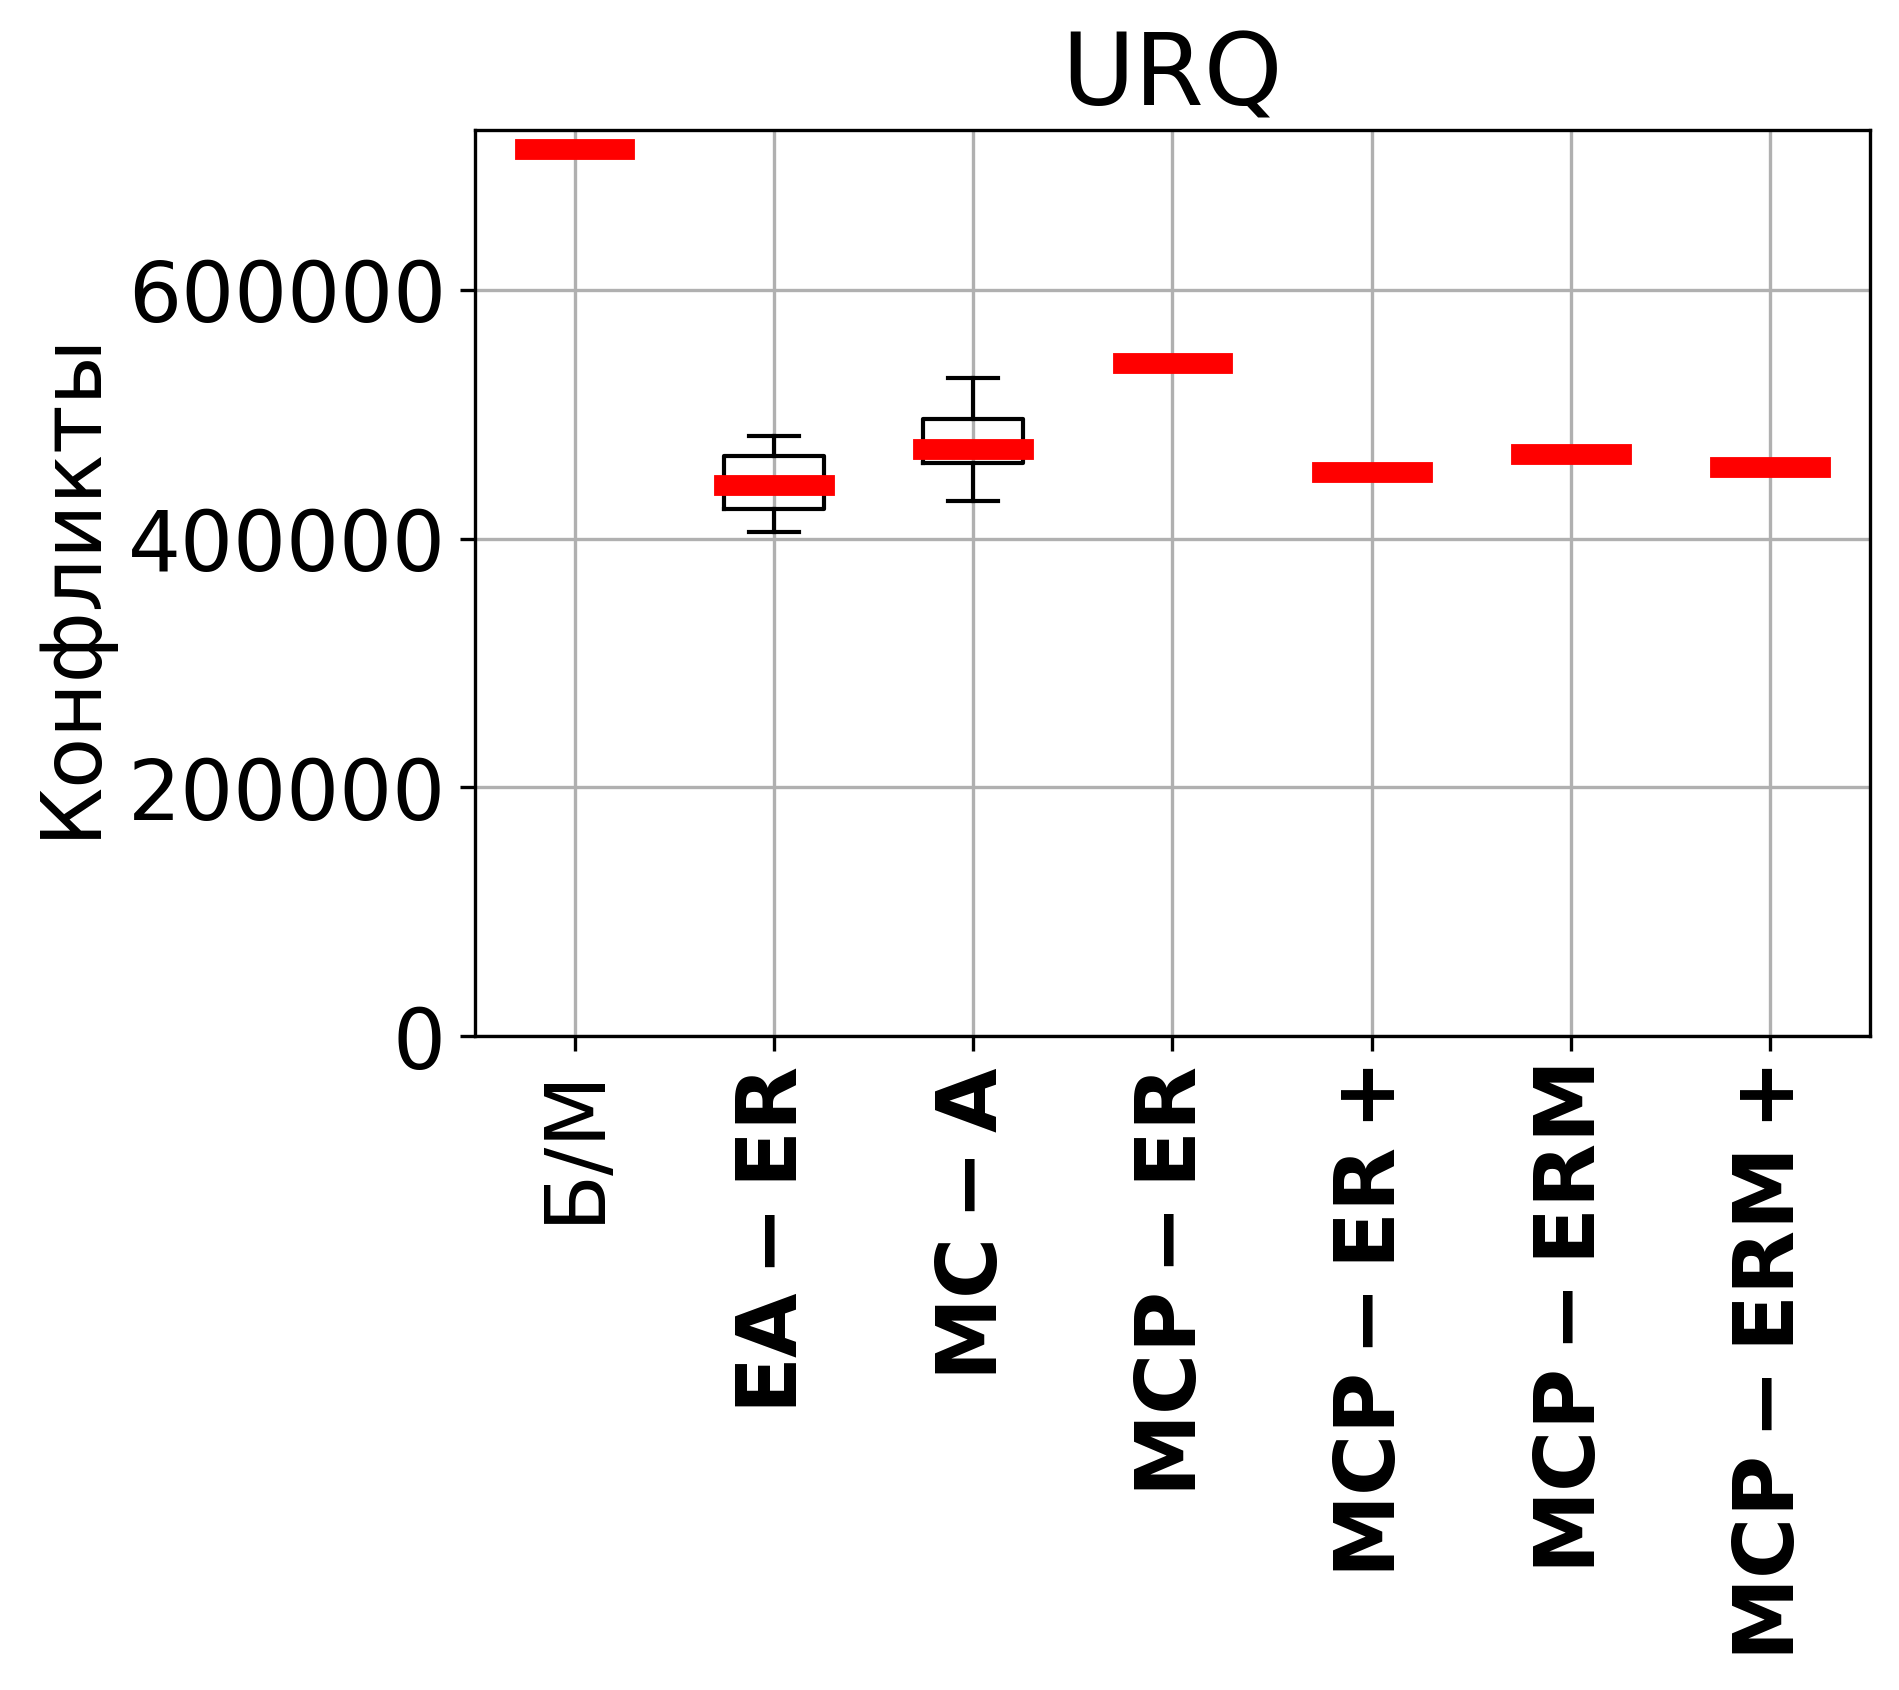

In [21]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  data = []
  names = []
  for experiment in filter(lambda x: benchmark in x['name'], baseline):
    data.append(experiment['json_agg'])
    names.append('Б/М')
  if benchmark == 'CB6':
    data.append([58581])
    names.append('Б/М')
  if benchmark == 'URQ':
    data.append([712708])
    names.append('Б/М')
  for experiment in filter(lambda x: benchmark in x['name'] and ('MCP-ER 1 ' in x['name'] or 'MCP-ER+ 1 ' in x['name'] or 'MC-A' in x['name'] or 'EA-ER' in x['name']), experimentResults):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1]
    names.append(r'$\mathbf{' + optimizer + '}$')
  for experiment in filter(lambda x: benchmark in x['name'] and ('MCP-ERM 1 ' in x['name'] or 'MCP-ERM+ 1 ' in x['name']), mcperx):
    data.append(experiment['json_agg'])
    optimizer = experiment['name'].split(' ')[1]# + '   ' + experiment['name'].split(' ')[2] 
    names.append(r'$\mathbf{' + optimizer + '}$')

  plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.xticks([i for i in range(1, len(names) + 1)], names, rotation=90)
  plt.ylabel('Конфликты')
  plt.grid()
  plt.title(benchmark)
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()

{'eaer': [1315, 1082, 964, 964, 964, 964, 949, 949, 917, 917, 917, 917, 917, 917, 917, 917, 917, 917, 917, 917, 867, 867, 867, 858, 858, 858, 858, 858, 858, 858, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 816, 800, 800, 800, 800, 795, 777, 777, 777, 777, 777, 769, 769, 769, 769, 769, 769, 769, 769, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 766, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 763, 762, 762, 762, 762, 762, 762, 762, 762, 736, 736, 736, 736, 736, 736, 736, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729, 729

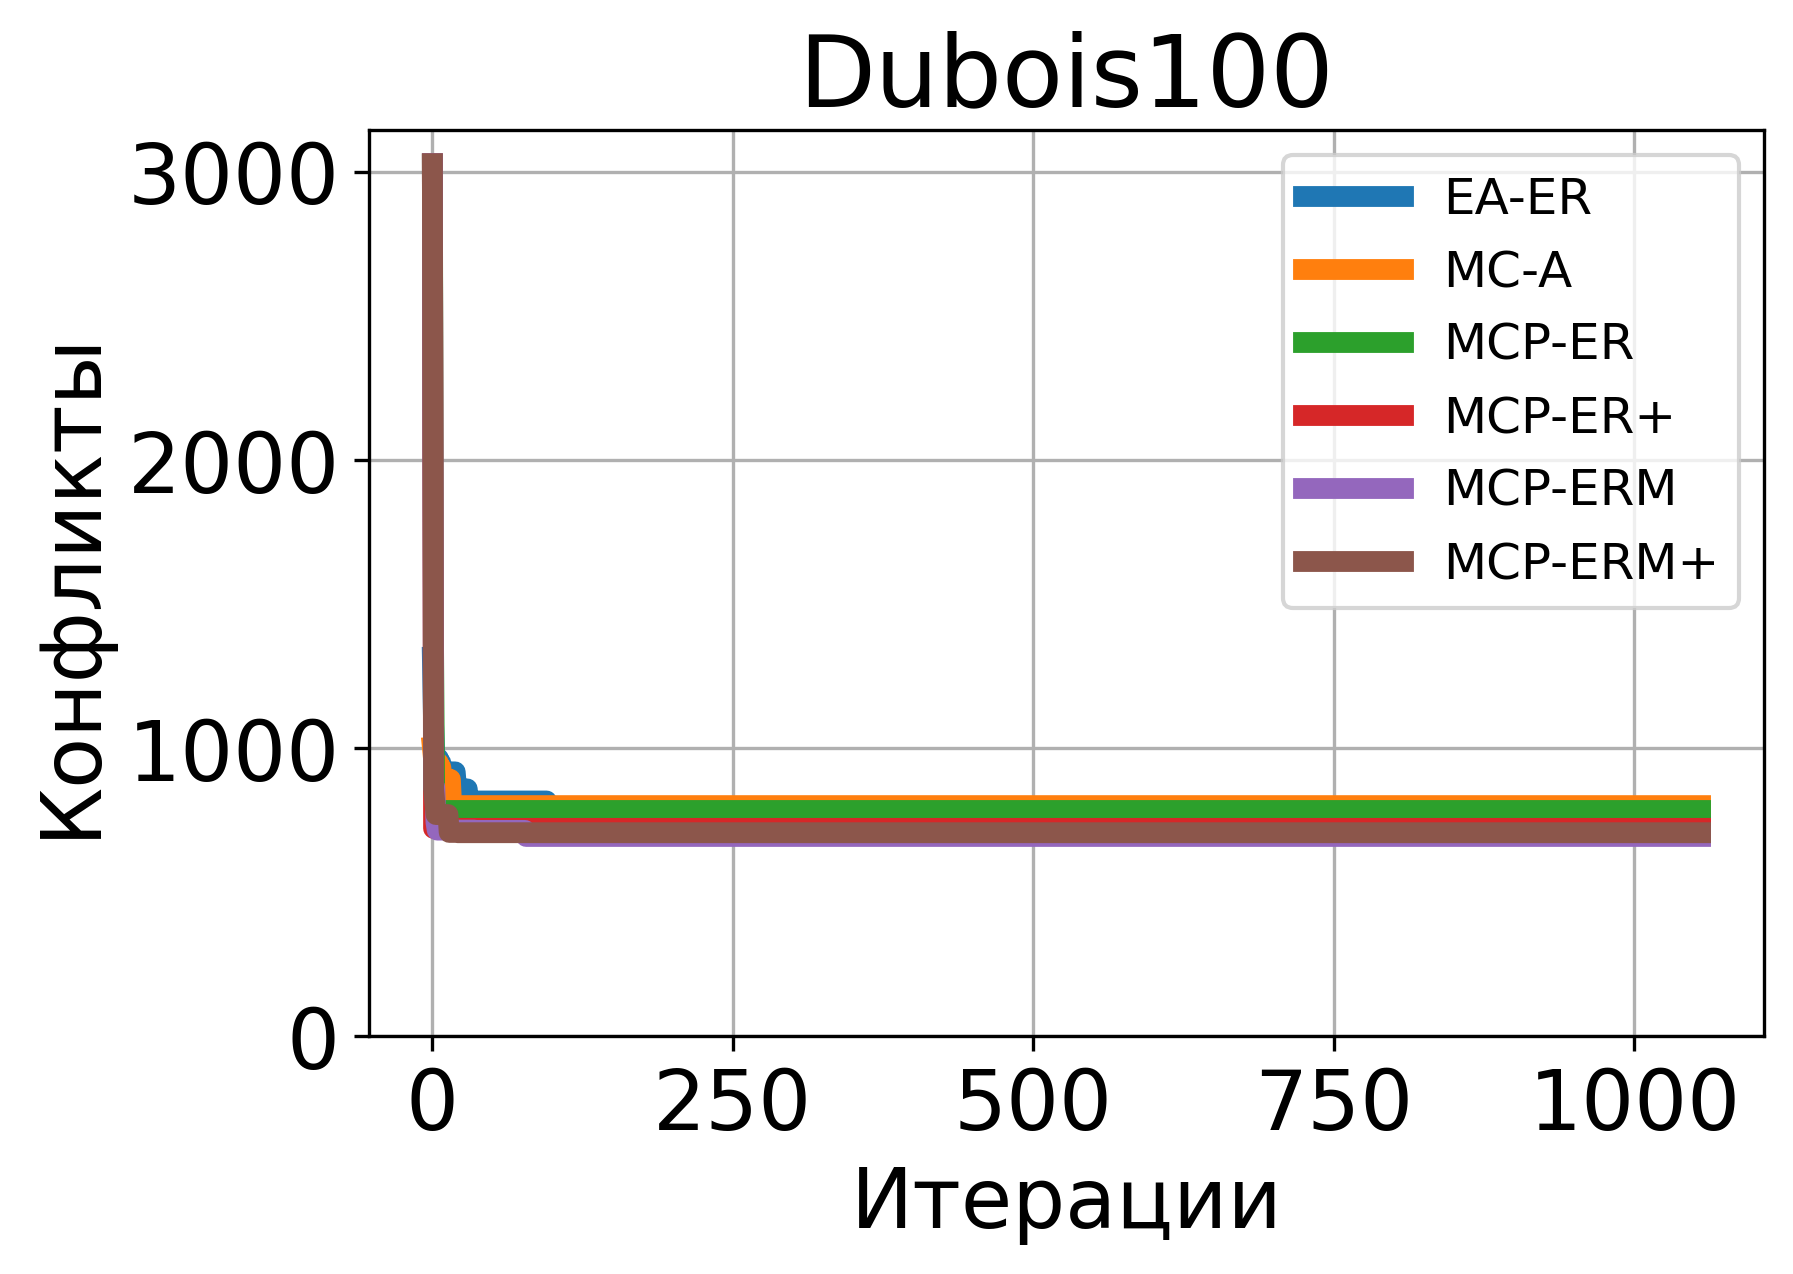

{'eaer': [57443, 31587, 31587, 31587, 19633, 19633, 19633, 19633, 19633, 19633, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 19512, 18526, 17006, 17006, 15286, 15286, 15286, 15286, 15286, 15286, 15286, 15286, 15286, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 14188, 141

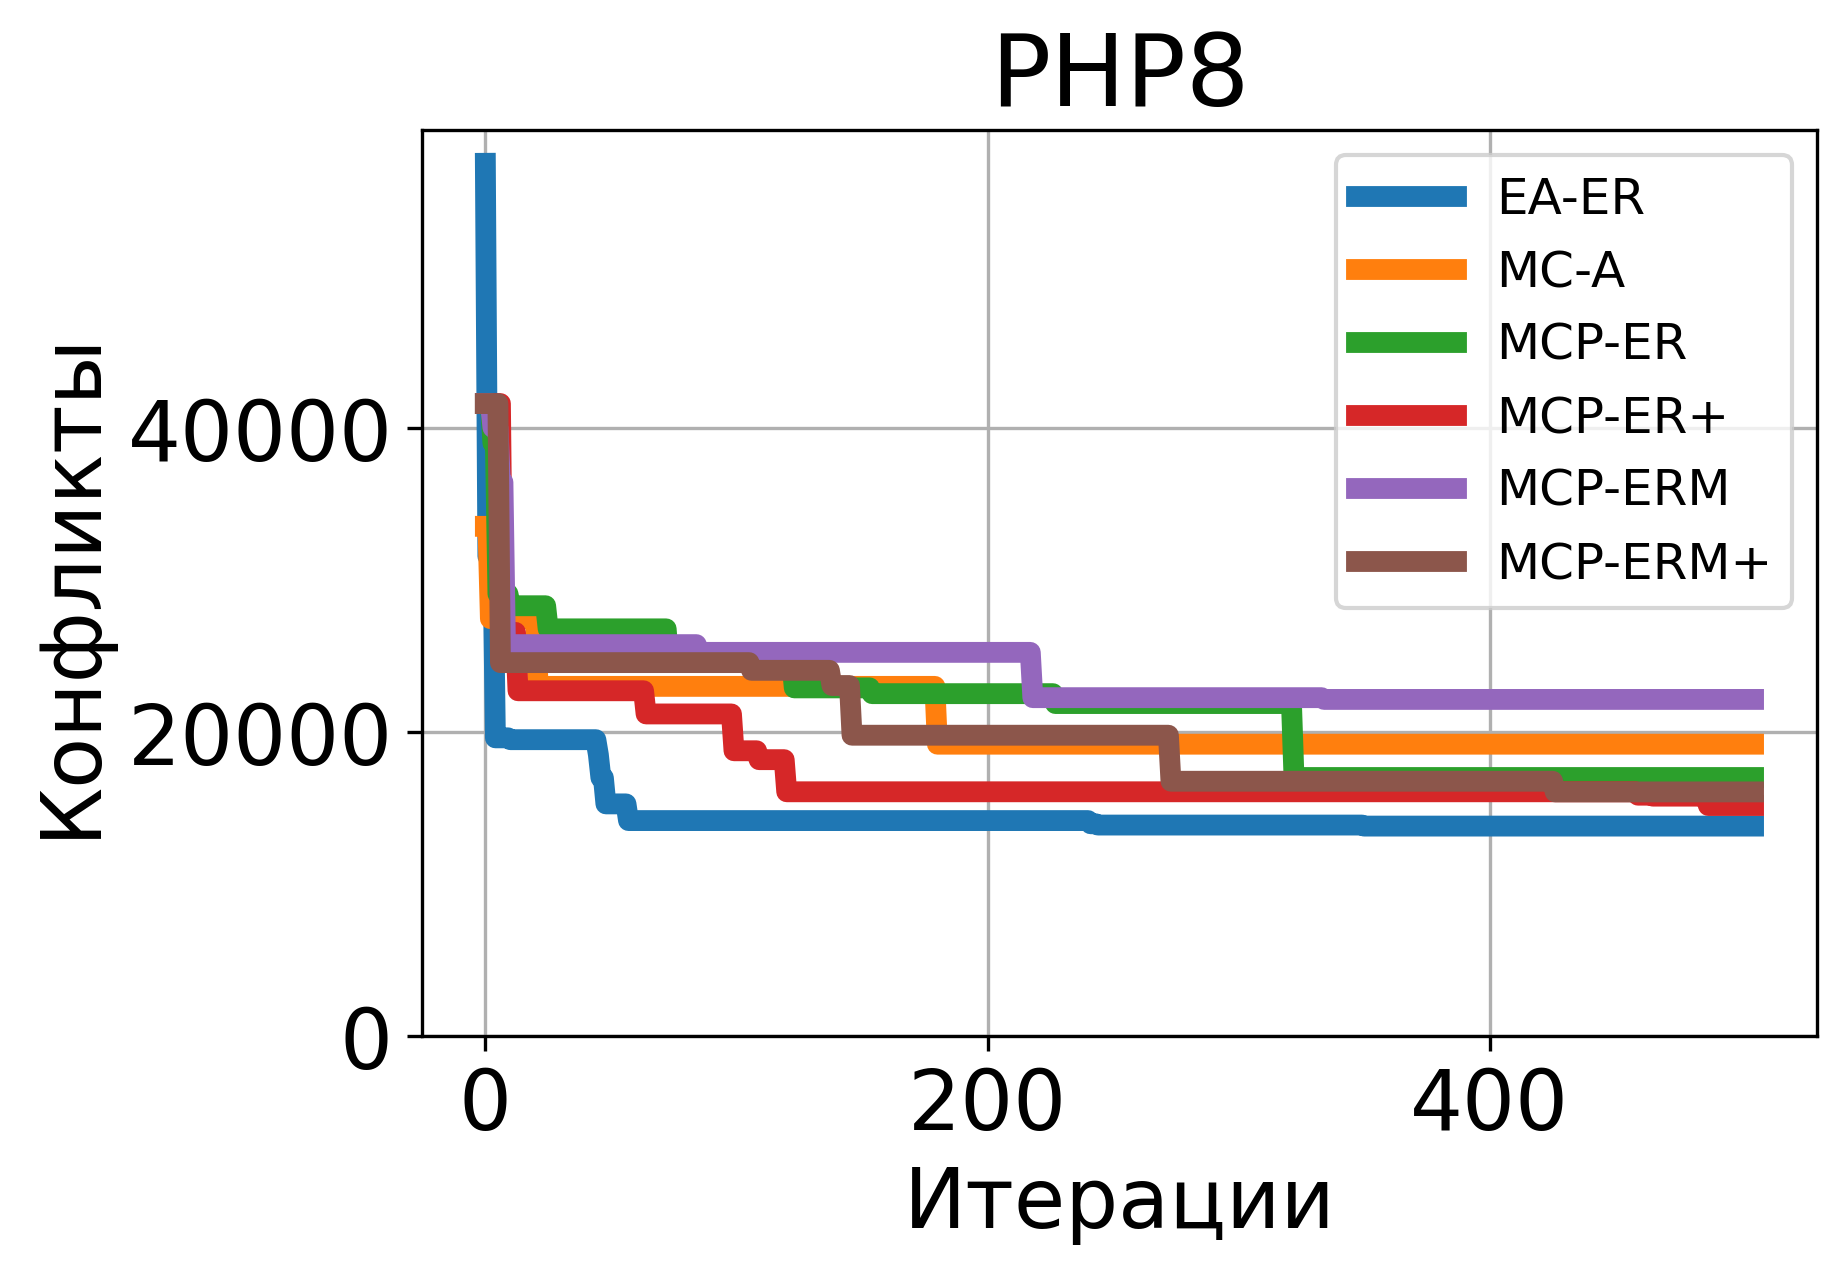

{'eaer': [63356, 44120, 44120, 44120, 44120, 44120, 38616, 38616, 38616, 38616, 38616, 38616, 38616, 38616, 38616, 38616, 38616, 37895, 37895, 37895, 37895, 37895, 37895, 37895, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 37456, 36770, 36770, 367

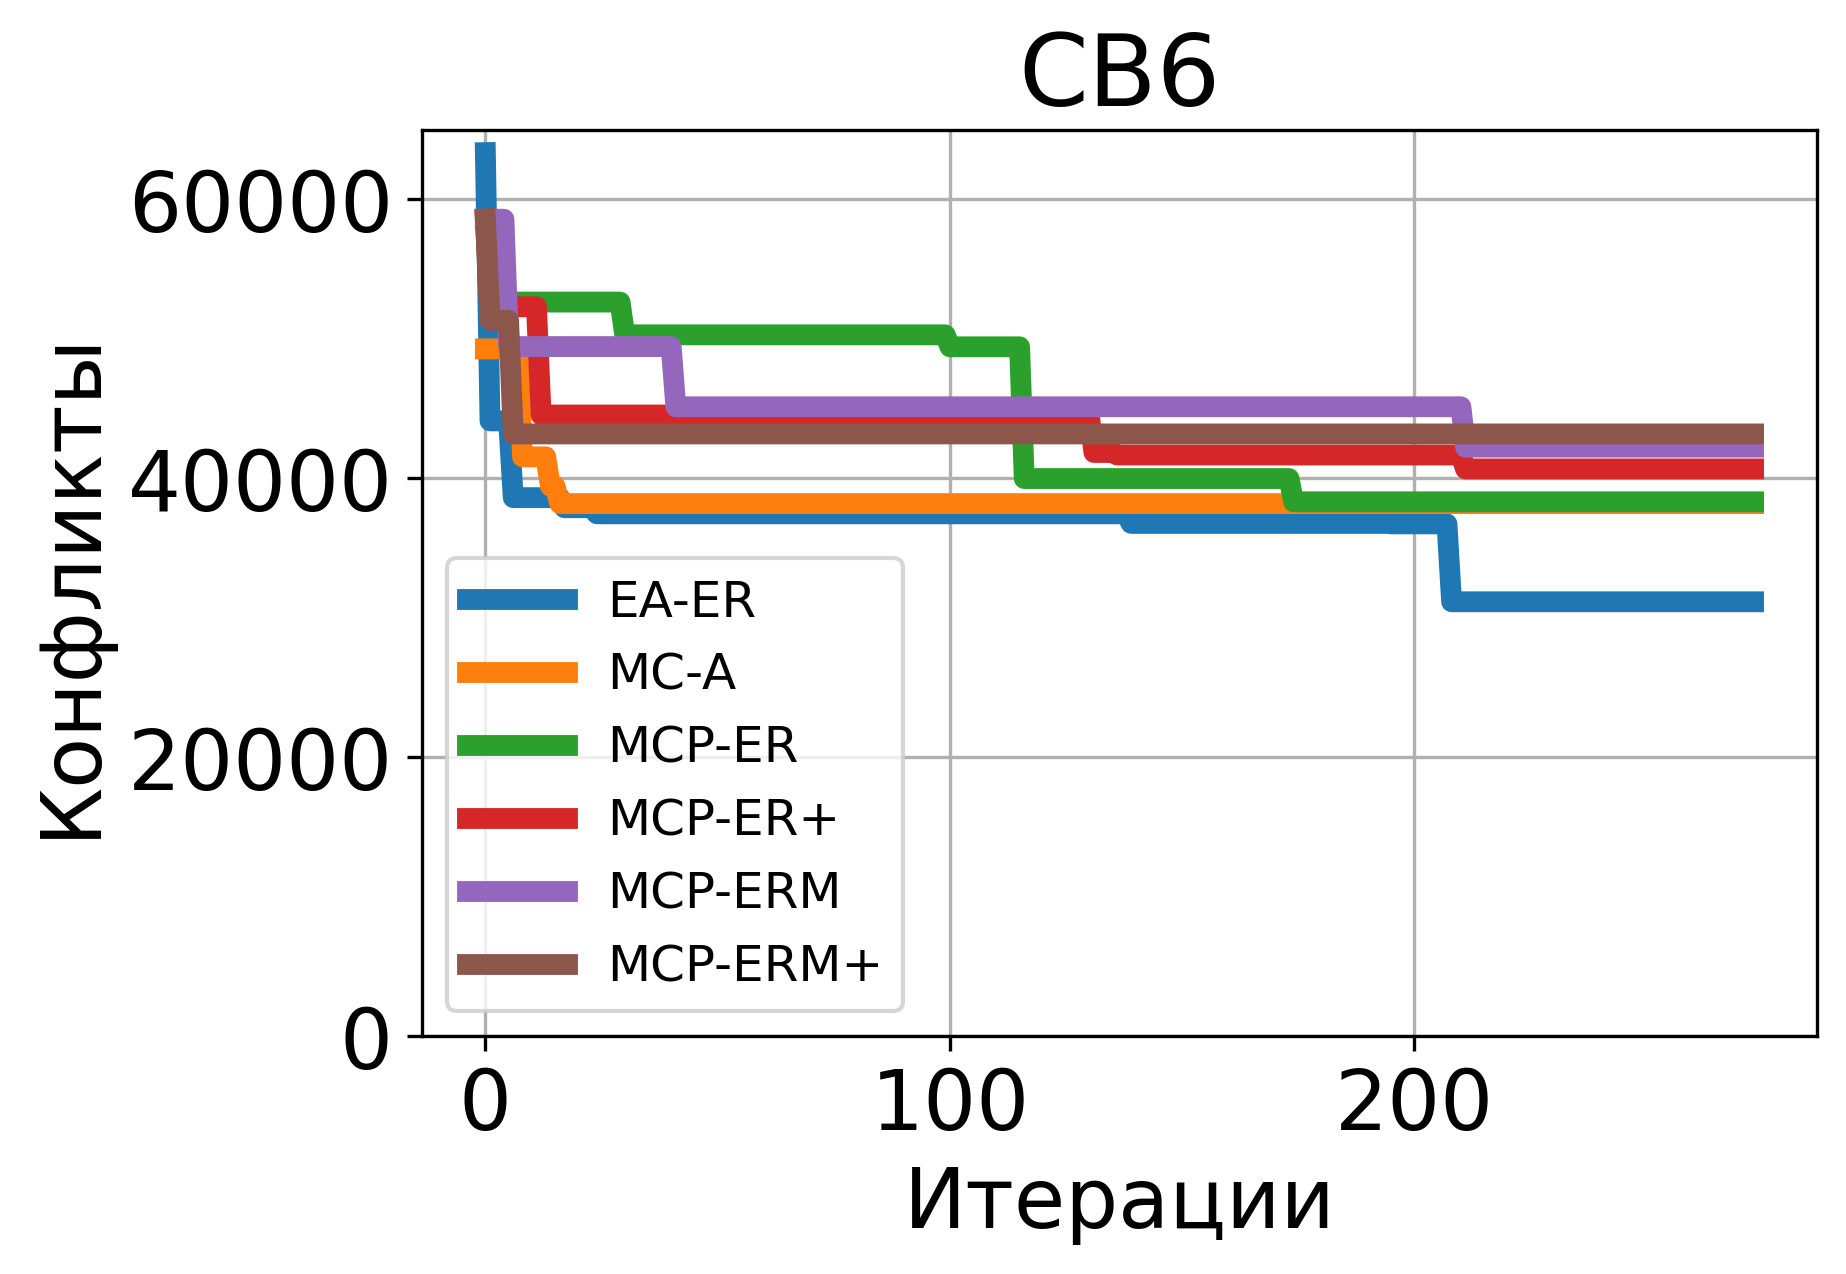

{'eaer': [170451, 144838, 144838, 144838, 144838, 144838], 'mca': [158036, 153065, 153065, 133191, 133191, 133191], 'mcper': [170750, 163026, 161379, 161379, 161379, 161379], 'mcperplus': [170750, 155071, 154183, 154183, 154183, 154183], 'mcperm': [170750, 170750, 170750, 170750, 163666, 163666], 'mcpermplus': [170750, 155071, 152191, 152191, 152191, 147438]}


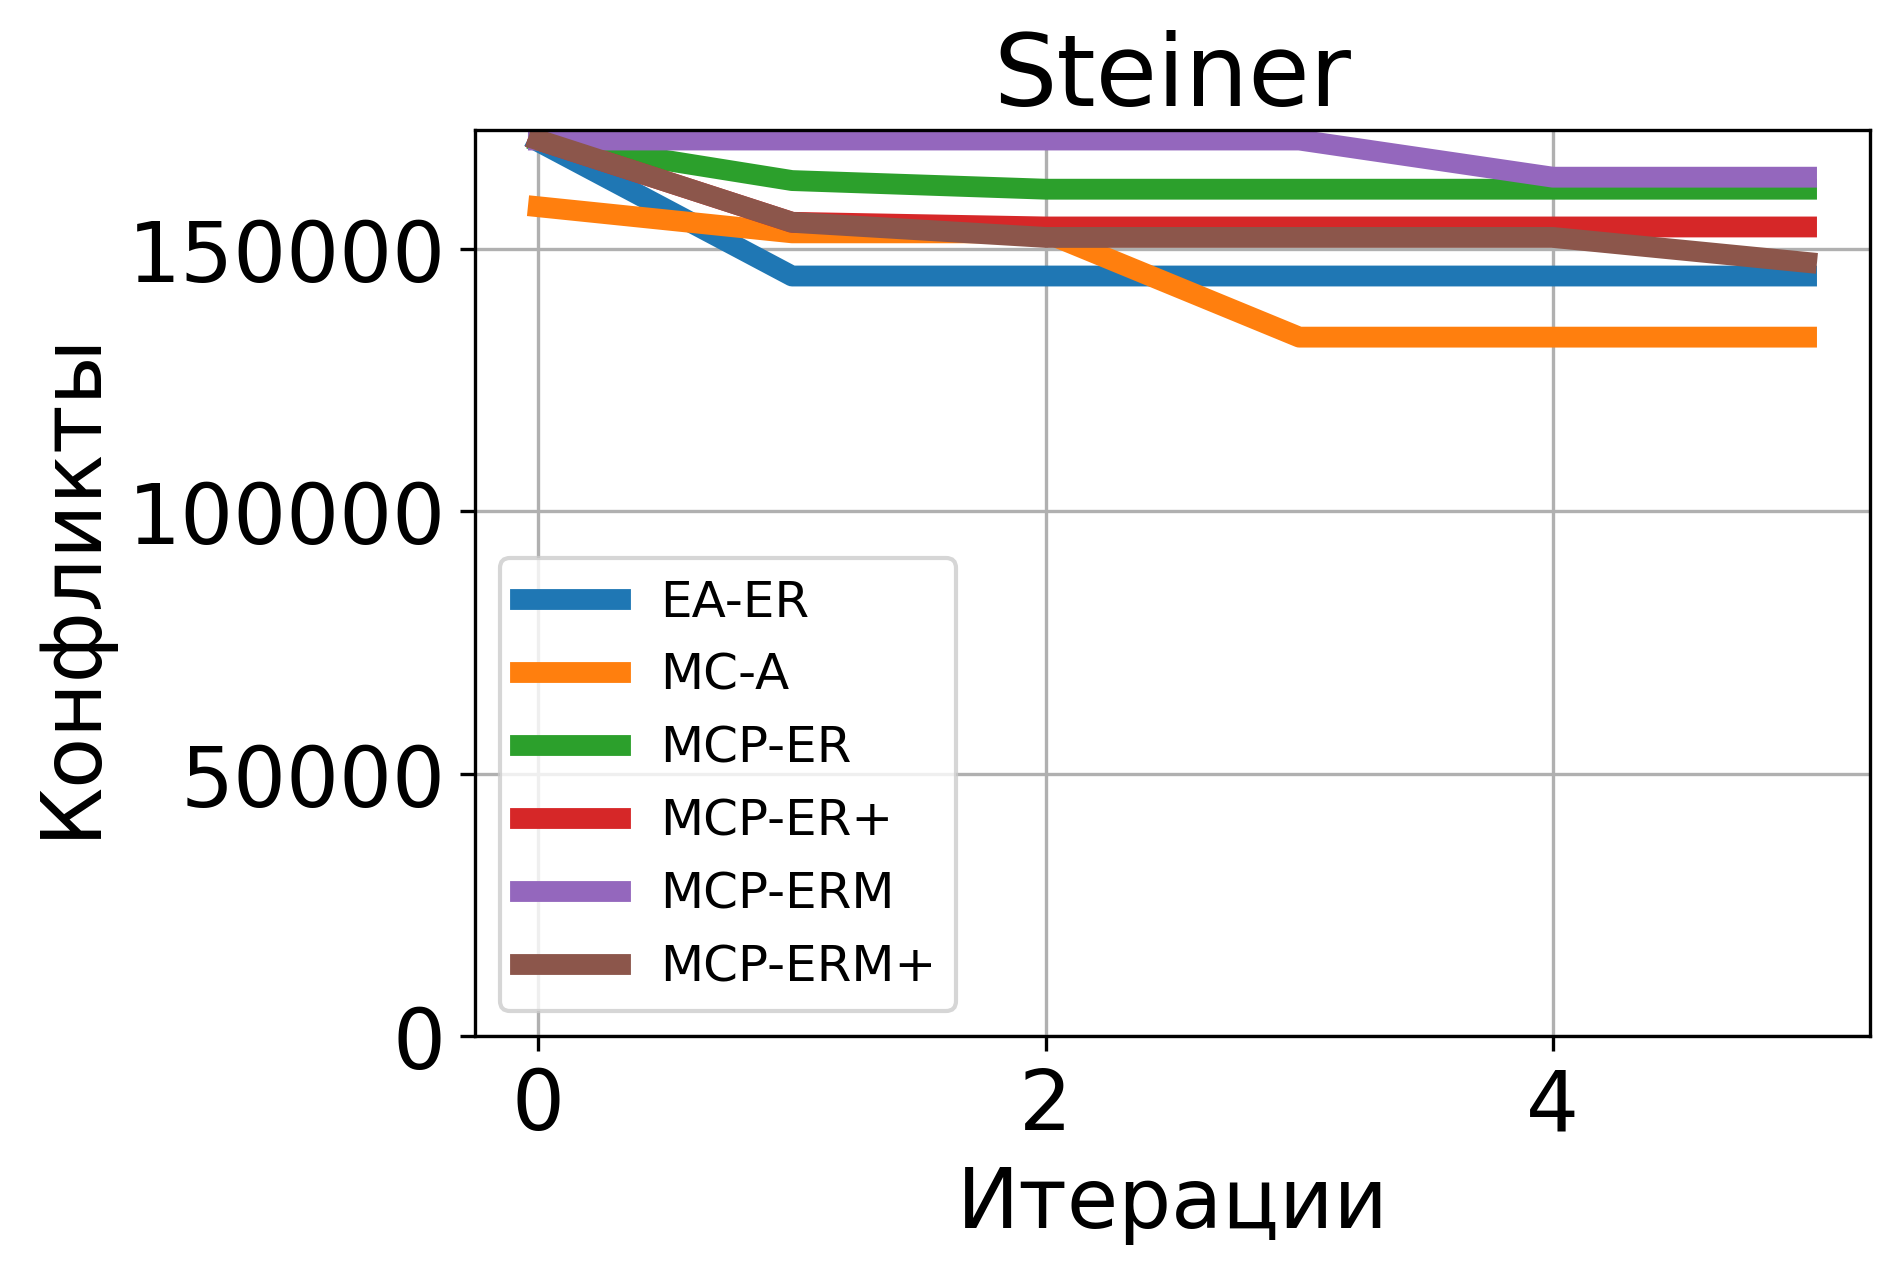

{'eaer': [670151, 548304, 454785, 454785, 454785, 454785, 454785, 454785, 454785], 'mca': [543610, 520387, 469371, 469371, 469371, 469371, 469371, 469371, 469371], 'mcper': [753354, 736543, 636981, 636981, 537087, 537087, 537087, 537087, 537087], 'mcperplus': [753354, 732832, 732832, 700771, 700771, 700771, 700771, 700771, 700771], 'mcperm': [753354, 662937, 662937, 662937, 659445, 659445, 659445, 659445, 659445], 'mcpermplus': [753354, 694832, 694832, 694832, 694832, 694832, 694832, 694832, 694832]}


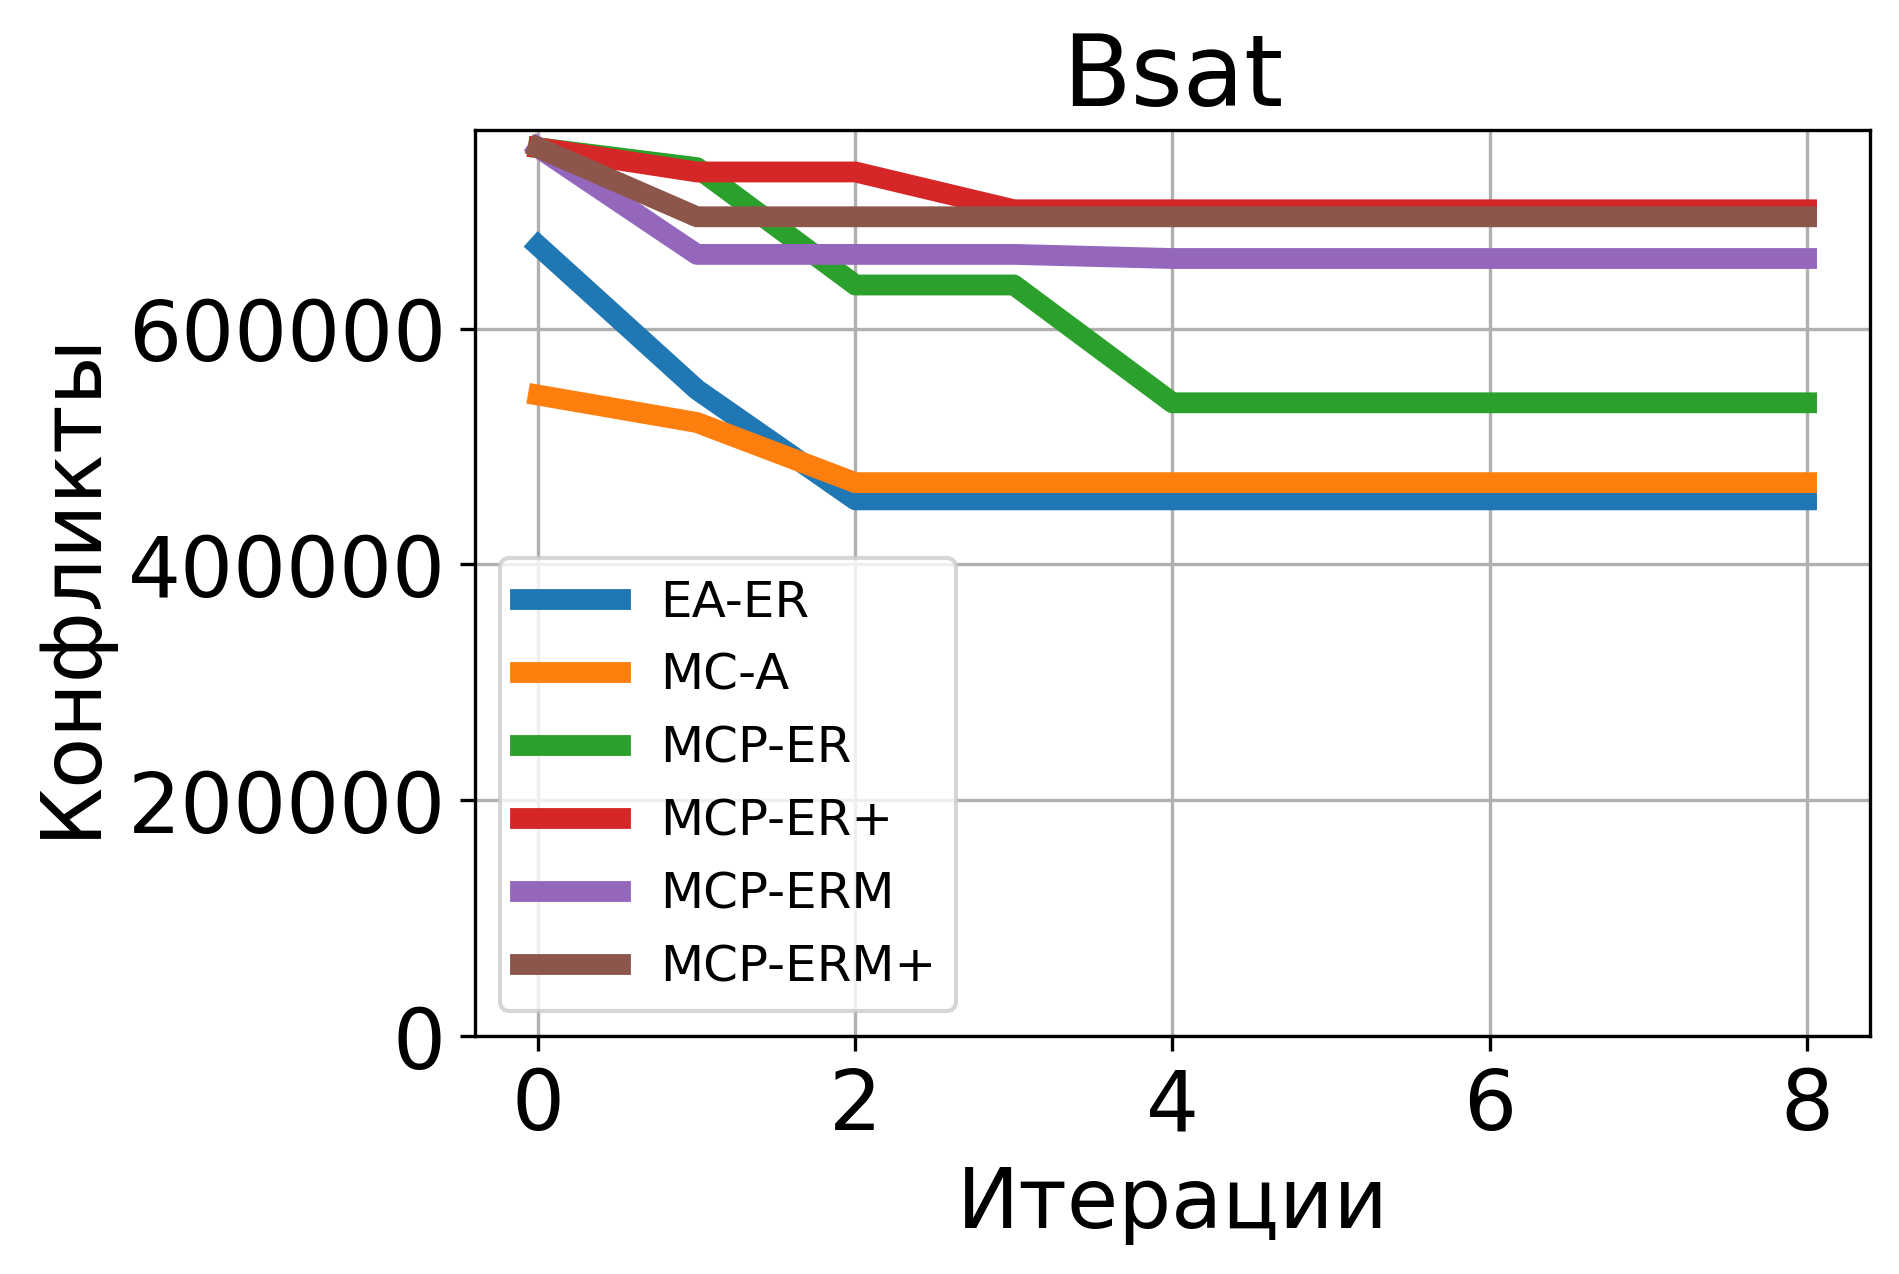

{'eaer': [912545, 551151, 551151, 497833, 497833, 497833, 497833, 492045, 492045, 492045, 467695, 467695, 467695, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 467310, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957, 404957], 'mca': [430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537, 430537], 'mcper': [712708, 697716, 697716, 697716, 554162, 554162, 554162, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 541381, 54

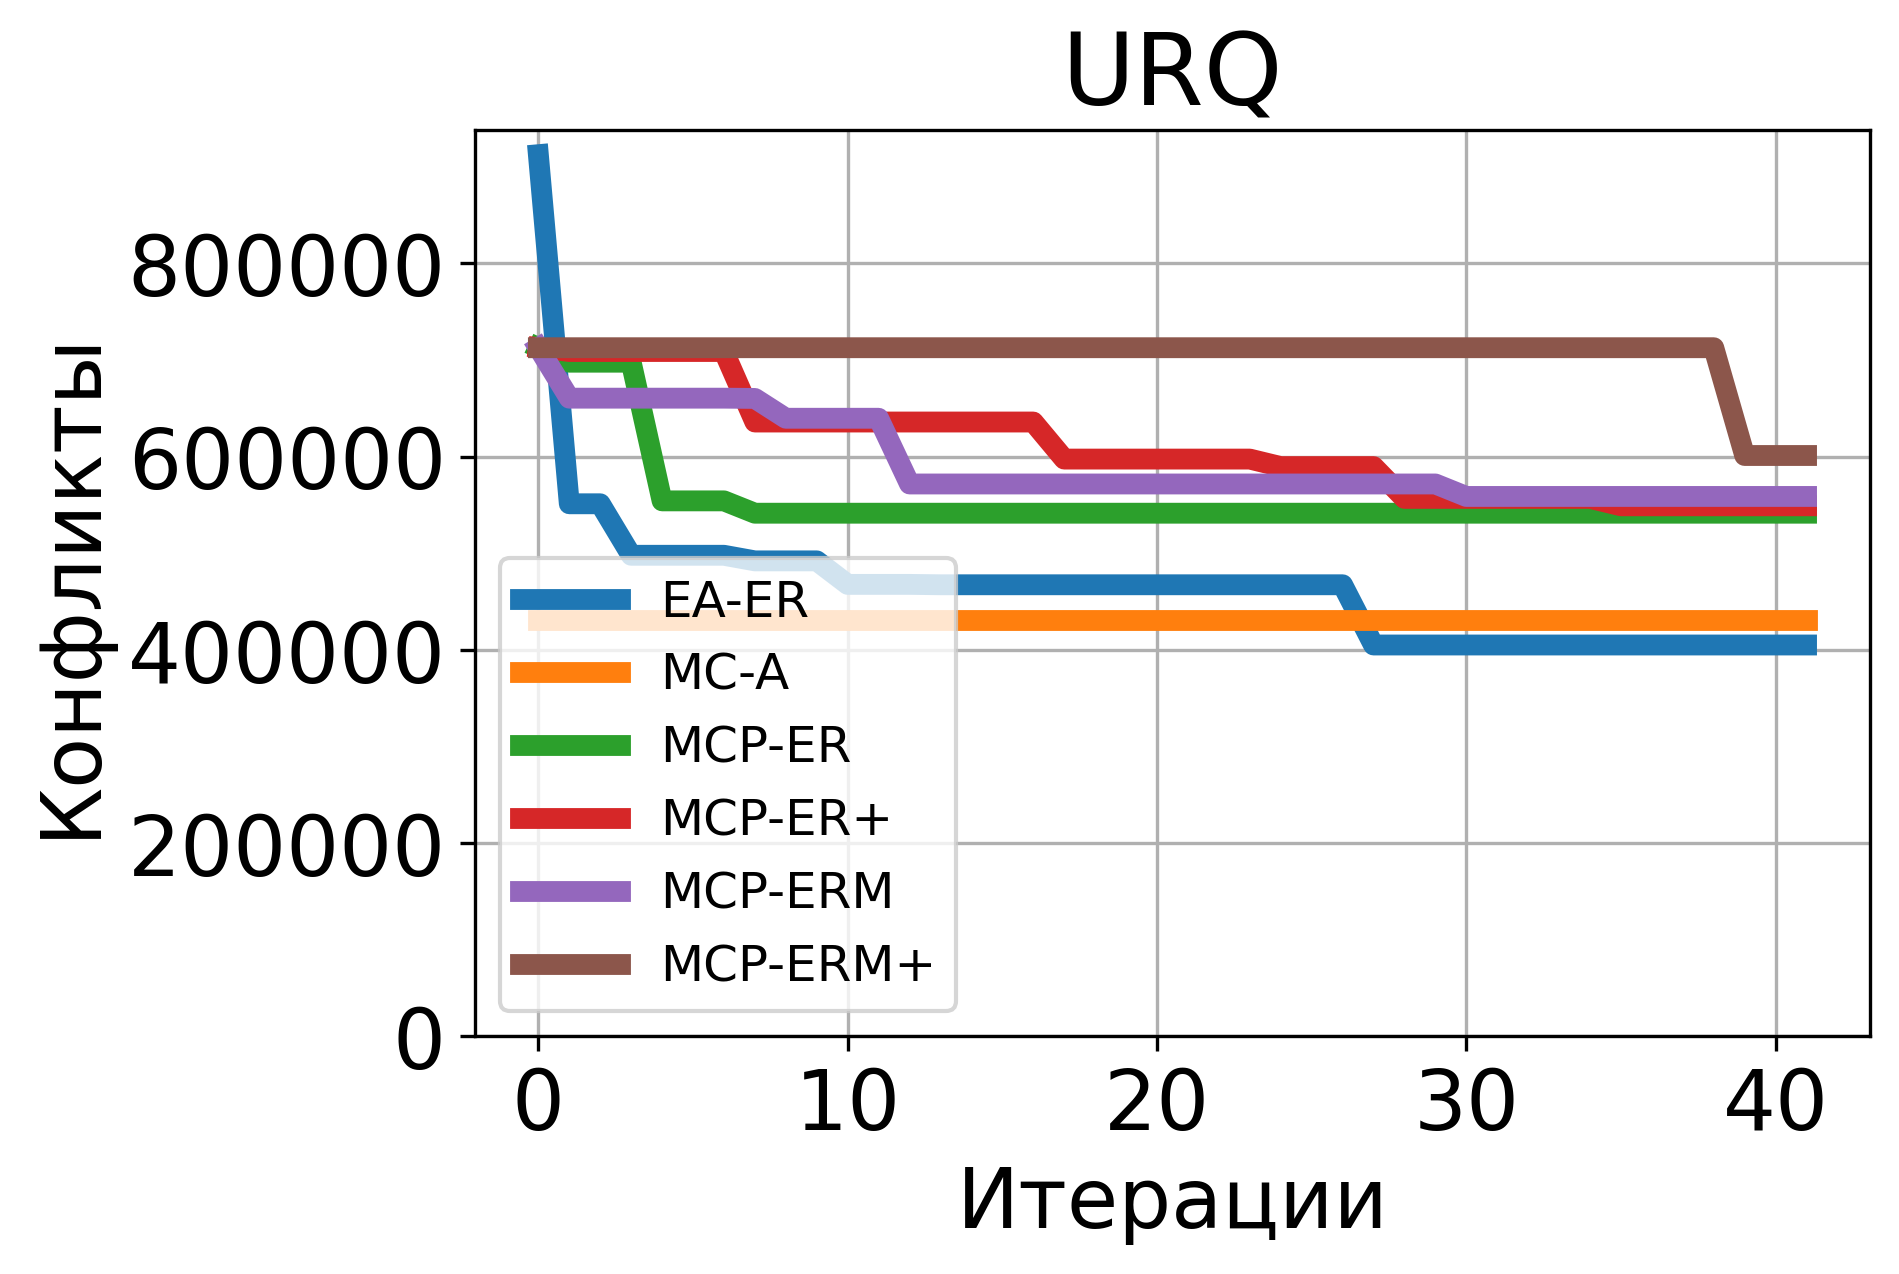

In [30]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "Times New Roman"

for benchmark in ['Dubois100', 'PHP8', 'CB6', 'Steiner', 'Bsat', 'URQ']:
  with open(benchmark.lower() + '.json') as file:
    data = json.load(file)[0]

  print(data)
  eaer = data['eaer']
  mca = data['mca']
  mcper = data['mcper']
  mcperplus = data['mcperplus']
  mcperm = data['mcperm']
  mcpermplus = data['mcpermplus']
  x = [i for i in range(len(eaer))]

  # plt.boxplot(data, medianprops=dict(linewidth=5, color='red'))
  plt.plot(x, eaer, label='EA-ER', linewidth=5)
  plt.plot(x, mca, label='MC-A', linewidth=5)
  plt.plot(x, mcper, label='MCP-ER', linewidth=5)
  plt.plot(x, mcperplus, label='MCP-ER+', linewidth=5)
  plt.plot(x, mcperm, label='MCP-ERM', linewidth=5)
  plt.plot(x, mcpermplus, label='MCP-ERM+', linewidth=5)
  plt.ylabel('Конфликты')
  plt.xlabel('Итерации')
  plt.grid()
  plt.title(benchmark)
  plt.legend(prop={'size': 12})
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  plt.show()